# **Equipo 1**

Yocelin Juárez Arroyo - A00819828

Luis Arturo Dan Fong - A01650672

Octavio Edelberto Reyes Torres - A00269987


# **Montar bases de datos y lectura de ellas**

####**Versionamiento**
**Última actualización**

Fecha: 12 octubre - 11:28pm

Por: Octavio

**Estatus:**
Disponible

In [1048]:
from google.colab import drive
drive.mount('/content/drive')
#folder_path = '/content/drive/My Drive/Proyecto Integrador/'
#folder_path = '/content/drive/My Drive/Proyecto Integrador/colab/'

#Octavio - Luis
#folder_path = '/content/drive/My Drive/Proyecto Integrador/'

#Yocelin (owner)
folder_path = '/content/drive/My Drive/Proyecto Integrador/Proyecto Integrador/'

Mounted at /content/drive


In [1049]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import gc

# Ruta del archivo de contactables de Egresados
ruta_archivo = folder_path + 'bases/contactables_EXATEC.csv'

# Leer el archivo Excel
df_contactables = pd.read_csv(ruta_archivo)


display(df_contactables.head())

IA_ID contactable_dominio_correo contactable_estatus  Unnamed: 3     rol
0      6                   itesm.mx      Ciclo Anterior         NaN     NaN
1     21                  gmail.com      Ciclo Anterior         NaN     NaN
2     48          grupoceres.com.mx      Ciclo Anterior         NaN  Exatec
3     63               yahoo.com.mx      Ciclo Anterior         NaN     NaN
4    106                hotmail.com      Ciclo Anterior         NaN     NaN

In [1050]:
import warnings
warnings.filterwarnings("ignore")

**Categoría de dominio** (categoria_dominio_correo)

**Descripción**: Variable categórica que clasifica los dominios de correo en: "Genérico", "Corporativo", "Educativo", "Gobierno". Los dominios del Tec (e.g., "tec.mx", "exatec.tec.mx") se clasificarán como "Educativo"

**Justificación**: Categorizar los correos electrónicos en función de si son corporativos, educativos, gubernamentales, o genéricos puede ayudar a establecer un perfil más claro del contacto. Identificar si un egresado usa un correo corporativo, del sector público o un correo del Tec podría ser útil para adaptar la estrategia de comunicación

In [1051]:
# Definir las categorías de dominios
educativos = ['tec.mx', 'exatec.tec.mx', 'itesm.mx']
gobierno = ['gob.mx', 'senado.gob.mx']
genéricos = ['gmail.com', 'hotmail.com', 'yahoo.com']

# Crear la función de categorización
def categorizar_dominio(dominio):
    if dominio in educativos:
        return 'Educativo'
    elif dominio in gobierno:
        return 'Gobierno'
    elif dominio in genéricos:
        return 'Genérico'
    else:
        return 'Otros'

# Aplicar la función a la columna 'contactable_dominio_correo'
df_contactables['categoria_dominio_correo'] = df_contactables['contactable_dominio_correo'].apply(categorizar_dominio)


#Eliminación de variables
columnas_a_eliminar = ['contactable_dominio_correo']
df_contactables = df_contactables.drop(columns=columnas_a_eliminar)
display(df_contactables.columns)
#display(df_marketing.head())

Index(['IA_ID', 'contactable_estatus', 'Unnamed: 3', 'rol',
       'categoria_dominio_correo'],
      dtype='object')

In [1052]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_contactables.isnull().mean() * 100

# Filtrar solo las columnas que tienen valores vacíos
porcentaje_vacios = porcentaje_vacios[porcentaje_vacios > 0]

# Mostrar el porcentaje de vacíos
display(porcentaje_vacios)

Unnamed: 3    100.000000
rol             7.174746
dtype: float64

**Preprocesamiento**:
La variable **contactable_estatus** solo tiene 2 valores: Ciclo anterior y ciclo actual, por ello se hará numérica


In [1053]:
#ciclo anterior = 1
#ciclo actual = 2

# Convertir "ciclo anterior" a 1 y "ciclo actual" a 0
#df_contactables['ciclo_numerico'] = df_contactables['contactable_estatus'].map({'Ciclo Anterior': 1, 'Ciclo Actual': 2})

#Eliminar la variable contactable_estatus
columnas_a_eliminar = ['contactable_estatus', 'Unnamed: 3']
df_contactables = df_contactables.drop(columns=columnas_a_eliminar)


display(df_contactables.head())


IA_ID     rol categoria_dominio_correo
0      6     NaN                Educativo
1     21     NaN                 Genérico
2     48  Exatec                    Otros
3     63     NaN                    Otros
4    106     NaN                 Genérico

In [1054]:
# Ruta del archivo con información del comportamiento de marketing de los egresados
ruta_archivo = folder_path + 'bases/MailCampana.csv'

# Leer el archivo Excel
df_marketing = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
display(df_marketing.head())

IA_ID  opened  clicked  replied                             object_id  \
0   21.0       2        0        0  82ede0a1-0076-4aeb-b540-ffd598a33e6b   
1   48.0       4        0        0  7508a1ed-2608-41ce-80a9-a47cddcfdd23   
2  372.0       4        0        0  16c9b8b6-2227-4c53-864f-ceb8e7e34455   
3  372.0       2        0        0  99fc9282-d373-40d3-ade0-7cb937f3408b   
4  372.0       3        0        0  c3963868-9b41-48b6-ac99-76bf916e91af   

   Contacto ID  Correo de marketing ID   Campaña ID  
0    224776056            3.622020e+11  10949903422  
1     60136712            3.633040e+11  10949903422  
2    221283951            3.645170e+11  10949903422  
3    221283951            3.603660e+11  10949903422  
4    221283951            3.622020e+11  10949903422

In [1055]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_marketing.isnull().mean() * 100

# Filtrar solo las columnas que tienen valores vacíos
porcentaje_vacios = porcentaje_vacios[porcentaje_vacios > 0]

# Mostrar el porcentaje de vacíos
display(porcentaje_vacios)

IA_ID    3.708568
dtype: float64

In [1056]:
# Mostrar un resumen de las variables categóricas y sus valores únicos
categorical_columns = df_marketing.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores únicos para cada columna categórica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_marketing[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categóricas
display(categorical_summary)


Variable  Cantidad de Valores Distintos
0   object_id                         216229
1  Campaña ID                             11

In [1057]:
# Eliminar variables que ya no se usan
del categorical_summary

# Forzar la recolección de basura
gc.collect()


3215

**Preprocesamiento**:

Las variables **object_id** y **Contacto ID** son un identificador local del egresado, tiene el mismo funcionamiento que IA_ID por ello se eliminarán.

In [1058]:
#Eliminación de variables
columnas_a_eliminar = ['object_id', 'Contacto ID']
df_marketing = df_marketing.drop(columns=columnas_a_eliminar)
display(df_marketing.columns)
#display(df_marketing.head())

Index(['IA_ID', 'opened', 'clicked', 'replied', 'Correo de marketing ID',
       'Campaña ID'],
      dtype='object')

In [1059]:
# Ruta del archivo con información intereses, residencia, laborales, premios de los egresados
ruta_archivo =  folder_path +  'bases/Infoadicional.csv'

# Leer el archivo Excel
df_intereses = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
display(df_intereses.head())

IA_ID info_ESTADO_RESIDENCIA info_PAIS_RESIDENCIA info_FECHA_MAIL_ACTIVO  \
0  145190             Nuevo León               México       01/08/2023 00:00   
1  162191                    NaN                  NaN       24/06/2024 00:00   
2  155105                    NaN                  NaN       05/05/2023 00:00   
3  176490                    NaN                  NaN       05/05/2023 00:00   
4  175820                    NaN                  NaN       05/05/2023 00:00   

  info_TIPO_DOMICILIO info_POBLACION_ACTIVO   info_MUNICIPIO_ACTIVO  \
0     Dirección Local             Monterrey               Monterrey   
1                 NaN          Villahermosa                     NaN   
2     Dirección Local                   NaN          Aguascalientes   
3     Dirección Local                   NaN  San Pedro Garza García   
4     Dirección Local                   NaN               Guadalupe   

  info_ESTADO_ACTIVO info_PAIS_ACTIVO info_FECHA_ACTIVO  ...  \
0         Nuevo León           México  15/11/2007 00:00  ...   
1                NaN              NaN  14/02/2008 00:00  ...   
2     Aguascalientes           México  09/06/2000 00:00  ...   
3         Nuevo León           México  12/07/1996 00:00  ...   
4         Nuevo León           México  17/01/1996 00:00  ...   

  info_interes_VIAJES info_interes_SALUD info_interes_ANIMALES  \
0                 NaN                NaN                   NaN   
1                 NaN                NaN                   NaN   
2                 NaN                NaN                   NaN   
3                 NaN                NaN                   NaN   
4                 NaN                NaN                   NaN   

  info_interes_NUTRICION info_interes_LIDERAZGO info_interes_BIENESTAR  \
0                    NaN                    NaN                    NaN   
1                    NaN                    NaN                    NaN   
2                    NaN                    NaN                    NaN   
3                    NaN                    NaN                    NaN   
4                    NaN                    NaN                    NaN   

  info_interes_ESCRITURA info_interes_MODA info_interes_HOGAR  \
0                    NaN               NaN                NaN   
1                    NaN               NaN                NaN   
2                    NaN               NaN                NaN   
3                    NaN               NaN                NaN   
4                    NaN               NaN                NaN   

  info_interes_MUSICA  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 76 columns]

In [1060]:
# Mostrar un resumen de las variables categóricas y sus valores únicos
categorical_columns = df_intereses.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores únicos para cada columna categórica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_intereses[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categóricas
display(categorical_summary)


Variable  Cantidad de Valores Distintos
0   info_ESTADO_RESIDENCIA                            155
1     info_PAIS_RESIDENCIA                             95
2   info_FECHA_MAIL_ACTIVO                           7102
3      info_TIPO_DOMICILIO                              1
4    info_POBLACION_ACTIVO                           1685
..                     ...                            ...
65  info_interes_BIENESTAR                              1
66  info_interes_ESCRITURA                              1
67       info_interes_MODA                              1
68      info_interes_HOGAR                              1
69     info_interes_MUSICA                              1

[70 rows x 2 columns]

In [1061]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_intereses.isnull().mean() * 100

# Filtrar solo las columnas que tienen valores vacíos
porcentaje_vacios = porcentaje_vacios[porcentaje_vacios > 0]

# Mostrar el porcentaje de vacíos
display(porcentaje_vacios)

info_ESTADO_RESIDENCIA    95.167389
info_PAIS_RESIDENCIA      94.805437
info_FECHA_MAIL_ACTIVO    10.852702
info_TIPO_DOMICILIO       66.974975
info_POBLACION_ACTIVO     80.890902
                            ...    
info_interes_BIENESTAR    99.873874
info_interes_ESCRITURA    99.976056
info_interes_MODA         99.975220
info_interes_HOGAR        99.984687
info_interes_MUSICA       99.925382
Length: 72, dtype: float64

**Preprocesamiento**:

La variable info_TIPO_DOMICILIO tiene un solo valor que es "Domicilio Local" y la tienen aquellos que poseen un domicilio, por ello se eliminará

La variable info_NUMERO_CELULAR tiene Si o No refiriéndose a si tiene celular o no, por ello se hará binario

La variable info_SOCIAL_LINKEDIN tiene Si o No refiriéndose a si tiene linkedin o no, por ello se hará binario

La variable info_EMPLEO_ACTUAL1[1-5] tiene Y o N refiriéndose a es empleo actual o no, por ello se hará binario

Los premios que comparten son tecleados por el egresado, lo que significa que no está validado por ello se eliminará la columna pues no genera un valor

Las variables:
info_FECHA_PREMIO5	info_interes_EDUCACION	info_interes_TECNOLOGIA	info_interes_CIENCIA	info_interes_POLITICA	info_interes_SUSTENTABILIDAD	info_interes_HISTORIA	info_interes_ARTE	info_interes_ECONOMIA	info_interes_NEGOCIOS	info_interes_ORGANIZACIONES_SIN_FINES_LUCRO	info_interes_DEPORTES	info_interes_CULTURA	info_interes_VIAJES	info_interes_SALUD	info_interes_ANIMALES	info_interes_NUTRICION	info_interes_LIDERAZGO	info_interes_BIENESTAR	info_interes_ESCRITURA	info_interes_MODA	info_interes_HOGAR	info_interes_MUSICA

Tienen "Si" o son nullas, por ello se hará binaria 1:0


Aunque las columnas de intereses tienne más del 99% vacío, se eliminan

In [1062]:
# Convertir "Sí" a 1 y "No" a 0
df_intereses['tiene_numero_celular'] = df_intereses['info_NUMERO_CELULAR'].map({'Sí': 1, 'No': 0})
df_intereses['tiene_linkedin'] = df_intereses['info_SOCIAL_LINKEDIN'].map({'Sí': 1, 'No': 0})
df_intereses['es_empleo_actual'] = df_intereses['info_EMPLEO_ACTUAL1'].map({'Y': 1, 'N': 0})
df_intereses['es_empleo_actua2'] = df_intereses['info_EMPLEO_ACTUAL2'].map({'Y': 1, 'N': 0})
df_intereses['es_empleo_actua3'] = df_intereses['info_EMPLEO_ACTUAL3'].map({'Y': 1, 'N': 0})
df_intereses['es_empleo_actua4'] = df_intereses['info_EMPLEO_ACTUAL4'].map({'Y': 1, 'N': 0})
df_intereses['es_empleo_actua5'] = df_intereses['info_EMPLEO_ACTUAL5'].map({'Y': 1, 'N': 0})

#df_intereses['interes_EDUCACION'] = np.where(df_intereses['info_interes_EDUCACION'] == 'Sí', 1, 0)
#df_intereses['interes_TECNOLOGIA'] = np.where(df_intereses['info_interes_TECNOLOGIA'] == 'Sí', 1, 0)
#df_intereses['interes_CIENCIA'] = np.where(df_intereses['info_interes_CIENCIA'] == 'Sí', 1, 0)
#df_intereses['interes_POLITICA'] = np.where(df_intereses['info_interes_POLITICA'] == 'Sí', 1, 0)
#df_intereses['interes_SUSTENTABILIDAD'] = np.where(df_intereses['info_interes_SUSTENTABILIDAD'] == 'Sí', 1, 0)
#df_intereses['interes_HISTORIA'] = np.where(df_intereses['info_interes_HISTORIA'] == 'Sí', 1, 0)
#df_intereses['interes_ARTE'] = np.where(df_intereses['info_interes_ARTE'] == 'Sí', 1, 0)
#df_intereses['interes_ECONOMIA'] = np.where(df_intereses['info_interes_ECONOMIA'] == 'Sí', 1, 0)
#df_intereses['interes_NEGOCIOS'] = np.where(df_intereses['info_interes_NEGOCIOS'] == 'Sí', 1, 0)
#df_intereses['interes_ORGANIZACIONES_SIN_FINES_LUCRO'] = np.where(df_intereses['info_interes_ORGANIZACIONES_SIN_FINES_LUCRO'] == 'Sí', 1, 0)
#df_intereses['interes_DEPORTES'] = np.where(df_intereses['info_interes_DEPORTES'] == 'Sí', 1, 0)
#df_intereses['interes_CULTURA'] = np.where(df_intereses['info_interes_CULTURA'] == 'Sí', 1, 0)
#df_intereses['interes_VIAJES'] = np.where(df_intereses['info_interes_EDUCACION'] == 'Sí', 1, 0)
#df_intereses['interes_SALUD'] = np.where(df_intereses['info_interes_SALUD'] == 'Sí', 1, 0)
#df_intereses['interes_ANIMALES'] = np.where(df_intereses['info_interes_ANIMALES'] == 'Sí', 1, 0)
#df_intereses['interes_NUTRICION'] = np.where(df_intereses['info_interes_NUTRICION'] == 'Sí', 1, 0)
#df_intereses['interes_LIDERAZGO'] = np.where(df_intereses['info_interes_LIDERAZGO'] == 'Sí', 1, 0)
#df_intereses['interes_BIENESTAR'] = np.where(df_intereses['info_interes_BIENESTAR'] == 'Sí', 1, 0)
#df_intereses['interes_ESCRITURA'] = np.where(df_intereses['info_interes_ESCRITURA'] == 'Sí', 1, 0)
#df_intereses['interes_MODA'] = np.where(df_intereses['info_interes_MODA'] == 'Sí', 1, 0)
#df_intereses['interes_HOGAR'] = np.where(df_intereses['info_interes_HOGAR'] == 'Sí', 1, 0)
#df_intereses['interes_MUSICA'] = np.where(df_intereses['info_interes_MUSICA'] == 'Sí', 1, 0)


#Eliminación de variables
columnas_a_eliminar = ['info_TIPO_DOMICILIO', 'info_NUMERO_CELULAR', 'info_SOCIAL_LINKEDIN', 'info_EMPLEO_ACTUAL1', 'info_EMPLEO_ACTUAL2', 'info_EMPLEO_ACTUAL3', 'info_EMPLEO_ACTUAL4', 'info_EMPLEO_ACTUAL5', 'info_TIPO_PREMIO1', 'info_TIPO_PREMIO2', 'info_TIPO_PREMIO3', 'info_TIPO_PREMIO4', 'info_TIPO_PREMIO5', 'info_interes_EDUCACION',
                      'info_interes_TECNOLOGIA', 'info_interes_CIENCIA', 'info_interes_POLITICA', 'info_interes_SUSTENTABILIDAD', 'info_interes_HISTORIA', 'info_interes_ARTE', 'info_interes_ECONOMIA', 'info_interes_NEGOCIOS',
                       'info_interes_ORGANIZACIONES_SIN_FINES_LUCRO', 'info_interes_DEPORTES', 'info_interes_CULTURA', 'info_interes_VIAJES', 'info_interes_SALUD', 'info_interes_ANIMALES', 'info_interes_NUTRICION',
                       'info_interes_LIDERAZGO', 'info_interes_BIENESTAR', 'info_interes_ESCRITURA', 'info_interes_MODA', 'info_interes_HOGAR', 'info_interes_MUSICA']

df_intereses = df_intereses.drop(columns=columnas_a_eliminar)
display(df_intereses.columns)
#display(df_marketing.head())

Index(['IA_ID', 'info_ESTADO_RESIDENCIA', 'info_PAIS_RESIDENCIA',
       'info_FECHA_MAIL_ACTIVO', 'info_POBLACION_ACTIVO',
       'info_MUNICIPIO_ACTIVO', 'info_ESTADO_ACTIVO', 'info_PAIS_ACTIVO',
       'info_FECHA_ACTIVO', 'info_FECHA_ACTIVO_NUM_CELULAR',
       'info_ESTADOCIVIL', 'info_NOMBRE_EMPRESA1', 'info_PUESTO1',
       'info_PAIS_EMPRESA1', 'info_FECHA_INGRESO_EMPRESA1',
       'info_NOMBRE_EMPRESA2', 'info_PUESTO2', 'info_PAIS_EMPRESA2',
       'info_FECHA_INGRESO_EMPRESA2', 'info_NOMBRE_EMPRESA3', 'info_PUESTO3',
       'info_PAIS_EMPRESA3', 'info_FECHA_INGRESO_EMPRESA3',
       'info_NOMBRE_EMPRESA4', 'info_PUESTO4', 'info_PAIS_EMPRESA4',
       'info_FECHA_INGRESO_EMPRESA4', 'info_NOMBRE_EMPRESA5', 'info_PUESTO5',
       'info_PAIS_EMPRESA5', 'info_FECHA_INGRESO_EMPRESA5',
       'info_NOMBRE_PREMIO1', 'info_FECHA_PREMIO1', 'info_NOMBRE_PREMIO2',
       'info_FECHA_PREMIO2', 'info_NOMBRE_PREMIO3', 'info_FECHA_PREMIO3',
       'info_NOMBRE_PREMIO4', 'info_FECHA_PREMIO4',

In [1063]:
# Eliminar variables que ya no se usan
del categorical_summary

# Forzar la recolección de basura
gc.collect()


0

In [1064]:
# Ruta del archivo con información escolar de los egresados
ruta_archivo = folder_path +  'bases/IA_BaseEXATEC_entregada.csv'

# Leer el archivo Excel
df_escolar = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
display(df_escolar.head())

IA_ID  base_SEXO base_año nac base_NACIONALIDAD base_CIUDADNACIMIENTO  \
0      6  Masculino         1928          Mexicana                México   
1     21  Masculino         1928          Mexicana            Indefinido   
2     48  Masculino         1931          Mexicana            Indefinido   
3     63  Masculino         1930          Mexicana             Monterrey   
4    106  Masculino         1929          Mexicana             Monterrey   

  base_ESTADONACIMIENTO base_PAISNACIMIENTO base_NOCONTACTAR  \
0      Ciudad de México          Indefinido                    
1                                                              
2               Sinaloa              México                    
3            Nuevo León              México                    
4            Nuevo León              México                    

  base_exatec personalizado base_CIUDAD_RESIDENCIA  ... base_CDEMPRESA  \
0                        No                    NaN  ...            NaN   
1                Sin correo               Santiago  ...            NaN   
2                        Sí             Los Mochis  ...            NaN   
3                        No              Monterrey  ...            NaN   
4                        No   San Pedro Garza Garc  ...            NaN   

  base_EDOEMPRESA base_PAISEMPRESA base_ASOCIACIONES base_PUESTOASOCIACIONES  \
0             NaN              NaN               NaN                     NaN   
1             NaN              NaN               NaN                     NaN   
2             NaN              NaN               NaN                     NaN   
3             NaN              NaN               NaN                     NaN   
4             NaN              NaN               NaN                     NaN   

  base_PREMIOSRECONOCIMIENTOS base_Interesadocompartirtemas base_INTERESES  \
0                         NaN                                          NaN   
1                         NaN                                          NaN   
2                         NaN                                          NaN   
3                         NaN                                          NaN   
4                         NaN                                          NaN   

   base_updatedata base_HizoPrepaTec  
0              NaN                No  
1              NaN                No  
2              NaN                No  
3              NaN                No  
4              NaN                No  

[5 rows x 41 columns]

##Revisemos los valores únicos de cada atributo

In [1065]:
# Mostrar un resumen de las variables categóricas y sus valores únicos
categorical_columns = df_escolar.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores únicos para cada columna categórica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_escolar[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categóricas
display(categorical_summary)

Variable  Cantidad de Valores Distintos
0                       base_SEXO                              2
1                    base_año nac                            156
2               base_NACIONALIDAD                            101
3           base_CIUDADNACIMIENTO                           3056
4           base_ESTADONACIMIENTO                            420
5             base_PAISNACIMIENTO                             83
6                base_NOCONTACTAR                              2
7       base_exatec personalizado                              3
8          base_CIUDAD_RESIDENCIA                           3627
9          base_ESTADO_RESIDENCIA                            357
10           base_PAIS_RESIDENCIA                             95
11   base_ha_actualizado_teléfono                              2
12           base_FECHAGRADUACION                           2341
13                   base_AñoGrad                             92
14         base_PROGRAMAACADEMICO                            475
15              base_Tipo Escuela                             10
16         base_SIGLASDELPROGRAMA                            655
17                  base_IDCAMPUS                             40
18              base_NOMBRECAMPUS                             40
19           base_campusoperación                             37
20                     base_NIVEL                              5
21                  Nivel_general                              2
22             base_NOMBREEMPRESA                          47802
23               base_GIROEMPRESA                             71
24               base_TIPOEMPRESA                              5
25        base_AREAORGANIZACIONAL                             33
26                    base_PUESTO                          38065
27         base_RESPONSABILIDADES                          48688
28             base_ESTATUSEMPLEO                              3
29                 base_CDEMPRESA                           4065
30                base_EDOEMPRESA                             34
31               base_PAISEMPRESA                            107
32              base_ASOCIACIONES                              1
33        base_PUESTOASOCIACIONES                              1
34    base_PREMIOSRECONOCIMIENTOS                              1
35  base_Interesadocompartirtemas                              3
36                 base_INTERESES                            942
37                base_updatedata                              2
38              base_HizoPrepaTec                              2

Como el Estado ofrece mayor valor para el modelo, las ciudades se eliminarán, además que es un campo abierto.

In [1066]:
#Eliminar ciudades
#Eliminación de variables
columnas_a_eliminar = ['base_CIUDAD_RESIDENCIA', 'base_CIUDADNACIMIENTO']
df_escolar = df_escolar.drop(columns=columnas_a_eliminar)
display(df_escolar.columns)

Index(['IA_ID', 'base_SEXO', 'base_año nac', 'base_NACIONALIDAD',
       'base_ESTADONACIMIENTO', 'base_PAISNACIMIENTO', 'base_NOCONTACTAR',
       'base_exatec personalizado', 'base_ESTADO_RESIDENCIA',
       'base_PAIS_RESIDENCIA', 'base_ha_actualizado_teléfono',
       'base_FECHAGRADUACION', 'base_AñoGrad', 'base_PROGRAMAACADEMICO',
       'base_Tipo Escuela', 'base_SIGLASDELPROGRAMA', 'base_NIVELACADEMICO',
       'base_IDCAMPUS', 'base_NOMBRECAMPUS', 'base_campusoperación',
       'base_NIVEL', 'Nivel_general', 'base_NOMBREEMPRESA', 'base_GIROEMPRESA',
       'base_TIPOEMPRESA', 'base_AREAORGANIZACIONAL', 'base_PUESTO',
       'base_RESPONSABILIDADES', 'base_ESTATUSEMPLEO', 'base_CDEMPRESA',
       'base_EDOEMPRESA', 'base_PAISEMPRESA', 'base_ASOCIACIONES',
       'base_PUESTOASOCIACIONES', 'base_PREMIOSRECONOCIMIENTOS',
       'base_Interesadocompartirtemas', 'base_INTERESES', 'base_updatedata',
       'base_HizoPrepaTec'],
      dtype='object')

##Estandarizamos la columna 'base_año nac' al formato numérico.

Mostramos el total de valores diferentes encontrando que tenemos valores en formato numerico y en formato texto.

In [1067]:
display(df_escolar['base_año nac'].unique())

array(['1928', '1931', '1930', '1929', '1932', '1938', '1937', '1934',
       '1935', '1936', 'x', '1939', '1923', '1927', '1933', '1958',
       '1952', '1940', '1961', '1962', '1941', '1994', '1942', '1969',
       '1943', '1944', '1963', '1945', '1947', '1951', '1946', '1990',
       '1977', '1948', '1949', '1967', '1950', '1960', '1953', '1974',
       '1955', '1956', '1986', '1911', '1975', '1954', '1973', '1957',
       '1966', '1993', '1959', '1968', '1982', '1987', '1972', '1983',
       '1988', '1979', '1995', '1964', '1991', '1970', '1978', '1992',
       '1989', '1965', '1971', '1976', '1985', '2002', '2006', '1981',
       '1980', '1984', '1996', '1997', '1998', '1999', '2000', '2001',
       '2014', '1912', '2012', '1910', '2007', '1902', '2017', '1901',
       '1920', '2063', '2010', '2069', '2003', 1985, 1986, 1984, 1987,
       1988, 1989, 1990, 1991, 1992, 1982, 1979, 1978, 1980, 1981, 1977,
       1976, 1970, 1967, 1971, 1973, 1964, 1965, 1968, 1972, 1969, 1974,
     

In [1068]:
# Intentamos convertir todos los valores de la columna "base_año nac" a números, errores se reemplazan por NaN
df_escolar["base_año nac"] = pd.to_numeric(df_escolar["base_año nac"], errors='coerce')

# Calculamos la media aritmética de la columna "base_año nac", ignorando los NaN
media_anio = df_escolar["base_año nac"].mean()

# Reemplazamos los valores NaN con la media aritmética
df_escolar["base_año nac"].fillna(media_anio, inplace=True)

# Reemplazamos los valores mayores a 2008 por la media aritmética
df_escolar.loc[df_escolar["base_año nac"] > 2008, "base_año nac"] = media_anio

# Convertimos los valores restantes a enteros
df_escolar["base_año nac"] = df_escolar["base_año nac"].astype(int)

# Mostramos el resultado
display(df_escolar['base_año nac'].unique())

array([1928, 1931, 1930, 1929, 1932, 1938, 1937, 1934, 1935, 1936, 1984,
       1939, 1923, 1927, 1933, 1958, 1952, 1940, 1961, 1962, 1941, 1994,
       1942, 1969, 1943, 1944, 1963, 1945, 1947, 1951, 1946, 1990, 1977,
       1948, 1949, 1967, 1950, 1960, 1953, 1974, 1955, 1956, 1986, 1911,
       1975, 1954, 1973, 1957, 1966, 1993, 1959, 1968, 1982, 1987, 1972,
       1983, 1988, 1979, 1995, 1964, 1991, 1970, 1978, 1992, 1989, 1965,
       1971, 1976, 1985, 2002, 2006, 1981, 1980, 1996, 1997, 1998, 1999,
       2000, 2001, 1912, 1910, 2007, 1902, 1901, 1920, 2003, 2008, 2004])

##Revisar si existen países escritos de distintas formas

In [1069]:
display(df_escolar['base_PAIS_RESIDENCIA'].unique())

array([nan, 'República Dominicana', 'México', 'Estados Unidos de América',
       'Mexico', 'Venezuela', 'Costa Rica', 'Honduras', 'Panamá',
       'Nicaragua', 'Canadá', 'Colombia', 'Guatemala', 'El Salvador',
       'Francia', 'United States', 'España', 'Ecuador', 'Bolivia',
       'Bélgica', 'Taiwán', 'Suiza', 'Brasil', 'Puerto Rico', 'Australia',
       'Italia', 'Japón', 'Perú', 'Suecia', 'Spain', 'Canada', 'Chile',
       'xxx', 'Líbano', 'Países Bajos', 'Israel', 'Alemania',
       'Reino Unido', 'Uruguay', 'Corea del Sur', 'Panama', ' ', 'Japan',
       'Austria', 'Singapur', 'Ireland', 'Qatar', 'United Kingdom',
       'Filipinas', 'Finlandia', 'Dinamarca', 'Emiratos Arabes Unidos',
       'Argentina', 'República Popular\xa0China\xa0', 'China', 'Germany',
       'Hong Kong', 'Cyprus', 'Netherlands', 'Noruega', 'Switzerland',
       'Nueva Zelandia', 'Polonia', 'República Checa', 'Arabia Saudita',
       'France', 'Sweden', 'Rusia', 'Hungría', 'Portugal', 'Irlanda',
       'Gua

In [1070]:
!pip install unidecode

In [1071]:
from unidecode import unidecode
# Create a pandas Series for easier manipulation

countries_series = df_escolar['base_PAIS_RESIDENCIA']

# 1. Standardize Case

countries_series = countries_series.str.lower()

# 2. Handle Accents and Special Characters

countries_series = countries_series.apply(lambda x: unidecode(str(x)) if pd.notna(x) else x)

# 3. Create a mapping of normalized names to a chosen standard# (You'll need to decide on the preferred names - I'm using English here)

country_mapping = {
'republica dominicana': 'Dominican Republic',
'mexico': 'Mexico',
'estados unidos de america': 'United States',
'venezuela': 'Venezuela',
'costa rica': 'Costa Rica',
'honduras': 'Honduras',
'panama': 'Panama',
'nicaragua': 'Nicaragua',
'canada': 'Canada',
'colombia': 'Colombia',
'guatemala': 'Guatemala',
'el salvador': 'El Salvador',
'francia': 'France',
'united states': 'United States',
'espana': 'Spain',
'ecuador': 'Ecuador',
'bolivia': 'Bolivia',
'belgica': 'Belgium',
'taiwan': 'Taiwan',
'suiza': 'Switzerland',
'brasil': 'Brazil',
'puerto rico': 'Puerto Rico',
'australia': 'Australia',
'italia': 'Italy',
'japon': 'Japan',
'peru': 'Peru',
'suecia': 'Sweden',
'spain': 'Spain',
'canada': 'Canada',
'chile': 'Chile',
'libano': 'Lebanon',
'paises bajos': 'Netherlands',
'israel': 'Israel',
'alemania': 'Germany',
'reino unido': 'United Kingdom',
'uruguay': 'Uruguay',
'corea del sur': 'South Korea',
' ': np.nan,  # Replace empty strings with NaN'japan': 'Japan',
'austria': 'Austria',
'singapur': 'Singapore',
'ireland': 'Ireland',
'qatar': 'Qatar',
'united kingdom': 'United Kingdom',
'filipinas': 'Philippines',
'finlandia': 'Finland',
'dinamarca': 'Denmark',
'emiratos arabes unidos': 'United Arab Emirates',
'argentina': 'Argentina',
'republica popular china': 'China',
'china': 'China',
'germany': 'Germany',
'hong kong': 'Hong Kong',
'cyprus': 'Cyprus',
'netherlands': 'Netherlands',
'noruega': 'Norway',
'switzerland': 'Switzerland',
'nueva zelandia': 'New Zealand',
'polonia': 'Poland',
'republica checa': 'Czech Republic',
'arabia saudita': 'Saudi Arabia',
'france': 'France',
'sweden': 'Sweden',
'rusia': 'Russia',
'hungria': 'Hungary',
'portugal': 'Portugal',
'irlanda': 'Ireland',
'guadalupe': 'Guadeloupe',
'islas virgenes britanicas': 'British Virgin Islands',
'tanzania': 'Tanzania',
'estonia': 'Estonia',
'brazil': 'Brazil',
'turquia': 'Turkey',
'luxembourg': 'Luxembourg',
'india': 'India',
'belice': 'Belize',
'haiti': 'Haiti',
'malasia': 'Malaysia',
'trinidad y tobago': 'Trinidad and Tobago',
'united arab emirates': 'United Arab Emirates',
'eslovaquia': 'Slovakia',
'finland': 'Finland',
'ukraine': 'Ukraine',
'nigeria': 'Nigeria',
'djibuti': 'Djibouti',
'paraguay': 'Paraguay',
'denmark': 'Denmark',
'italy': 'Italy',
'norway': 'Norway',
'czech republic': 'Czech Republic',
'south korea': 'South Korea',
'peru': 'Peru',
'xxx': np.nan, # Assuming 'xxx' is an invalid entry
}

# 4. Apply the mapping to your DataFrame column

df_escolar['base_PAIS_RESIDENCIA']= countries_series.map(country_mapping)
df_escolar['base_PAISNACIMIENTO']= countries_series.map(country_mapping)


In [1072]:
display(df_escolar['base_PAIS_RESIDENCIA'].unique())

array([nan, 'Dominican Republic', 'Mexico', 'United States', 'Venezuela',
       'Costa Rica', 'Honduras', 'Panama', 'Nicaragua', 'Canada',
       'Colombia', 'Guatemala', 'El Salvador', 'France', 'Spain',
       'Ecuador', 'Bolivia', 'Belgium', 'Taiwan', 'Switzerland', 'Brazil',
       'Puerto Rico', 'Australia', 'Italy', 'Japan', 'Peru', 'Sweden',
       'Chile', 'Lebanon', 'Netherlands', 'Israel', 'Germany',
       'United Kingdom', 'Uruguay', 'South Korea', 'Austria', 'Singapore',
       'Ireland', 'Qatar', 'Philippines', 'Finland', 'Denmark',
       'United Arab Emirates', 'Argentina', 'China', 'Hong Kong',
       'Cyprus', 'Norway', 'New Zealand', 'Poland', 'Czech Republic',
       'Saudi Arabia', 'Russia', 'Hungary', 'Portugal', 'Guadeloupe',
       'British Virgin Islands', 'Tanzania', 'Estonia', 'Turkey',
       'Luxembourg', 'India', 'Belize', 'Haiti', 'Malaysia',
       'Trinidad and Tobago', 'Slovakia', 'Ukraine', 'Nigeria',
       'Djibouti', 'Paraguay'], dtype=object)

##Realizar limpieza de nombres de estado


In [1073]:
display(df_escolar['base_ESTADO_RESIDENCIA'].unique())

array([nan, 'Santiago', 'Sinaloa', 'Nuevo León', 'Ciudad de México',
       'Coahuila', 'Baja California', 'Estado de México', 'Guanajuato',
       'Yucatán', 'Chihuahua', 'Veracruz', 'Michoacán', 'Jalisco',
       'Texas', 'Aguascalientes', 'Washington', 'San Luis Potosí',
       'California', 'Miranda', 'San José', 'Durango', 'Indefinido',
       'Tamaulipas', 'Louisiana', 'Panamá', 'Chiapas', 'Maryland',
       'Puebla', 'Querétaro', 'Oaxaca', 'Carabobo', 'Francisco Morazán',
       'Florida', 'Sonora', 'Managua', 'Zacatecas', 'Ontario', 'Campeche',
       'Delaware', 'Colima', 'Guerrero', 'Arizona', 'Morelos',
       'Valle del Cauca', 'Distrito Nacional', 'Tabasco', 'Hidalgo',
       'Guatemala', 'San Salvador', 'Quintana Roo', 'Ile-de-France',
       'Estado de Lara', 'Cortés', 'Illinois', 'Tennessee', 'Georgia',
       'Nayarit', 'Baja California Sur', 'Colón', 'Aragua', 'Meta',
       'Madrid', 'Virginia', 'Missouri', 'North Carolina', 'Bogotá D.C.',
       'Pichincha', 'Pennsy

In [1074]:
import unicodedata

# Diccionario para normalizar nombres de estados y regiones
estado_equivalencias = {
    # México
    'nuevo leon': 'Nuevo León', 'cdmx': 'CDMX',
    'distrito federal': 'CDMX', 'estado de mexico': 'Edomex',
    'mexico city': 'CDMX', 'mexico df': 'CDMX',
    'baja california sur': 'Baja California Sur', 'baja california': 'Baja California',
    'queretaro': 'Querétaro', 'san luis potosi': 'San Luis Potosí',
    'guadalajara': 'Guadalajara', 'yucatan': 'Yucatán',
    'veracruz': 'Veracruz de Ignacio de la Llave', 'michoacan': 'Michoacán',
    # Estados Unidos
    'texas': 'Texas', 'california': 'California', 'washington': 'Washington',
    'florida': 'Florida', 'new york': 'New York', 'arizona': 'Arizona',
    'louisiana': 'Louisiana', 'illinois': 'Illinois', 'georgia': 'Georgia',
    'virginia': 'Virginia', 'north carolina': 'North Carolina',
    'west virginia': 'West Virginia', 'missouri': 'Missouri', 'ohio': 'Ohio',
    'michigan': 'Michigan', 'oregon': 'Oregon', 'minnesota': 'Minnesota',
    'colorado': 'Colorado', 'nevada': 'Nevada', 'utah': 'Utah',
    'alabama': 'Alabama', 'arkansas': 'Arkansas', 'kansas': 'Kansas',
    'new jersey': 'New Jersey', 'connecticut': 'Connecticut',
    # Canadá
    'ontario': 'Ontario', 'quebec': 'Quebec', 'alberta': 'Alberta',
    'british columbia': 'British Columbia', 'nova scotia': 'Nova Scotia',
    # América Latina
    'guatemala': 'Guatemala', 'san salvador': 'El Salvador',
    'panama': 'Panamá', 'bogota': 'Bogotá', 'buenos aires': 'Buenos Aires',
    'lima': 'Lima', 'montevideo': 'Montevideo', 'santa cruz': 'Santa Cruz',
    'cochabamba': 'Cochabamba', 'antofagasta': 'Antofagasta', 'havana': 'Habana',
    # Europa
    'madrid': 'Madrid', 'cataluna': 'Cataluña', 'andalucia': 'Andalucía',
    'valencia': 'Valencia', 'galicia': 'Galicia', 'lombardy': 'Lombardy',
    'bavaria': 'Baviera', 'berlin': 'Berlín', 'hamburg': 'Hamburgo',
    'zurich': 'Zurich', 'vienna': 'Viena', 'lisbon': 'Lisboa',
    # Asia y Oceanía
    'tokyo': 'Tokio', 'hong kong': 'Hong Kong', 'new south wales': 'New South Wales',
    'queensland': 'Queensland', 'auckland': 'Auckland',
    # Otros
    'santiago': 'Santiago', 'region metropolitana de santia': 'Santiago',
    'distrito nacional': 'Distrito Nacional', 'xxx': 'Indefinido',
    ' ': 'Indefinido'
}

# Función para eliminar acentos y normalizar cadenas
def normalizar_string(s):
    if pd.isna(s):  # Manejar NaN
        return s
    s = str(s).strip().lower()  # Convertir a minúsculas y eliminar espacios
    s = ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))  # Eliminar acentos
    return s

# Función para normalizar los nombres de estados o regiones
def normalizar_estados(df, columna, diccionario):
    df[columna] = df[columna].apply(normalizar_string)  # Primero normalizar las cadenas
    df[columna] = df[columna].replace(diccionario)  # Luego aplicar el diccionario de equivalencias
    return df

# E#
#data = {'base_ESTADO_RESIDENCIA': ['Nuevo Leon', 'CDMX', 'Queretaro', 'nuevo leon', np.nan, 'Ciudad de México', 'Veracruz de Ignacio de la Llave', 'Michoacan', 'San Luis Potosi']}
#df_escolar = pd.DataFrame(data)

# Aplicar la normalización
df_escolar = normalizar_estados(df_escolar, 'base_ESTADO_RESIDENCIA', estado_equivalencias)
df_escolar = normalizar_estados(df_escolar, 'base_ESTADONACIMIENTO', estado_equivalencias)

# Verificar el resultado
display(df_escolar[['base_ESTADO_RESIDENCIA']])

base_ESTADO_RESIDENCIA
0                         NaN
1                    Santiago
2                     sinaloa
3                  Nuevo León
4                  Nuevo León
...                       ...
196440             guanajuato
196441       ciudad de mexico
196442             guanajuato
196443       ciudad de mexico
196444       ciudad de mexico

[196445 rows x 1 columns]

In [1075]:
display(df_escolar['base_ESTADO_RESIDENCIA'].unique())

array([nan, 'Santiago', 'sinaloa', 'Nuevo León', 'ciudad de mexico',
       'coahuila', 'Baja California', 'Edomex', 'guanajuato', 'Yucatán',
       'chihuahua', 'Veracruz de Ignacio de la Llave', 'Michoacán',
       'jalisco', 'Texas', 'aguascalientes', 'Washington',
       'San Luis Potosí', 'California', 'miranda', 'san jose', 'durango',
       'indefinido', 'tamaulipas', 'Louisiana', 'Panamá', 'chiapas',
       'maryland', 'puebla', 'Querétaro', 'oaxaca', 'carabobo',
       'francisco morazan', 'Florida', 'sonora', 'managua', 'zacatecas',
       'Ontario', 'campeche', 'delaware', 'colima', 'guerrero', 'Arizona',
       'morelos', 'valle del cauca', 'Distrito Nacional', 'tabasco',
       'hidalgo', 'Guatemala', 'El Salvador', 'quintana roo',
       'ile-de-france', 'estado de lara', 'cortes', 'Illinois',
       'tennessee', 'Georgia', 'nayarit', 'Baja California Sur', 'colon',
       'aragua', 'meta', 'Madrid', 'Virginia', 'Missouri',
       'North Carolina', 'bogota d.c.', 'pichinc

##Remover No Contactables

In [1076]:
# Filtrar los registros donde no_contactar no sea 1
df_escolar = df_escolar[df_escolar['base_NOCONTACTAR'] != '1']

In [1077]:
display(df_escolar['base_NOCONTACTAR'].unique())

array([' ', nan], dtype=object)

##Homologar formato de siglas del programa

In [1078]:
display(df_escolar['base_SIGLASDELPROGRAMA'].unique())

array(['IME', 'ARQ', 'IA', 'IC', 'IM', 'CP', 'LN', 'MA', 'LF', 'LM',
       'IMA', 'IQA', 'IQ', 'MEE', 'LAN', 'MCP', 'LCF', 'LCQ', 'LEC',
       'MIN', 'IAZ', 'MP', 'LAE', 'MAE', 'LCC', 'IAF', 'LLM', 'LLE',
       'MPA', 'IB', 'MIM', 'DA', 'LIN', 'MUC', 'DUC', 'LFM', 'LEM', 'MCA',
       'IE', 'MFF', 'MCV', 'MCM', 'MIC', 'CPF', 'MSE', 'DEH', 'MSI',
       'ISC', 'MCO', 'IAA', 'MQ', 'DEH03', 'LLI', 'IQP', 'MAI', 'MED',
       'MIE', 'DQ', 'LSC', 'MIA', 'MIS', 'DCC', 'MCC', 'LDD', 'IIS',
       'IAP', 'DCI', 'MID', 'MGN', 'MES', 'DEE', 'DIN', 'LCO', 'IPT',
       'IEC', 'MMT', 'MAF', 'EAS', 'MII', 'LAP', 'MSP', 'MIQ', 'IQS',
       'MPG', 'MIP', 'MPR', 'MTE', 'LRI', 'MBA', 'LAF', 'MAD', 'MET',
       'ECE', 'MCE', 'MNL', 'MTI', 'MFT', 'MSC', 'DPA', 'MEA', 'MSV',
       'MAC', 'MAA', 'ISE', 'MEP', 'IBA', 'IBR', 'MC', 'MBE', 'MDM',
       'MSM', 'EAE', 'MEH', 'DFA', 'MLE', 'IMT', 'LED', 'IBP', 'LPO',
       'IBT', 'BIB', 'LLN', 'ITC', 'BFI', 'IFI', 'LAD', 'LCD', 'LCMD',
       'ITE', 'INT'

In [1079]:
import re
# Función para limpiar las siglas: eliminar espacios, números y dejar solo las primeras letras
def limpiar_siglas(siglas):
 if isinstance(siglas, str):
# Verifica si es una cadena# Eliminar números y espacios, luego mantener solo las primeras letras
  return re.sub(r'[^A-Za-z]', '', siglas)
# Eliminar todo lo que no sea letras
 return siglas
# Devuelve el valor original si no es cadena

# Aplicar la función a la columna 'base_SIGLASDELPROGRAMA'
df_escolar['base_SIGLASDELPROGRAMA'] = df_escolar['base_SIGLASDELPROGRAMA'].apply(limpiar_siglas)

In [1080]:
display(df_escolar['base_SIGLASDELPROGRAMA'].unique())

array(['IME', 'ARQ', 'IA', 'IC', 'IM', 'CP', 'LN', 'MA', 'LF', 'LM',
       'IMA', 'IQA', 'IQ', 'MEE', 'LAN', 'MCP', 'LCF', 'LCQ', 'LEC',
       'MIN', 'IAZ', 'MP', 'LAE', 'MAE', 'LCC', 'IAF', 'LLM', 'LLE',
       'MPA', 'IB', 'MIM', 'DA', 'LIN', 'MUC', 'DUC', 'LFM', 'LEM', 'MCA',
       'IE', 'MFF', 'MCV', 'MCM', 'MIC', 'CPF', 'MSE', 'DEH', 'MSI',
       'ISC', 'MCO', 'IAA', 'MQ', 'LLI', 'IQP', 'MAI', 'MED', 'MIE', 'DQ',
       'LSC', 'MIA', 'MIS', 'DCC', 'MCC', 'LDD', 'IIS', 'IAP', 'DCI',
       'MID', 'MGN', 'MES', 'DEE', 'DIN', 'LCO', 'IPT', 'IEC', 'MMT',
       'MAF', 'EAS', 'MII', 'LAP', 'MSP', 'MIQ', 'IQS', 'MPG', 'MIP',
       'MPR', 'MTE', 'LRI', 'MBA', 'LAF', 'MAD', 'MET', 'ECE', 'MCE',
       'MNL', 'MTI', 'MFT', 'MSC', 'DPA', 'MEA', 'MSV', 'MAC', 'MAA',
       'ISE', 'MEP', 'IBA', 'IBR', 'MC', 'MBE', 'MDM', 'MSM', 'EAE',
       'MEH', 'DFA', 'MLE', 'IMT', 'LED', 'IBP', 'LPO', 'IBT', 'BIB',
       'LLN', 'ITC', 'BFI', 'IFI', 'LAD', 'LCD', 'LCMD', 'ITE', 'INT',
       'IMI', 

In [1081]:
# Mostrar un resumen de las variables categóricas y sus valores únicos
categorical_columns = df_escolar.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores únicos para cada columna categórica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_escolar[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categóricas
display(categorical_summary)

Variable  Cantidad de Valores Distintos
0                       base_SEXO                              2
1               base_NACIONALIDAD                            101
2           base_ESTADONACIMIENTO                            418
3             base_PAISNACIMIENTO                             70
4                base_NOCONTACTAR                              1
5       base_exatec personalizado                              3
6          base_ESTADO_RESIDENCIA                            355
7            base_PAIS_RESIDENCIA                             70
8    base_ha_actualizado_teléfono                              2
9            base_FECHAGRADUACION                           2341
10                   base_AñoGrad                             92
11         base_PROGRAMAACADEMICO                            475
12              base_Tipo Escuela                             10
13         base_SIGLASDELPROGRAMA                            401
14                  base_IDCAMPUS                             40
15              base_NOMBRECAMPUS                             40
16           base_campusoperación                             37
17                     base_NIVEL                              5
18                  Nivel_general                              2
19             base_NOMBREEMPRESA                          47801
20               base_GIROEMPRESA                             71
21               base_TIPOEMPRESA                              5
22        base_AREAORGANIZACIONAL                             33
23                    base_PUESTO                          38065
24         base_RESPONSABILIDADES                          48687
25             base_ESTATUSEMPLEO                              3
26                 base_CDEMPRESA                           4065
27                base_EDOEMPRESA                             34
28               base_PAISEMPRESA                            107
29              base_ASOCIACIONES                              1
30        base_PUESTOASOCIACIONES                              1
31    base_PREMIOSRECONOCIMIENTOS                              1
32  base_Interesadocompartirtemas                              3
33                 base_INTERESES                            942
34                base_updatedata                              2
35              base_HizoPrepaTec                              2

In [1082]:
#columnas_vacias = df_escolar.columns[df_escolar.isna().all()].tolist()
#display(df_escolar.isna().sum())
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_escolar.isnull().mean() * 100

# Filtrar solo las columnas que tienen valores vacíos
porcentaje_vacios = porcentaje_vacios[porcentaje_vacios > 0]

# Mostrar el porcentaje de vacíos
display(porcentaje_vacios)


base_PAISNACIMIENTO              27.233529
base_NOCONTACTAR                  0.010690
base_ESTADO_RESIDENCIA           20.163614
base_PAIS_RESIDENCIA             27.233529
base_NOMBREEMPRESA               57.793299
base_GIROEMPRESA                 60.208310
base_TIPOEMPRESA                 61.602134
base_AREAORGANIZACIONAL          59.140289
base_PUESTO                      57.750537
base_RESPONSABILIDADES           69.908572
base_ESTATUSEMPLEO               60.899622
base_CDEMPRESA                   63.386412
base_EDOEMPRESA                  64.102669
base_PAISEMPRESA                 60.961219
base_ASOCIACIONES                99.998982
base_PUESTOASOCIACIONES          99.998982
base_PREMIOSRECONOCIMIENTOS      99.998982
base_Interesadocompartirtemas     4.850894
base_INTERESES                   96.622344
base_updatedata                  98.520653
dtype: float64

**Preprocesamiento**:

La variable país de nacimiento se pude obtener la nacionalidad, habrá excepciones que se hayan nauralizado pero son pocos, po ello se eliminará el país de nacimiento

La variable base_ha_actualizado_teléfono es Si o no, por ello se cambiará a Si=1 No=0

La variable base_FECHAGRADUACION tiene toda la fecha, sin embargo existe otra con el año y es lo importante, por ello se borrará

La variable base_PROGRAMAACADEMICO es la descripción de la variable SIGLAS del programa, por ello la descripción se eliminará

La variable base_NOMBRECAMPUS es la descripcion de la variable ICAMPUS, por ello la descripción se borrará

La variable base_NIVELes la descripción de la variable NICELACADEMICO por ello se eliminará, igual que la variable Nivel_general

La variable base_RESPONSABILIDADES es un campo abierto y se llenó con información distinta, por ello no genera valor se eliminará

Las variables base_ASOCIACIONES	base_PUESTOASOCIACIONES	base_PREMIOSRECONOCIMIENTOS tienen el 99.9% vacíos, por ello se eliminarán y la de intereses 96% pero ya tenemos esa información en otro df

La variable base_HizoPrepaTec es Si o no, por ello se cambiará a Si=1 No=0

In [1083]:
#1 y 9
df_escolar['no_contactar'] = np.where(df_escolar['base_NOCONTACTAR'] == 1, 1, 0)
df_escolar['ha_actualizado_teléfono'] = df_escolar['base_ha_actualizado_teléfono'].map({'Sí': 1, 'No': 0})
df_escolar['HizoPrepaTec'] = df_escolar['base_HizoPrepaTec'].map({'Sí': 1, 'No': 0})

#Eliminación de variables
columnas_a_eliminar = ['base_PAISNACIMIENTO', 'base_NOCONTACTAR', 'base_ha_actualizado_teléfono', 'base_FECHAGRADUACION', 'base_PROGRAMAACADEMICO', 'base_NOMBRECAMPUS', 'base_NIVEL', 'Nivel_general', 'base_RESPONSABILIDADES', 'base_ASOCIACIONES',	'base_PUESTOASOCIACIONES',	'base_PREMIOSRECONOCIMIENTOS',
                       'base_INTERESES', 'base_HizoPrepaTec']
df_escolar = df_escolar.drop(columns=columnas_a_eliminar)
display(df_escolar.columns)
#display(df_marketing.head())

display(df_escolar.head())

# Eliminar variables que ya no se usan
del categorical_summary

# Forzar la recolección de basura
gc.collect()

Index(['IA_ID', 'base_SEXO', 'base_año nac', 'base_NACIONALIDAD',
       'base_ESTADONACIMIENTO', 'base_exatec personalizado',
       'base_ESTADO_RESIDENCIA', 'base_PAIS_RESIDENCIA', 'base_AñoGrad',
       'base_Tipo Escuela', 'base_SIGLASDELPROGRAMA', 'base_NIVELACADEMICO',
       'base_IDCAMPUS', 'base_campusoperación', 'base_NOMBREEMPRESA',
       'base_GIROEMPRESA', 'base_TIPOEMPRESA', 'base_AREAORGANIZACIONAL',
       'base_PUESTO', 'base_ESTATUSEMPLEO', 'base_CDEMPRESA',
       'base_EDOEMPRESA', 'base_PAISEMPRESA', 'base_Interesadocompartirtemas',
       'base_updatedata', 'no_contactar', 'ha_actualizado_teléfono',
       'HizoPrepaTec'],
      dtype='object')

IA_ID  base_SEXO  base_año nac base_NACIONALIDAD base_ESTADONACIMIENTO  \
0      6  Masculino          1928          Mexicana      ciudad de mexico   
1     21  Masculino          1928          Mexicana                         
2     48  Masculino          1931          Mexicana               sinaloa   
3     63  Masculino          1930          Mexicana            Nuevo León   
4    106  Masculino          1929          Mexicana            Nuevo León   

  base_exatec personalizado base_ESTADO_RESIDENCIA base_PAIS_RESIDENCIA  \
0                        No                    NaN                  NaN   
1                Sin correo               Santiago   Dominican Republic   
2                        Sí                sinaloa               Mexico   
3                        No             Nuevo León               Mexico   
4                        No             Nuevo León               Mexico   

  base_AñoGrad      base_Tipo Escuela  ... base_PUESTO  base_ESTATUSEMPLEO  \
0         1953  Ingeniería y Ciencias  ...         NaN                 NaN   
1         1955  Arquitectura y Diseño  ...         NaN                 NaN   
2         1954  Ingeniería y Ciencias  ...         NaN                 NaN   
3         1955  Ingeniería y Ciencias  ...         NaN                 NaN   
4         1952  Ingeniería y Ciencias  ...         NaN                 NaN   

  base_CDEMPRESA base_EDOEMPRESA base_PAISEMPRESA  \
0            NaN             NaN              NaN   
1            NaN             NaN              NaN   
2            NaN             NaN              NaN   
3            NaN             NaN              NaN   
4            NaN             NaN              NaN   

  base_Interesadocompartirtemas base_updatedata no_contactar  \
0                                           NaN            0   
1                                           NaN            0   
2                                           NaN            0   
3                                           NaN            0   
4                                           NaN            0   

  ha_actualizado_teléfono HizoPrepaTec  
0                       0            0  
1                       1            0  
2                       1            0  
3                       1            0  
4                       1            0  

[5 rows x 28 columns]

28

In [1084]:
# Ruta del archivo con información egresados suscritos a un medio de comunicación
ruta_archivo =  folder_path + 'bases/egresados_suscritos_medios.csv'

# Leer el archivo Excel
df_suscritos = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
display(df_suscritos.head())

IA_ID suscrito_FechaRegistro
0  312476       05/02/2021 13:00
1  297273       05/02/2021 13:00
2  283769       10/09/2020 14:25
3  312737       05/02/2021 13:00
4  304946       10/09/2020 14:25

In [1085]:
# Ruta del archivo con información de egresados que participaron en la ultima campaña
ruta_archivo =  folder_path + 'bases/giveaway_actualizacion.csv'

# Leer el archivo Excel
df_giveaway = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
display(df_giveaway.head())

IA_ID    giveaway_fecha
0  313133  25/09/2024 22:18
1   65913  25/09/2024 22:18
2   51646  25/09/2024 22:18
3  327947  25/09/2024 22:18
4   63267  25/09/2024 22:18

In [1086]:
# Ruta del archivo con información de egresados que participaron en la ultima campaña
ruta_archivo =  folder_path + 'bases/EXA_Evento_EXATEC_asistentes.csv'

# Leer el archivo Excel
df_eventos = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
display(df_eventos.head())

IA_ID                        evento_EventName evento_StartDateTime  \
0  179294.0  Regreso a Casa PrepaTec Aguascalientes    17/03/2022, 19:00   
1  179294.0  Regreso a Casa PrepaTec Aguascalientes    17/03/2022, 19:00   
2  321875.0  Regreso a Casa PrepaTec Aguascalientes    17/03/2022, 19:00   
3  321875.0  Regreso a Casa PrepaTec Aguascalientes    17/03/2022, 19:00   
4  154859.0  Regreso a Casa PrepaTec Aguascalientes    17/03/2022, 19:00   

               evento_Campus evento_Status             evento_Category  \
0  TEC Campus Aguascalientes        Closed  Egresados - Regreso a Casa   
1  TEC Campus Aguascalientes        Closed  Egresados - Regreso a Casa   
2  TEC Campus Aguascalientes        Closed  Egresados - Regreso a Casa   
3  TEC Campus Aguascalientes        Closed  Egresados - Regreso a Casa   
4  TEC Campus Aguascalientes        Closed  Egresados - Regreso a Casa   

                            Ticket Type: Item Name evento_AttendeeId  \
0  Registro Regreso a Casa PrepaTec Aguascalientes   a5n3f000000LaIK   
1  Registro Regreso a Casa PrepaTec Aguascalientes   a5n3f000000LaIP   
2  Registro Regreso a Casa PrepaTec Aguascalientes   a5n3f000000LaIe   
3  Registro Regreso a Casa PrepaTec Aguascalientes   a5n3f000000LaIj   
4  Registro Regreso a Casa PrepaTec Aguascalientes   a5n3f000000LaIt   

   evento_AttendeeID  evento_CheckedIn evento_attendeeStatus  \
0              80380             False            Registered   
1              80381             False            Registered   
2              80385             False            Registered   
3              80386             False            Registered   
4              80389             False            Registered   

            evento_attendee_rol  
0  Colaborador; Donante; Exatec  
1  Colaborador; Donante; Exatec  
2  Colaborador; Donante; Exatec  
3  Colaborador; Donante; Exatec  
4  Colaborador; Donante; Exatec

**Preprocesamiento:**

Las variables: evento_StartDateTime, evento_Status,evento_AttendeeId, evento_AttendeeID es información interna del evento por ello no generan valor y se eliminarán

La variable Ticket Type: Item Name se repite con el event name, por ello se eliminará

La variable evento_attendee_rol tiene la información que en la base principal se repite, por ello se eliminará

In [1087]:
#Eliminación de variables
columnas_a_eliminar = ['evento_StartDateTime', 'evento_Status', 'Ticket Type: Item Name', 'evento_AttendeeId', 'evento_AttendeeID', 'evento_attendee_rol']
df_eventos = df_eventos.drop(columns=columnas_a_eliminar)
display(df_eventos.columns)
#display(df_marketing.head())

display(df_eventos.head())

# Forzar la recolección de basura
gc.collect()

Index(['IA_ID', 'evento_EventName', 'evento_Campus', 'evento_Category',
       'evento_CheckedIn', 'evento_attendeeStatus'],
      dtype='object')

IA_ID                        evento_EventName  \
0  179294.0  Regreso a Casa PrepaTec Aguascalientes   
1  179294.0  Regreso a Casa PrepaTec Aguascalientes   
2  321875.0  Regreso a Casa PrepaTec Aguascalientes   
3  321875.0  Regreso a Casa PrepaTec Aguascalientes   
4  154859.0  Regreso a Casa PrepaTec Aguascalientes   

               evento_Campus             evento_Category  evento_CheckedIn  \
0  TEC Campus Aguascalientes  Egresados - Regreso a Casa             False   
1  TEC Campus Aguascalientes  Egresados - Regreso a Casa             False   
2  TEC Campus Aguascalientes  Egresados - Regreso a Casa             False   
3  TEC Campus Aguascalientes  Egresados - Regreso a Casa             False   
4  TEC Campus Aguascalientes  Egresados - Regreso a Casa             False   

  evento_attendeeStatus  
0            Registered  
1            Registered  
2            Registered  
3            Registered  
4            Registered

62

In [1088]:
# Uniremos los DataFrames utilizando 'IA_ID' como clave
df_unido = pd.merge(df_contactables, df_marketing, on='IA_ID', how='inner')
df_unido = pd.merge(df_unido, df_intereses, on='IA_ID', how='inner')
df_unido = pd.merge(df_unido, df_escolar, on='IA_ID', how='inner')
df_unido = pd.merge(df_unido, df_suscritos, on='IA_ID', how='inner')
df_unido = pd.merge(df_unido, df_giveaway, on='IA_ID', how='inner')
df_unido = pd.merge(df_unido, df_eventos, on='IA_ID', how='inner')

# Mostrar el DataFrame resultante
display(df_unido)

IA_ID                                   rol categoria_dominio_correo  \
0        3102                                Exatec                 Genérico   
1        3102                                Exatec                 Genérico   
2        3112                                Exatec                 Genérico   
3        3112                                Exatec                 Genérico   
4        3112                                Exatec                 Genérico   
...       ...                                   ...                      ...   
71132  369281  Alumno; Colaborador; Donante; Exatec                Educativo   
71133  369281  Alumno; Colaborador; Donante; Exatec                Educativo   
71134  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   
71135  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   
71136  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   

       opened  clicked  replied  Correo de marketing ID   Campaña ID  \
0           1        1        0            3.622020e+11  10949903422   
1           1        1        0            3.622020e+11  10949903422   
2           1        0        0            3.633040e+11  10949903422   
3           1        0        0            3.633040e+11  10949903422   
4           1        0        0            3.633040e+11  10949903422   
...       ...      ...      ...                     ...          ...   
71132       2        0        0            3.622020e+11  10949903422   
71133       4        0        0            3.559370e+11  10949903422   
71134       1        0        0            3.601540e+11  10949903422   
71135       2        0        0            3.622020e+11  10949903422   
71136       4        0        0            3.559370e+11  10949903422   

      info_ESTADO_RESIDENCIA info_PAIS_RESIDENCIA  ... no_contactar  \
0                        NaN                  NaN  ...            0   
1                        NaN                  NaN  ...            0   
2           Estado de México               Mexico  ...            0   
3           Estado de México               Mexico  ...            0   
4           Estado de México               Mexico  ...            0   
...                      ...                  ...  ...          ...   
71132                    NaN                  NaN  ...            0   
71133                    NaN                  NaN  ...            0   
71134                    NaN                  NaN  ...            0   
71135                    NaN                  NaN  ...            0   
71136                    NaN                  NaN  ...            0   

      ha_actualizado_teléfono HizoPrepaTec suscrito_FechaRegistro  \
0                           1            0       07/06/2024 17:23   
1                           1            0       07/06/2024 17:23   
2                           1            0       10/09/2020 14:25   
3                           1            0       10/09/2020 14:25   
4                           1            0       10/09/2020 14:25   
...                       ...          ...                    ...   
71132                       0            0       22/09/2024 16:04   
71133                       0            0       22/09/2024 16:04   
71134                       0            0       22/09/2024 16:04   
71135                       0            0       22/09/2024 16:04   
71136                       0            0       22/09/2024 16:04   

         giveaway_fecha                                evento_EventName  \
0      25/09/2024 22:18  Regreso a Casa | 50, 55, 60 y más aniversarios   
1      25/09/2024 22:18  Regreso a Casa | 50, 55, 60 y más aniversarios   
2      25/09/2024 22:18                   Regreso a Casa Monterrey 2024   
3      25/09/2024 22:18                   Regreso a Casa Monterrey 2024   
4      25/09/2024 22:18                   Regreso a Casa Monterrey 2024   
...                 ...                           

In [1089]:
display(df_unido.head())

IA_ID     rol categoria_dominio_correo  opened  clicked  replied  \
0   3102  Exatec                 Genérico       1        1        0   
1   3102  Exatec                 Genérico       1        1        0   
2   3112  Exatec                 Genérico       1        0        0   
3   3112  Exatec                 Genérico       1        0        0   
4   3112  Exatec                 Genérico       1        0        0   

   Correo de marketing ID   Campaña ID info_ESTADO_RESIDENCIA  \
0            3.622020e+11  10949903422                    NaN   
1            3.622020e+11  10949903422                    NaN   
2            3.633040e+11  10949903422       Estado de México   
3            3.633040e+11  10949903422       Estado de México   
4            3.633040e+11  10949903422       Estado de México   

  info_PAIS_RESIDENCIA  ... no_contactar ha_actualizado_teléfono HizoPrepaTec  \
0                  NaN  ...            0                       1            0   
1                  NaN  ...            0                       1            0   
2               Mexico  ...            0                       1            0   
3               Mexico  ...            0                       1            0   
4               Mexico  ...            0                       1            0   

  suscrito_FechaRegistro    giveaway_fecha  \
0       07/06/2024 17:23  25/09/2024 22:18   
1       07/06/2024 17:23  25/09/2024 22:18   
2       10/09/2020 14:25  25/09/2024 22:18   
3       10/09/2020 14:25  25/09/2024 22:18   
4       10/09/2020 14:25  25/09/2024 22:18   

                                 evento_EventName         evento_Campus  \
0  Regreso a Casa | 50, 55, 60 y más aniversarios  TEC Campus Monterrey   
1  Regreso a Casa | 50, 55, 60 y más aniversarios  TEC Campus Monterrey   
2                   Regreso a Casa Monterrey 2024  TEC Campus Monterrey   
3                   Regreso a Casa Monterrey 2024  TEC Campus Monterrey   
4                   Regreso a Casa Monterrey 2024  TEC Campus Monterrey   

              evento_Category evento_CheckedIn evento_attendeeStatus  
0  Egresados - Regreso a Casa            False            Registered  
1  Egresados - Regreso a Casa            False            Registered  
2  Egresados - Regreso a Casa            False              Accepted  
3  Egresados - Regreso a Casa            False              Accepted  
4  Egresados - Regreso a Casa            False              Accepted  

[5 rows x 89 columns]

In [1090]:
df_unido["evento_CheckedIn"]

0        False
1        False
2        False
3        False
4        False
         ...  
71132     True
71133     True
71134     True
71135     True
71136     True
Name: evento_CheckedIn, Length: 71137, dtype: bool

**Preprocesamiento:**
Se eliminarán las columnas que contienen más del 30% valores nulos

In [1091]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_unido.isnull().mean() * 100

# Filtrar solo las columnas con más del 90% de vacíos
columnas_mas_del_30_vacios = porcentaje_vacios[porcentaje_vacios > 30]

# Mostrar las columnas con más del 90% de vacíos y sus porcentajes
display(columnas_mas_del_30_vacios)


info_ESTADO_RESIDENCIA         59.128161
info_PAIS_RESIDENCIA           58.584140
info_POBLACION_ACTIVO          50.512392
info_NOMBRE_EMPRESA1           83.114272
info_PUESTO1                   83.114272
info_PAIS_EMPRESA1             85.778146
info_FECHA_INGRESO_EMPRESA1    83.083346
info_NOMBRE_EMPRESA2           85.380322
info_PUESTO2                   85.380322
info_PAIS_EMPRESA2             88.682402
info_FECHA_INGRESO_EMPRESA2    85.380322
info_NOMBRE_EMPRESA3           89.514599
info_PUESTO3                   89.514599
info_PAIS_EMPRESA3             92.089911
info_FECHA_INGRESO_EMPRESA3    89.514599
info_NOMBRE_EMPRESA4           90.446603
info_PUESTO4                   90.446603
info_PAIS_EMPRESA4             92.504604
info_FECHA_INGRESO_EMPRESA4    90.446603
info_NOMBRE_EMPRESA5           90.997652
info_PUESTO5                   90.997652
info_PAIS_EMPRESA5             92.151763
info_FECHA_INGRESO_EMPRESA5    90.997652
info_NOMBRE_PREMIO1            96.922839
info_FECHA_PREMIO1             96.866609
info_NOMBRE_PREMIO2            98.221741
info_FECHA_PREMIO2             98.165512
info_NOMBRE_PREMIO3            98.713750
info_FECHA_PREMIO3             98.713750
info_NOMBRE_PREMIO4            99.855209
info_FECHA_PREMIO4             99.855209
info_NOMBRE_PREMIO5            99.877701
info_FECHA_PREMIO5             99.877701
es_empleo_actual               83.083346
es_empleo_actua2               85.380322
es_empleo_actua3               89.514599
es_empleo_actua4               90.446603
es_empleo_actua5               90.997652
base_TIPOEMPRESA               54.309291
base_ESTATUSEMPLEO             30.022351
base_CDEMPRESA                 34.912915
base_EDOEMPRESA                39.428146
base_PAISEMPRESA               31.388729
base_updatedata                74.731855
dtype: float64

In [1092]:
def drop_columns_with_missing_values(df, threshold=0.7):# Calculate the percentage of missing values in each column
  missing_percent = df.isnull().mean()

  # Identify columns exceeding the threshold
  columns_to_drop = missing_percent[missing_percent >= threshold].index

  # Drop the identified columns
  df_dropped = df.drop(columns=columns_to_drop)

  return df_dropped

df_dropped = drop_columns_with_missing_values(df_unido)

# display the remaining columns
display(df_dropped.columns)


Index(['IA_ID', 'rol', 'categoria_dominio_correo', 'opened', 'clicked',
       'replied', 'Correo de marketing ID', 'Campaña ID',
       'info_ESTADO_RESIDENCIA', 'info_PAIS_RESIDENCIA',
       'info_FECHA_MAIL_ACTIVO', 'info_POBLACION_ACTIVO',
       'info_MUNICIPIO_ACTIVO', 'info_ESTADO_ACTIVO', 'info_PAIS_ACTIVO',
       'info_FECHA_ACTIVO', 'info_FECHA_ACTIVO_NUM_CELULAR',
       'info_ESTADOCIVIL', 'tiene_numero_celular', 'tiene_linkedin',
       'base_SEXO', 'base_año nac', 'base_NACIONALIDAD',
       'base_ESTADONACIMIENTO', 'base_exatec personalizado',
       'base_ESTADO_RESIDENCIA', 'base_PAIS_RESIDENCIA', 'base_AñoGrad',
       'base_Tipo Escuela', 'base_SIGLASDELPROGRAMA', 'base_NIVELACADEMICO',
       'base_IDCAMPUS', 'base_campusoperación', 'base_NOMBREEMPRESA',
       'base_GIROEMPRESA', 'base_TIPOEMPRESA', 'base_AREAORGANIZACIONAL',
       'base_PUESTO', 'base_ESTATUSEMPLEO', 'base_CDEMPRESA',
       'base_EDOEMPRESA', 'base_PAISEMPRESA', 'base_Interesadocompartirtemas'

In [1093]:
df_dropped

IA_ID                                   rol categoria_dominio_correo  \
0        3102                                Exatec                 Genérico   
1        3102                                Exatec                 Genérico   
2        3112                                Exatec                 Genérico   
3        3112                                Exatec                 Genérico   
4        3112                                Exatec                 Genérico   
...       ...                                   ...                      ...   
71132  369281  Alumno; Colaborador; Donante; Exatec                Educativo   
71133  369281  Alumno; Colaborador; Donante; Exatec                Educativo   
71134  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   
71135  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   
71136  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   

       opened  clicked  replied  Correo de marketing ID   Campaña ID  \
0           1        1        0            3.622020e+11  10949903422   
1           1        1        0            3.622020e+11  10949903422   
2           1        0        0            3.633040e+11  10949903422   
3           1        0        0            3.633040e+11  10949903422   
4           1        0        0            3.633040e+11  10949903422   
...       ...      ...      ...                     ...          ...   
71132       2        0        0            3.622020e+11  10949903422   
71133       4        0        0            3.559370e+11  10949903422   
71134       1        0        0            3.601540e+11  10949903422   
71135       2        0        0            3.622020e+11  10949903422   
71136       4        0        0            3.559370e+11  10949903422   

      info_ESTADO_RESIDENCIA info_PAIS_RESIDENCIA  ... no_contactar  \
0                        NaN                  NaN  ...            0   
1                        NaN                  NaN  ...            0   
2           Estado de México               Mexico  ...            0   
3           Estado de México               Mexico  ...            0   
4           Estado de México               Mexico  ...            0   
...                      ...                  ...  ...          ...   
71132                    NaN                  NaN  ...            0   
71133                    NaN                  NaN  ...            0   
71134                    NaN                  NaN  ...            0   
71135                    NaN                  NaN  ...            0   
71136                    NaN                  NaN  ...            0   

      ha_actualizado_teléfono HizoPrepaTec suscrito_FechaRegistro  \
0                           1            0       07/06/2024 17:23   
1                           1            0       07/06/2024 17:23   
2                           1            0       10/09/2020 14:25   
3                           1            0       10/09/2020 14:25   
4                           1            0       10/09/2020 14:25   
...                       ...          ...                    ...   
71132                       0            0       22/09/2024 16:04   
71133                       0            0       22/09/2024 16:04   
71134                       0            0       22/09/2024 16:04   
71135                       0            0       22/09/2024 16:04   
71136                       0            0       22/09/2024 16:04   

         giveaway_fecha                                evento_EventName  \
0      25/09/2024 22:18  Regreso a Casa | 50, 55, 60 y más aniversarios   
1      25/09/2024 22:18  Regreso a Casa | 50, 55, 60 y más aniversarios   
2      25/09/2024 22:18                   Regreso a Casa Monterrey 2024   
3      25/09/2024 22:18                   Regreso a Casa Monterrey 2024   
4      25/09/2024 22:18                   Regreso a Casa Monterrey 2024   
...                 ...                           

In [1094]:
df_unido = df_dropped

In [1095]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_unido.isnull().mean() * 100

# Filtrar solo las columnas con más del 90% de vacíos
columnas_mas_del_30_vacios = porcentaje_vacios[porcentaje_vacios > 10]

# Mostrar las columnas con más del 90% de vacíos y sus porcentajes
display(columnas_mas_del_30_vacios)

info_ESTADO_RESIDENCIA           59.128161
info_PAIS_RESIDENCIA             58.584140
info_POBLACION_ACTIVO            50.512392
info_MUNICIPIO_ACTIVO            25.668780
info_ESTADO_ACTIVO               25.668780
info_PAIS_ACTIVO                 25.668780
info_FECHA_ACTIVO_NUM_CELULAR    13.807161
base_NOMBREEMPRESA               24.871726
base_GIROEMPRESA                 29.043957
base_TIPOEMPRESA                 54.309291
base_AREAORGANIZACIONAL          27.472342
base_PUESTO                      24.885784
base_ESTATUSEMPLEO               30.022351
base_CDEMPRESA                   34.912915
base_EDOEMPRESA                  39.428146
base_PAISEMPRESA                 31.388729
dtype: float64

In [1096]:
df_unido

IA_ID                                   rol categoria_dominio_correo  \
0        3102                                Exatec                 Genérico   
1        3102                                Exatec                 Genérico   
2        3112                                Exatec                 Genérico   
3        3112                                Exatec                 Genérico   
4        3112                                Exatec                 Genérico   
...       ...                                   ...                      ...   
71132  369281  Alumno; Colaborador; Donante; Exatec                Educativo   
71133  369281  Alumno; Colaborador; Donante; Exatec                Educativo   
71134  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   
71135  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   
71136  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   

       opened  clicked  replied  Correo de marketing ID   Campaña ID  \
0           1        1        0            3.622020e+11  10949903422   
1           1        1        0            3.622020e+11  10949903422   
2           1        0        0            3.633040e+11  10949903422   
3           1        0        0            3.633040e+11  10949903422   
4           1        0        0            3.633040e+11  10949903422   
...       ...      ...      ...                     ...          ...   
71132       2        0        0            3.622020e+11  10949903422   
71133       4        0        0            3.559370e+11  10949903422   
71134       1        0        0            3.601540e+11  10949903422   
71135       2        0        0            3.622020e+11  10949903422   
71136       4        0        0            3.559370e+11  10949903422   

      info_ESTADO_RESIDENCIA info_PAIS_RESIDENCIA  ... no_contactar  \
0                        NaN                  NaN  ...            0   
1                        NaN                  NaN  ...            0   
2           Estado de México               Mexico  ...            0   
3           Estado de México               Mexico  ...            0   
4           Estado de México               Mexico  ...            0   
...                      ...                  ...  ...          ...   
71132                    NaN                  NaN  ...            0   
71133                    NaN                  NaN  ...            0   
71134                    NaN                  NaN  ...            0   
71135                    NaN                  NaN  ...            0   
71136                    NaN                  NaN  ...            0   

      ha_actualizado_teléfono HizoPrepaTec suscrito_FechaRegistro  \
0                           1            0       07/06/2024 17:23   
1                           1            0       07/06/2024 17:23   
2                           1            0       10/09/2020 14:25   
3                           1            0       10/09/2020 14:25   
4                           1            0       10/09/2020 14:25   
...                       ...          ...                    ...   
71132                       0            0       22/09/2024 16:04   
71133                       0            0       22/09/2024 16:04   
71134                       0            0       22/09/2024 16:04   
71135                       0            0       22/09/2024 16:04   
71136                       0            0       22/09/2024 16:04   

         giveaway_fecha                                evento_EventName  \
0      25/09/2024 22:18  Regreso a Casa | 50, 55, 60 y más aniversarios   
1      25/09/2024 22:18  Regreso a Casa | 50, 55, 60 y más aniversarios   
2      25/09/2024 22:18                   Regreso a Casa Monterrey 2024   
3      25/09/2024 22:18                   Regreso a Casa Monterrey 2024   
4      25/09/2024 22:18                   Regreso a Casa Monterrey 2024   
...                 ...                           

In [1097]:
#Unir DF con una iniciativa LDG Incubadora
ruta_archivo =  folder_path + 'bases/LDG incubadora.csv'

# Leer el archivo Excel
df_incubadora = pd.read_csv(ruta_archivo)


# Mostrar las primeras filas del archivo
display(df_incubadora.head())


IA_ID    Categoría Lider                       Campus  Año Graduación  \
0  357450.0  Líder por Carrera  TEC Campus Ciudad de México            2023   
1  355251.0  Líder por Carrera  TEC Campus Ciudad de México            2023   
2  355639.0  Líder por Carrera  TEC Campus Ciudad de México            2023   
3  355278.0  Líder por Carrera  TEC Campus Ciudad de México            2023   
4  356922.0  Líder por Carrera  TEC Campus Ciudad de México            2023   

  Mes Graduación                                          Carrera  \
0          Junio                      Licenciado en Mercadotecnia   
1          Junio                     Licenciado en Emprendimiento   
2          Junio   Licenciado en Psicología Clínica y de la Salud   
3      Diciembre  Licenciado en Creación y Desarrollo de Empresas   
4      Diciembre                       Ingeniero en Biotecnología   

  Nivel (Carrera) Fecha Inicio Fecha Fin Líder de Generación: Id.  \
0     Profesional   29/06/2023       NaN          a7K8X000000MNm8   
1     Profesional   29/06/2023       NaN          a7K8X000000MNmb   
2     Profesional   29/06/2023       NaN          a7K8X000000MNmh   
3     Profesional   05/12/2023       NaN          a7KUG000000DDyj   
4     Profesional   05/12/2023       NaN          a7KUG000000DFFl   

  Líder de Generación: Folio Líder de Generación  Líder Histórico  \
0                                  LG-2306294776             True   
1                                  LG-2306294775             True   
2                                  LG-2306294783             True   
3                                  LG-2312055032             True   
4                                  LG-2312055036             True   

   Incubadora de lideres Fecha Inicio de Incubadora Fecha Fin de Incubadora  
0                   True                 30/06/2024              30/06/2025  
1                   True                 30/06/2024              30/06/2025  
2                   True                 30/06/2024              30/06/2025  
3                   True                 30/06/2024              31/12/2025  
4                   True                 30/06/2024              31/12/2025

In [1098]:
# Mostrar un resumen de las variables categóricas y sus valores únicos
categorical_columns = df_incubadora.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores únicos para cada columna categórica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_incubadora[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categóricas
display(categorical_summary)

Variable  \
0                                  Categoría Lider   
1                                           Campus   
2                                   Mes Graduación   
3                                          Carrera   
4                                  Nivel (Carrera)   
5                                     Fecha Inicio   
6                                        Fecha Fin   
7                         Líder de Generación: Id.   
8   Líder de Generación: Folio Líder de Generación   
9                       Fecha Inicio de Incubadora   
10                         Fecha Fin de Incubadora   

    Cantidad de Valores Distintos  
0                               2  
1                              27  
2                              11  
3                             145  
4                               3  
5                             141  
6                               2  
7                            4770  
8                            4770  
9                               1  
10                              2

**Preprocesamiento:**

La información de las variables Año Graduación	Mes Graduación	Carrera	Nivel (Carrera) se encuentran en otra base de datos más completa, por ello se eliminarán

Las variablea **Líder de Generación: Id.** y	**Líder de Generación: Folio Líder de Generación** son IDs de la inciativa que no generan valor

Las variables **Líder Histórico** y	**Incubadora de lideres** tienen TRUE o FALSE se converitán a 1 o 0

In [1099]:
#1 y 9
df_incubadora['LiderHistorico'] = df_incubadora['Líder Histórico'].map({'TRUE': 1, 'FALSE': 0})
df_incubadora['IncubadoralIderes'] = df_incubadora['Incubadora de lideres'].map({'TRUE': 1, 'FALSE': 0})


#Eliminación de variables
columnas_a_eliminar = ['Año Graduación',	'Mes Graduación',	'Carrera',	'Nivel (Carrera)', 'Líder de Generación: Id.',	'Líder de Generación: Folio Líder de Generación', 'Líder Histórico', 'Incubadora de lideres']
df_incubadora = df_incubadora.drop(columns=columnas_a_eliminar)
display(df_incubadora.columns)
#display(df_marketing.head())

display(df_incubadora.head())

# Eliminar variables que ya no se usan
del categorical_summary

# Forzar la recolección de basura
gc.collect()

Index(['IA_ID', 'Categoría Lider', 'Campus', 'Fecha Inicio', 'Fecha Fin',
       'Fecha Inicio de Incubadora', 'Fecha Fin de Incubadora',
       'LiderHistorico', 'IncubadoralIderes'],
      dtype='object')

IA_ID    Categoría Lider                       Campus Fecha Inicio  \
0  357450.0  Líder por Carrera  TEC Campus Ciudad de México   29/06/2023   
1  355251.0  Líder por Carrera  TEC Campus Ciudad de México   29/06/2023   
2  355639.0  Líder por Carrera  TEC Campus Ciudad de México   29/06/2023   
3  355278.0  Líder por Carrera  TEC Campus Ciudad de México   05/12/2023   
4  356922.0  Líder por Carrera  TEC Campus Ciudad de México   05/12/2023   

  Fecha Fin Fecha Inicio de Incubadora Fecha Fin de Incubadora  \
0       NaN                 30/06/2024              30/06/2025   
1       NaN                 30/06/2024              30/06/2025   
2       NaN                 30/06/2024              30/06/2025   
3       NaN                 30/06/2024              31/12/2025   
4       NaN                 30/06/2024              31/12/2025   

   LiderHistorico  IncubadoralIderes  
0             NaN                NaN  
1             NaN                NaN  
2             NaN                NaN  
3             NaN                NaN  
4             NaN                NaN

169

In [1100]:
df_incubadora['es_LDGincubadora'] = 1
df_unidoLDG = pd.merge(df_unido, df_incubadora, on='IA_ID', how='left', indicator=True)
df_unidoLDG['es_LDGincubadora'] = np.where(df_unidoLDG['es_LDGincubadora'] == 1, 1, 0)

display(df_unidoLDG['_merge'].value_counts())  # Mostrar conteo de coincidencias y no coincidencias


# Mostrar las primeras filas del archivo
display(df_incubadora.head())
# Mostrar el DataFrame resultante
display(df_unidoLDG)

_merge
left_only     59078
both          12095
right_only        0
Name: count, dtype: int64

IA_ID    Categoría Lider                       Campus Fecha Inicio  \
0  357450.0  Líder por Carrera  TEC Campus Ciudad de México   29/06/2023   
1  355251.0  Líder por Carrera  TEC Campus Ciudad de México   29/06/2023   
2  355639.0  Líder por Carrera  TEC Campus Ciudad de México   29/06/2023   
3  355278.0  Líder por Carrera  TEC Campus Ciudad de México   05/12/2023   
4  356922.0  Líder por Carrera  TEC Campus Ciudad de México   05/12/2023   

  Fecha Fin Fecha Inicio de Incubadora Fecha Fin de Incubadora  \
0       NaN                 30/06/2024              30/06/2025   
1       NaN                 30/06/2024              30/06/2025   
2       NaN                 30/06/2024              30/06/2025   
3       NaN                 30/06/2024              31/12/2025   
4       NaN                 30/06/2024              31/12/2025   

   LiderHistorico  IncubadoralIderes  es_LDGincubadora  
0             NaN                NaN                 1  
1             NaN                NaN                 1  
2             NaN                NaN                 1  
3             NaN                NaN                 1  
4             NaN                NaN                 1

IA_ID                                   rol categoria_dominio_correo  \
0        3102                                Exatec                 Genérico   
1        3102                                Exatec                 Genérico   
2        3112                                Exatec                 Genérico   
3        3112                                Exatec                 Genérico   
4        3112                                Exatec                 Genérico   
...       ...                                   ...                      ...   
71168  369281  Alumno; Colaborador; Donante; Exatec                Educativo   
71169  369281  Alumno; Colaborador; Donante; Exatec                Educativo   
71170  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   
71171  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   
71172  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   

       opened  clicked  replied  Correo de marketing ID   Campaña ID  \
0           1        1        0            3.622020e+11  10949903422   
1           1        1        0            3.622020e+11  10949903422   
2           1        0        0            3.633040e+11  10949903422   
3           1        0        0            3.633040e+11  10949903422   
4           1        0        0            3.633040e+11  10949903422   
...       ...      ...      ...                     ...          ...   
71168       2        0        0            3.622020e+11  10949903422   
71169       4        0        0            3.559370e+11  10949903422   
71170       1        0        0            3.601540e+11  10949903422   
71171       2        0        0            3.622020e+11  10949903422   
71172       4        0        0            3.559370e+11  10949903422   

      info_ESTADO_RESIDENCIA info_PAIS_RESIDENCIA  ... Categoría Lider Campus  \
0                        NaN                  NaN  ...             NaN    NaN   
1                        NaN                  NaN  ...             NaN    NaN   
2           Estado de México               Mexico  ...             NaN    NaN   
3           Estado de México               Mexico  ...             NaN    NaN   
4           Estado de México               Mexico  ...             NaN    NaN   
...                      ...                  ...  ...             ...    ...   
71168                    NaN                  NaN  ...             NaN    NaN   
71169                    NaN                  NaN  ...             NaN    NaN   
71170                    NaN                  NaN  ...             NaN    NaN   
71171                    NaN                  NaN  ...             NaN    NaN   
71172                    NaN                  NaN  ...             NaN    NaN   

      Fecha Inicio Fecha Fin Fecha Inicio de Incubadora  \
0              NaN       NaN                        NaN   
1              NaN       NaN                        NaN   
2              NaN       NaN                        NaN   
3              NaN       NaN                        NaN   
4              NaN       NaN                        NaN   
...            ...       ...                        ...   
71168          NaN       NaN                        NaN   
71169          NaN       NaN                        NaN   
71170          NaN       NaN                        NaN   
71171          NaN       NaN                        NaN   
71172          NaN       NaN                        NaN   

      Fecha Fin de Incubadora LiderHistorico IncubadoralIderes  \
0                         NaN            NaN               NaN   
1                         NaN            NaN               NaN   
2                         NaN            NaN               NaN   
3                         NaN            NaN               NaN   
4                         NaN            NaN               NaN   
...                       ...            ...               ...   
71168                     NaN         

In [1101]:
#Unir con voluntariado
#Unir DF con una iniciativa LDG Incubadora
ruta_archivo =  folder_path + 'bases/Voluntariado.csv'

# Leer el archivo Excel
df_voluntariado = pd.read_csv(ruta_archivo)

In [1102]:
# Mostrar un resumen de las variables categóricas y sus valores únicos
categorical_columns = df_voluntariado.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores únicos para cada columna categórica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_voluntariado[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categóricas
display(categorical_summary)

Variable  Cantidad de Valores Distintos
0  Proyectos Voluntariado                            127
1            Fecha Inicio                             48
2               Fecha Fin                             43
3                 Estatus                              4

In [1103]:
df_voluntariado['es_Voluntariado'] = 1
df_unidoVoluntariado = pd.merge(df_unido, df_voluntariado, on='IA_ID', how='left', indicator=True)
df_unidoVoluntariado['es_Voluntariado'] = np.where(df_unidoVoluntariado['es_Voluntariado'] == 1, 1, 0)

display(df_unidoVoluntariado['_merge'].value_counts())  # Mostrar conteo de coincidencias y no coincidencias


# Mostrar las primeras filas del archivo
display(df_voluntariado.head())
# Mostrar el DataFrame resultante
display(df_unidoVoluntariado)

_merge
left_only     60812
both          21673
right_only        0
Name: count, dtype: int64

IA_ID                   Proyectos Voluntariado Fecha Inicio   Fecha Fin  \
0  125211                           Tconecto 21-22          NaN         NaN   
1  289280                           Tconecto 21-22          NaN         NaN   
2  301634           Partidas de ajedrez por la paz   01/04/2022  01/07/2022   
3  247874   Acompaña a abuelitos y abuelitas 21-22          NaN         NaN   
4  190474  Formando Tutores Prepanet  Ene-Mar 2022          NaN         NaN   

      Estatus  es_Voluntariado  
0   Prospecto                1  
1   Prospecto                1  
2  Voluntario                1  
3   Prospecto                1  
4   Prospecto                1

IA_ID                                   rol categoria_dominio_correo  \
0        3102                                Exatec                 Genérico   
1        3102                                Exatec                 Genérico   
2        3112                                Exatec                 Genérico   
3        3112                                Exatec                 Genérico   
4        3112                                Exatec                 Genérico   
...       ...                                   ...                      ...   
82480  369281  Alumno; Colaborador; Donante; Exatec                Educativo   
82481  369281  Alumno; Colaborador; Donante; Exatec                Educativo   
82482  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   
82483  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   
82484  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   

       opened  clicked  replied  Correo de marketing ID   Campaña ID  \
0           1        1        0            3.622020e+11  10949903422   
1           1        1        0            3.622020e+11  10949903422   
2           1        0        0            3.633040e+11  10949903422   
3           1        0        0            3.633040e+11  10949903422   
4           1        0        0            3.633040e+11  10949903422   
...       ...      ...      ...                     ...          ...   
82480       2        0        0            3.622020e+11  10949903422   
82481       4        0        0            3.559370e+11  10949903422   
82482       1        0        0            3.601540e+11  10949903422   
82483       2        0        0            3.622020e+11  10949903422   
82484       4        0        0            3.559370e+11  10949903422   

      info_ESTADO_RESIDENCIA info_PAIS_RESIDENCIA  ...         evento_Campus  \
0                        NaN                  NaN  ...  TEC Campus Monterrey   
1                        NaN                  NaN  ...  TEC Campus Monterrey   
2           Estado de México               Mexico  ...  TEC Campus Monterrey   
3           Estado de México               Mexico  ...  TEC Campus Monterrey   
4           Estado de México               Mexico  ...  TEC Campus Monterrey   
...                      ...                  ...  ...                   ...   
82480                    NaN                  NaN  ...  TEC Campus Monterrey   
82481                    NaN                  NaN  ...  TEC Campus Monterrey   
82482                    NaN                  NaN  ...  TEC Campus Monterrey   
82483                    NaN                  NaN  ...  TEC Campus Monterrey   
82484                    NaN                  NaN  ...  TEC Campus Monterrey   

                                         evento_Category evento_CheckedIn  \
0                             Egresados - Regreso a Casa            False   
1                             Egresados - Regreso a Casa            False   
2                             Egresados - Regreso a Casa            False   
3                             Egresados - Regreso a Casa            False   
4                             Egresados - Regreso a Casa            False   
...                                                  ...              ...   
82480  Egresados - iniciativa de Participación_ Festejos             True   
82481  Egresados - iniciativa de Participación_ Festejos             True   
82482  Egresados - iniciativa de Participación_ Festejos             True   
82483  Egresados - iniciativa de Participación_ Festejos             True   
82484  Egresados - iniciativa de Participación_ Festejos             True   

      evento_attendeeStatus Proyectos Voluntariado Fecha Inicio Fecha Fin  \
0                Registered                    NaN          NaN       NaN   
1                Registered                    NaN          NaN       NaN   
2                  Accepted                    NaN          NaN  

In [1104]:
#Unir DF con una iniciativa Historia de éxito
ruta_archivo =  folder_path + 'bases/HistoriaExito.csv'

# Leer el archivo Excel
df_historiaexito = pd.read_csv(ruta_archivo)

df_historiaexito['es_HistoriaExito'] = 1

df_historiaexito


IA_ID                             HistoriaExito_Historia  \
0    192875.0                           Prueba para capacitación   
1    179294.0                                             PRueba   
2      9436.0  Ganador de premio Mérito EXATEC 2023 TEC Campu...   
3    240497.0  Ganador de premio Mérito EXATEC 2022 TEC Campu...   
4     63141.0                                  Ignorar es prueba   
..        ...                                                ...   
475   10293.0  Ganador de premio Mérito EXATEC 2024 TEC Campu...   
476   91245.0  Ganador de premio Mérito EXATEC 2024 TEC Campu...   
477  267992.0     Ganador de premio Mérito EXATEC 2024 TEC EGADE   
478   18560.0  Ganador de premio Mérito EXATEC 2024 TEC Campu...   
479   10198.0  Ganador de premio Mérito EXATEC 2024 TEC Campu...   

    HistoriaExito_Resumen HistoriaExito_Frase HistoriaExito_Trayectoria  \
0                     NaN                 NaN                       NaN   
1                     NaN                 NaN                       NaN   
2                     NaN                 NaN                       NaN   
3                     NaN                 NaN                       NaN   
4                     NaN                 NaN                       NaN   
..                    ...                 ...                       ...   
475                   NaN                 NaN                       NaN   
476                   NaN                 NaN                       NaN   
477                   NaN                 NaN                       NaN   
478                   NaN                 NaN                       NaN   
479                   NaN                 NaN                       NaN   

    HistoriaExito_Reconocimientos HistoriaExito_CompromisoSocial  \
0                             NaN                            NaN   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   
..                            ...                            ...   
475                           NaN                            NaN   
476                           NaN                            NaN   
477                           NaN                            NaN   
478                           NaN                            NaN   
479                           NaN                            NaN   

                              HistoriaExito_Referencia  \
0    https://micrmtec.lightning.force.com/lightning...   
1    https://micrmtec.lightning.force.com/lightning...   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
475                                                NaN   
476                                                NaN   
477                                                NaN   
478                                                NaN   
479                                                NaN   

    HistoriaExito_Categoría HistoriaExito_Origen   HistoriaExito_Estatus  \
0                       NaN         Landing Page       Historia de Éxito   
1                       NaN                  NaN  Validado por funcional   
2                       NaN              Premios               Destacado   
3                       NaN              Premios               Destacado   
4                       NaN         Landing Page               Prospecto   
..                      ...                  ...                     ...   
475                     NaN              Premios               Destacado   
476                     NaN              Premios               Destacado   
477                     NaN              Premios               Destacado   
478             

In [1105]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_historiaexito.isnull().mean() * 100

# Filtrar solo las columnas con más del 90% de vacíos
columnas_mas_del_30_vacios = porcentaje_vacios[porcentaje_vacios > 10]

# Mostrar las columnas con más del 90% de vacíos y sus porcentajes
display(columnas_mas_del_30_vacios)

HistoriaExito_Resumen             97.083333
HistoriaExito_Frase               20.000000
HistoriaExito_Trayectoria         84.791667
HistoriaExito_Reconocimientos     28.333333
HistoriaExito_CompromisoSocial    78.125000
HistoriaExito_Referencia          12.708333
HistoriaExito_Categoría           14.166667
dtype: float64

**Preprocesamiento**

La variable Rol ya se tiene en base principal por ello se eliminará

La variable HistoriaExito_Resumen tiene el 97% vacío y tambie´n la variable Trayectoria y Comprmiso Social, por ello se eliminarán

In [1106]:


#1 y 9
#df_incubadora['LiderHistorico'] = df_incubadora['Líder Histórico'].map({'TRUE': 1, 'FALSE': 0})
#df_incubadora['IncubadoralIderes'] = df_incubadora['Incubadora de lideres'].map({'TRUE': 1, 'FALSE': 0})


#Eliminación de variables
columnas_a_eliminar = ['HistoriaExito_Rol', 'HistoriaExito_Resumen', 'HistoriaExito_Trayectoria', 'HistoriaExito_CompromisoSocial']
df_historiaexito = df_historiaexito.drop(columns=columnas_a_eliminar)
display(df_historiaexito.columns)
#display(df_marketing.head())

display(df_historiaexito.head())

# Eliminar variables que ya no se usan
del categorical_summary

# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_historiaexito.isnull().mean() * 100

# Filtrar solo las columnas con más del 90% de vacíos
columnas_mas_del_30_vacios = porcentaje_vacios[porcentaje_vacios > 10]

# Mostrar las columnas con más del 90% de vacíos y sus porcentajes
display(columnas_mas_del_30_vacios)

# Forzar la recolección de basura
gc.collect()

Index(['IA_ID', 'HistoriaExito_Historia', 'HistoriaExito_Frase',
       'HistoriaExito_Reconocimientos', 'HistoriaExito_Referencia',
       'HistoriaExito_Categoría', 'HistoriaExito_Origen',
       'HistoriaExito_Estatus', 'HistoriaExito_FechaConversiónDestacado',
       'HistoriaExito_FechadeCreación', 'es_HistoriaExito'],
      dtype='object')

IA_ID                             HistoriaExito_Historia  \
0  192875.0                           Prueba para capacitación   
1  179294.0                                             PRueba   
2    9436.0  Ganador de premio Mérito EXATEC 2023 TEC Campu...   
3  240497.0  Ganador de premio Mérito EXATEC 2022 TEC Campu...   
4   63141.0                                  Ignorar es prueba   

  HistoriaExito_Frase HistoriaExito_Reconocimientos  \
0                 NaN                           NaN   
1                 NaN                           NaN   
2                 NaN                           NaN   
3                 NaN                           NaN   
4                 NaN                           NaN   

                            HistoriaExito_Referencia HistoriaExito_Categoría  \
0  https://micrmtec.lightning.force.com/lightning...                     NaN   
1  https://micrmtec.lightning.force.com/lightning...                     NaN   
2                                                NaN                     NaN   
3                                                NaN                     NaN   
4                                                NaN                     NaN   

  HistoriaExito_Origen   HistoriaExito_Estatus  \
0         Landing Page       Historia de Éxito   
1                  NaN  Validado por funcional   
2              Premios               Destacado   
3              Premios               Destacado   
4         Landing Page               Prospecto   

  HistoriaExito_FechaConversiónDestacado HistoriaExito_FechadeCreación  \
0                             07/04/2022                    04/07/2019   
1                                    NaN                    11/05/2018   
2                             28/06/2023                    09/03/2018   
3                             03/07/2023                    13/12/2019   
4                                    NaN                    23/03/2018   

   es_HistoriaExito  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

HistoriaExito_Frase              20.000000
HistoriaExito_Reconocimientos    28.333333
HistoriaExito_Referencia         12.708333
HistoriaExito_Categoría          14.166667
dtype: float64

66

In [1107]:
df_unidoHistoriaExito = pd.merge(df_unido, df_historiaexito, on='IA_ID', how='left', indicator=True)
df_unidoHistoriaExito['es_HistoriaExito'] = np.where(df_unidoHistoriaExito['es_HistoriaExito'] == 1, 1, 0)

display(df_unidoHistoriaExito['_merge'].value_counts())  # Mostrar conteo de coincidencias y no coincidencias


# Mostrar las primeras filas del archivo
display(df_historiaexito.head())
# Mostrar el DataFrame resultante
display(df_unidoHistoriaExito)

_merge
left_only     69420
both           2909
right_only        0
Name: count, dtype: int64

IA_ID                             HistoriaExito_Historia  \
0  192875.0                           Prueba para capacitación   
1  179294.0                                             PRueba   
2    9436.0  Ganador de premio Mérito EXATEC 2023 TEC Campu...   
3  240497.0  Ganador de premio Mérito EXATEC 2022 TEC Campu...   
4   63141.0                                  Ignorar es prueba   

  HistoriaExito_Frase HistoriaExito_Reconocimientos  \
0                 NaN                           NaN   
1                 NaN                           NaN   
2                 NaN                           NaN   
3                 NaN                           NaN   
4                 NaN                           NaN   

                            HistoriaExito_Referencia HistoriaExito_Categoría  \
0  https://micrmtec.lightning.force.com/lightning...                     NaN   
1  https://micrmtec.lightning.force.com/lightning...                     NaN   
2                                                NaN                     NaN   
3                                                NaN                     NaN   
4                                                NaN                     NaN   

  HistoriaExito_Origen   HistoriaExito_Estatus  \
0         Landing Page       Historia de Éxito   
1                  NaN  Validado por funcional   
2              Premios               Destacado   
3              Premios               Destacado   
4         Landing Page               Prospecto   

  HistoriaExito_FechaConversiónDestacado HistoriaExito_FechadeCreación  \
0                             07/04/2022                    04/07/2019   
1                                    NaN                    11/05/2018   
2                             28/06/2023                    09/03/2018   
3                             03/07/2023                    13/12/2019   
4                                    NaN                    23/03/2018   

   es_HistoriaExito  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

IA_ID                                   rol categoria_dominio_correo  \
0        3102                                Exatec                 Genérico   
1        3102                                Exatec                 Genérico   
2        3112                                Exatec                 Genérico   
3        3112                                Exatec                 Genérico   
4        3112                                Exatec                 Genérico   
...       ...                                   ...                      ...   
72324  369281  Alumno; Colaborador; Donante; Exatec                Educativo   
72325  369281  Alumno; Colaborador; Donante; Exatec                Educativo   
72326  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   
72327  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   
72328  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   

       opened  clicked  replied  Correo de marketing ID   Campaña ID  \
0           1        1        0            3.622020e+11  10949903422   
1           1        1        0            3.622020e+11  10949903422   
2           1        0        0            3.633040e+11  10949903422   
3           1        0        0            3.633040e+11  10949903422   
4           1        0        0            3.633040e+11  10949903422   
...       ...      ...      ...                     ...          ...   
72324       2        0        0            3.622020e+11  10949903422   
72325       4        0        0            3.559370e+11  10949903422   
72326       1        0        0            3.601540e+11  10949903422   
72327       2        0        0            3.622020e+11  10949903422   
72328       4        0        0            3.559370e+11  10949903422   

      info_ESTADO_RESIDENCIA info_PAIS_RESIDENCIA  ... HistoriaExito_Frase  \
0                        NaN                  NaN  ...                 NaN   
1                        NaN                  NaN  ...                 NaN   
2           Estado de México               Mexico  ...                 NaN   
3           Estado de México               Mexico  ...                 NaN   
4           Estado de México               Mexico  ...                 NaN   
...                      ...                  ...  ...                 ...   
72324                    NaN                  NaN  ...                 NaN   
72325                    NaN                  NaN  ...                 NaN   
72326                    NaN                  NaN  ...                 NaN   
72327                    NaN                  NaN  ...                 NaN   
72328                    NaN                  NaN  ...                 NaN   

      HistoriaExito_Reconocimientos HistoriaExito_Referencia  \
0                               NaN                      NaN   
1                               NaN                      NaN   
2                               NaN                      NaN   
3                               NaN                      NaN   
4                               NaN                      NaN   
...                             ...                      ...   
72324                           NaN                      NaN   
72325                           NaN                      NaN   
72326                           NaN                      NaN   
72327                           NaN                      NaN   
72328                           NaN                      NaN   

      HistoriaExito_Categoría HistoriaExito_Origen HistoriaExito_Estatus  \
0                         NaN                  NaN                   NaN   
1                         NaN                  NaN                   NaN   
2                         NaN                  NaN                   NaN   
3                         NaN                  NaN                   NaN   
4                         NaN                  NaN                   NaN   
...                 

#Eliminar fecha
#Convertir las fechas en date
#Revisar categorícas

In [1108]:
#Unir DF con una iniciativa Talks
ruta_archivo =  folder_path + 'bases/Talks.csv'

# Leer el archivo Excel
df_talks = pd.read_csv(ruta_archivo)

display(df_talks)

IA_ID  Biografía del ponente                   Región  \
0    192875.0                    NaN                      NaN   
1    222125.0                    NaN                      NaN   
2    321875.0                    NaN                      NaN   
3    131574.0                    NaN                      NaN   
4    160305.0                    NaN                      NaN   
..        ...                    ...                      ...   
176   89580.0                    NaN  Región Centro/Occidente   
177   89909.0                    NaN  Región Centro/Occidente   
178  183200.0                    NaN  Región Centro/Occidente   
179  321875.0                    NaN                      NaN   
180      84.0                    NaN                      NaN   

                   Campus  Historia  Estatus Fecha Conversión a Speaker  \
0                     NaN       NaN  Speaker                        NaN   
1                     NaN       NaN  Speaker                        NaN   
2                     NaN       NaN  Speaker                        NaN   
3                     NaN       NaN  Speaker                 09/02/2015   
4                     NaN       NaN  Speaker                 22/09/2016   
..                    ...       ...      ...                        ...   
176  TEC Campus Zacatecas       NaN  Speaker                 29/11/2019   
177  TEC Campus Zacatecas       NaN  Speaker                 29/11/2019   
178  TEC Campus Zacatecas       NaN  Speaker                 29/11/2019   
179                   NaN       NaN  Speaker                        NaN   
180                   NaN       NaN  Speaker                        NaN   

     Motivo Declinado        Postulado: Rol con TEC  
0                 NaN  Colaborador; Donante; Exatec  
1                 NaN  Colaborador; Donante; Exatec  
2                 NaN  Colaborador; Donante; Exatec  
3                 NaN                        Exatec  
4                 NaN               Donante; Exatec  
..                ...                           ...  
176               NaN                        Exatec  
177               NaN           Colaborador; Exatec  
178               NaN                        Exatec  
179               NaN  Colaborador; Donante; Exatec  
180               NaN                        Exatec  

[181 rows x 9 columns]

In [1109]:
# Mostrar un resumen de las variables categóricas y sus valores únicos
categorical_columns = df_talks.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores únicos para cada columna categórica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_talks[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categóricas
display(categorical_summary)

Variable  Cantidad de Valores Distintos
0                      Región                              5
1                      Campus                             24
2                     Estatus                              1
3  Fecha Conversión a Speaker                             44
4      Postulado: Rol con TEC                             14

In [1110]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_talks.isnull().mean() * 100

# Filtrar solo las columnas que tienen valores vacíos
porcentaje_vacios = porcentaje_vacios[porcentaje_vacios > 0]

# Mostrar el porcentaje de vacíos
display(porcentaje_vacios)


IA_ID                           2.209945
Biografía del ponente         100.000000
Región                          6.629834
Campus                          4.419890
Historia                      100.000000
Fecha Conversión a Speaker      2.762431
Motivo Declinado              100.000000
dtype: float64

**Preprocesamiento:**

Las variables Biografía, Historia, Motivo Declinado, están vacías por ello se elinarán

La variable Estatus para todas es Speaker por ello se eliminará


In [1111]:
#Eliminación de variables
columnas_a_eliminar = ['Biografía del ponente',	'Historia',	'Motivo Declinado', 'Estatus']
df_talks = df_talks.drop(columns=columnas_a_eliminar)
display(df_talks.columns)
#display(df_marketing.head())

display(df_talks.head())

# Eliminar variables que ya no se usan
del categorical_summary

# Forzar la recolección de basura
gc.collect()

Index(['IA_ID', 'Región', 'Campus', 'Fecha Conversión a Speaker',
       'Postulado: Rol con TEC'],
      dtype='object')

IA_ID Región Campus Fecha Conversión a Speaker  \
0  192875.0    NaN    NaN                        NaN   
1  222125.0    NaN    NaN                        NaN   
2  321875.0    NaN    NaN                        NaN   
3  131574.0    NaN    NaN                 09/02/2015   
4  160305.0    NaN    NaN                 22/09/2016   

         Postulado: Rol con TEC  
0  Colaborador; Donante; Exatec  
1  Colaborador; Donante; Exatec  
2  Colaborador; Donante; Exatec  
3                        Exatec  
4               Donante; Exatec

110

In [1112]:
df_talks['es_Talks'] = 1
df_unidoTalks = pd.merge(df_unido, df_talks, on='IA_ID', how='left', indicator=True)
df_unidoTalks['es_Talks'] = np.where(df_unidoTalks['es_Talks'] == 1, 1, 0)

display(df_unidoTalks['_merge'].value_counts())  # Mostrar conteo de coincidencias y no coincidencias


# Mostrar las primeras filas del archivo
display(df_talks.head())
# Mostrar el DataFrame resultante
display(df_unidoTalks)

_merge
left_only     71049
both             88
right_only        0
Name: count, dtype: int64

IA_ID Región Campus Fecha Conversión a Speaker  \
0  192875.0    NaN    NaN                        NaN   
1  222125.0    NaN    NaN                        NaN   
2  321875.0    NaN    NaN                        NaN   
3  131574.0    NaN    NaN                 09/02/2015   
4  160305.0    NaN    NaN                 22/09/2016   

         Postulado: Rol con TEC  es_Talks  
0  Colaborador; Donante; Exatec         1  
1  Colaborador; Donante; Exatec         1  
2  Colaborador; Donante; Exatec         1  
3                        Exatec         1  
4               Donante; Exatec         1

IA_ID                                   rol categoria_dominio_correo  \
0        3102                                Exatec                 Genérico   
1        3102                                Exatec                 Genérico   
2        3112                                Exatec                 Genérico   
3        3112                                Exatec                 Genérico   
4        3112                                Exatec                 Genérico   
...       ...                                   ...                      ...   
71132  369281  Alumno; Colaborador; Donante; Exatec                Educativo   
71133  369281  Alumno; Colaborador; Donante; Exatec                Educativo   
71134  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   
71135  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   
71136  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   

       opened  clicked  replied  Correo de marketing ID   Campaña ID  \
0           1        1        0            3.622020e+11  10949903422   
1           1        1        0            3.622020e+11  10949903422   
2           1        0        0            3.633040e+11  10949903422   
3           1        0        0            3.633040e+11  10949903422   
4           1        0        0            3.633040e+11  10949903422   
...       ...      ...      ...                     ...          ...   
71132       2        0        0            3.622020e+11  10949903422   
71133       4        0        0            3.559370e+11  10949903422   
71134       1        0        0            3.601540e+11  10949903422   
71135       2        0        0            3.622020e+11  10949903422   
71136       4        0        0            3.559370e+11  10949903422   

      info_ESTADO_RESIDENCIA info_PAIS_RESIDENCIA  ...         evento_Campus  \
0                        NaN                  NaN  ...  TEC Campus Monterrey   
1                        NaN                  NaN  ...  TEC Campus Monterrey   
2           Estado de México               Mexico  ...  TEC Campus Monterrey   
3           Estado de México               Mexico  ...  TEC Campus Monterrey   
4           Estado de México               Mexico  ...  TEC Campus Monterrey   
...                      ...                  ...  ...                   ...   
71132                    NaN                  NaN  ...  TEC Campus Monterrey   
71133                    NaN                  NaN  ...  TEC Campus Monterrey   
71134                    NaN                  NaN  ...  TEC Campus Monterrey   
71135                    NaN                  NaN  ...  TEC Campus Monterrey   
71136                    NaN                  NaN  ...  TEC Campus Monterrey   

                                         evento_Category evento_CheckedIn  \
0                             Egresados - Regreso a Casa            False   
1                             Egresados - Regreso a Casa            False   
2                             Egresados - Regreso a Casa            False   
3                             Egresados - Regreso a Casa            False   
4                             Egresados - Regreso a Casa            False   
...                                                  ...              ...   
71132  Egresados - iniciativa de Participación_ Festejos             True   
71133  Egresados - iniciativa de Participación_ Festejos             True   
71134  Egresados - iniciativa de Participación_ Festejos             True   
71135  Egresados - iniciativa de Participación_ Festejos             True   
71136  Egresados - iniciativa de Participación_ Festejos             True   

      evento_attendeeStatus Región Campus Fecha Conversión a Speaker  \
0                Registered    NaN    NaN                        NaN   
1                Registered    NaN    NaN                        NaN   
2                  Accepted    NaN    NaN                        NaN   
3       

In [1113]:
#Por seguridad desconectamos de drive
from google.colab import drive
drive.flush_and_unmount()

# **Pregunta 1: ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?**

In [1114]:
#Verificamos datos faltantes
display(df_unido.isnull().sum())  # Muestra cuántos valores faltantes hay en cada columna


IA_ID                                0
rol                                  0
categoria_dominio_correo             0
opened                               0
clicked                              0
replied                              0
Correo de marketing ID               0
Campaña ID                           0
info_ESTADO_RESIDENCIA           42062
info_PAIS_RESIDENCIA             41675
info_FECHA_MAIL_ACTIVO             295
info_POBLACION_ACTIVO            35933
info_MUNICIPIO_ACTIVO            18260
info_ESTADO_ACTIVO               18260
info_PAIS_ACTIVO                 18260
info_FECHA_ACTIVO                    0
info_FECHA_ACTIVO_NUM_CELULAR     9822
info_ESTADOCIVIL                   218
tiene_numero_celular                 0
tiene_linkedin                       0
base_SEXO                            0
base_año nac                         0
base_NACIONALIDAD                    0
base_ESTADONACIMIENTO                0
base_exatec personalizado            0
base_ESTADO_RESIDENCIA            5339
base_PAIS_RESIDENCIA              6575
base_AñoGrad                         0
base_Tipo Escuela                    0
base_SIGLASDELPROGRAMA               0
base_NIVELACADEMICO                  0
base_IDCAMPUS                        0
base_campusoperación                 0
base_NOMBREEMPRESA               17693
base_GIROEMPRESA                 20661
base_TIPOEMPRESA                 38634
base_AREAORGANIZACIONAL          19543
base_PUESTO                      17703
base_ESTATUSEMPLEO               21357
base_CDEMPRESA                   24836
base_EDOEMPRESA                  28048
base_PAISEMPRESA                 22329
base_Interesadocompartirtemas      929
no_contactar                         0
ha_actualizado_teléfono              0
HizoPrepaTec                         0
suscrito_FechaRegistro               0
giveaway_fecha                       0
evento_EventName                     0
evento_Campus                      127
evento_Category                      0
evento_CheckedIn                     0
evento_attendeeStatus              673
dtype: int64

**Preprocesamiento**

Se elimirán los usuarios que no desean ser contactados

In [1115]:
#if(df_unido['no_contactar'] equals TRUE)
  #df_unido.reset_index(drop=True, inplace=True)

if (df_unido['no_contactar'] == 1).any():
  df_unido.reset_index(drop=True, inplace=True)

#display(df)
#Verificamos datos faltantes
display(df_unido.isnull().sum())  # Muestra cuántos valores faltantes hay en cada columna


IA_ID                                0
rol                                  0
categoria_dominio_correo             0
opened                               0
clicked                              0
replied                              0
Correo de marketing ID               0
Campaña ID                           0
info_ESTADO_RESIDENCIA           42062
info_PAIS_RESIDENCIA             41675
info_FECHA_MAIL_ACTIVO             295
info_POBLACION_ACTIVO            35933
info_MUNICIPIO_ACTIVO            18260
info_ESTADO_ACTIVO               18260
info_PAIS_ACTIVO                 18260
info_FECHA_ACTIVO                    0
info_FECHA_ACTIVO_NUM_CELULAR     9822
info_ESTADOCIVIL                   218
tiene_numero_celular                 0
tiene_linkedin                       0
base_SEXO                            0
base_año nac                         0
base_NACIONALIDAD                    0
base_ESTADONACIMIENTO                0
base_exatec personalizado            0
base_ESTADO_RESIDENCIA            5339
base_PAIS_RESIDENCIA              6575
base_AñoGrad                         0
base_Tipo Escuela                    0
base_SIGLASDELPROGRAMA               0
base_NIVELACADEMICO                  0
base_IDCAMPUS                        0
base_campusoperación                 0
base_NOMBREEMPRESA               17693
base_GIROEMPRESA                 20661
base_TIPOEMPRESA                 38634
base_AREAORGANIZACIONAL          19543
base_PUESTO                      17703
base_ESTATUSEMPLEO               21357
base_CDEMPRESA                   24836
base_EDOEMPRESA                  28048
base_PAISEMPRESA                 22329
base_Interesadocompartirtemas      929
no_contactar                         0
ha_actualizado_teléfono              0
HizoPrepaTec                         0
suscrito_FechaRegistro               0
giveaway_fecha                       0
evento_EventName                     0
evento_Campus                      127
evento_Category                      0
evento_CheckedIn                     0
evento_attendeeStatus              673
dtype: int64

In [1116]:
def drop_rows_with_value(df, column_name, value): # Filter out rows where the column is equal to the value
  df_filtered = df[df[column_name] != value]

  return df_filtered

df_unido = drop_rows_with_value(df_unido, 'no_contactar', 1)



In [1117]:
#Eliminación de variables
columnas_a_eliminar = ['no_contactar']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
display(df_unido.columns)
#display(df_marketing.head())

# Forzar la recolección de basura
gc.collect()

Index(['IA_ID', 'rol', 'categoria_dominio_correo', 'opened', 'clicked',
       'replied', 'Correo de marketing ID', 'Campaña ID',
       'info_ESTADO_RESIDENCIA', 'info_PAIS_RESIDENCIA',
       'info_FECHA_MAIL_ACTIVO', 'info_POBLACION_ACTIVO',
       'info_MUNICIPIO_ACTIVO', 'info_ESTADO_ACTIVO', 'info_PAIS_ACTIVO',
       'info_FECHA_ACTIVO', 'info_FECHA_ACTIVO_NUM_CELULAR',
       'info_ESTADOCIVIL', 'tiene_numero_celular', 'tiene_linkedin',
       'base_SEXO', 'base_año nac', 'base_NACIONALIDAD',
       'base_ESTADONACIMIENTO', 'base_exatec personalizado',
       'base_ESTADO_RESIDENCIA', 'base_PAIS_RESIDENCIA', 'base_AñoGrad',
       'base_Tipo Escuela', 'base_SIGLASDELPROGRAMA', 'base_NIVELACADEMICO',
       'base_IDCAMPUS', 'base_campusoperación', 'base_NOMBREEMPRESA',
       'base_GIROEMPRESA', 'base_TIPOEMPRESA', 'base_AREAORGANIZACIONAL',
       'base_PUESTO', 'base_ESTATUSEMPLEO', 'base_CDEMPRESA',
       'base_EDOEMPRESA', 'base_PAISEMPRESA', 'base_Interesadocompartirtemas'

0

In [1118]:
df_unido

IA_ID                                   rol categoria_dominio_correo  \
0        3102                                Exatec                 Genérico   
1        3102                                Exatec                 Genérico   
2        3112                                Exatec                 Genérico   
3        3112                                Exatec                 Genérico   
4        3112                                Exatec                 Genérico   
...       ...                                   ...                      ...   
71132  369281  Alumno; Colaborador; Donante; Exatec                Educativo   
71133  369281  Alumno; Colaborador; Donante; Exatec                Educativo   
71134  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   
71135  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   
71136  369281  Alumno; Colaborador; Donante; Exatec                 Genérico   

       opened  clicked  replied  Correo de marketing ID   Campaña ID  \
0           1        1        0            3.622020e+11  10949903422   
1           1        1        0            3.622020e+11  10949903422   
2           1        0        0            3.633040e+11  10949903422   
3           1        0        0            3.633040e+11  10949903422   
4           1        0        0            3.633040e+11  10949903422   
...       ...      ...      ...                     ...          ...   
71132       2        0        0            3.622020e+11  10949903422   
71133       4        0        0            3.559370e+11  10949903422   
71134       1        0        0            3.601540e+11  10949903422   
71135       2        0        0            3.622020e+11  10949903422   
71136       4        0        0            3.559370e+11  10949903422   

      info_ESTADO_RESIDENCIA info_PAIS_RESIDENCIA  ...  \
0                        NaN                  NaN  ...   
1                        NaN                  NaN  ...   
2           Estado de México               Mexico  ...   
3           Estado de México               Mexico  ...   
4           Estado de México               Mexico  ...   
...                      ...                  ...  ...   
71132                    NaN                  NaN  ...   
71133                    NaN                  NaN  ...   
71134                    NaN                  NaN  ...   
71135                    NaN                  NaN  ...   
71136                    NaN                  NaN  ...   

      base_Interesadocompartirtemas ha_actualizado_teléfono HizoPrepaTec  \
0                                                         1            0   
1                                                         1            0   
2                                                         1            0   
3                                                         1            0   
4                                                         1            0   
...                             ...                     ...          ...   
71132                                                     0            0   
71133                                                     0            0   
71134                                                     0            0   
71135                                                     0            0   
71136                                                     0            0   

      suscrito_FechaRegistro    giveaway_fecha  \
0           07/06/2024 17:23  25/09/2024 22:18   
1           07/06/2024 17:23  25/09/2024 22:18   
2           10/09/2020 14:25  25/09/2024 22:18   
3           10/09/2020 14:25  25/09/2024 22:18   
4           10/09/2020 14:25  25/09/2024 22:18   
...                      ...               ...   
71132       22/09/2024 16:04  25/09/2024 22:18   
71133       22/09/2024 16:04  25/09/2024 22:18   
71134       22/09/2024 16:04  25/09/2024 22:18   
71135       22/09/2024 16:04  25/09/2024 22:18   
71136       22/09/2024

In [1119]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_unido.isnull().mean() * 100

# Filtrar solo las columnas con más del 90% de vacíos
columnas_mas_del_95_vacios = porcentaje_vacios[porcentaje_vacios > 70]

# Mostrar las columnas con más del 90% de vacíos y sus porcentajes
display(columnas_mas_del_95_vacios)


Series([], dtype: float64)

In [1120]:
#Necesitaremos visualizar de una mejor manera la cantidad relativa de datos faltantes por ello se requiere ver el porcenaje
# Porcentaje de valores faltantes en cada columna
missing_data_percent = (df_unido.isnull().sum() / len(df_unido)) * 100
display("Porcentaje de valores faltantes en cada columna:\n", missing_data_percent)


'Porcentaje de valores faltantes en cada columna:\n'

IA_ID                             0.000000
rol                               0.000000
categoria_dominio_correo          0.000000
opened                            0.000000
clicked                           0.000000
replied                           0.000000
Correo de marketing ID            0.000000
Campaña ID                        0.000000
info_ESTADO_RESIDENCIA           59.128161
info_PAIS_RESIDENCIA             58.584140
info_FECHA_MAIL_ACTIVO            0.414693
info_POBLACION_ACTIVO            50.512392
info_MUNICIPIO_ACTIVO            25.668780
info_ESTADO_ACTIVO               25.668780
info_PAIS_ACTIVO                 25.668780
info_FECHA_ACTIVO                 0.000000
info_FECHA_ACTIVO_NUM_CELULAR    13.807161
info_ESTADOCIVIL                  0.306451
tiene_numero_celular              0.000000
tiene_linkedin                    0.000000
base_SEXO                         0.000000
base_año nac                      0.000000
base_NACIONALIDAD                 0.000000
base_ESTADONACIMIENTO             0.000000
base_exatec personalizado         0.000000
base_ESTADO_RESIDENCIA            7.505236
base_PAIS_RESIDENCIA              9.242729
base_AñoGrad                      0.000000
base_Tipo Escuela                 0.000000
base_SIGLASDELPROGRAMA            0.000000
base_NIVELACADEMICO               0.000000
base_IDCAMPUS                     0.000000
base_campusoperación              0.000000
base_NOMBREEMPRESA               24.871726
base_GIROEMPRESA                 29.043957
base_TIPOEMPRESA                 54.309291
base_AREAORGANIZACIONAL          27.472342
base_PUESTO                      24.885784
base_ESTATUSEMPLEO               30.022351
base_CDEMPRESA                   34.912915
base_EDOEMPRESA                  39.428146
base_PAISEMPRESA                 31.388729
base_Interesadocompartirtemas     1.305931
ha_actualizado_teléfono           0.000000
HizoPrepaTec                      0.000000
suscrito_FechaRegistro            0.000000
giveaway_fecha                    0.000000
evento_EventName                  0.000000
evento_Campus                     0.178529
evento_Category                   0.000000
evento_CheckedIn                  0.000000
evento_attendeeStatus             0.946062
dtype: float64

In [1121]:
for column in df_unido.columns:
    display(f"Columna: {column}, Tipo: {df_unido[column].dtype}")

'Columna: IA_ID, Tipo: int64'

'Columna: rol, Tipo: object'

'Columna: categoria_dominio_correo, Tipo: object'

'Columna: opened, Tipo: int64'

'Columna: clicked, Tipo: int64'

'Columna: replied, Tipo: int64'

'Columna: Correo de marketing ID, Tipo: float64'

'Columna: Campaña ID, Tipo: object'

'Columna: info_ESTADO_RESIDENCIA, Tipo: object'

'Columna: info_PAIS_RESIDENCIA, Tipo: object'

'Columna: info_FECHA_MAIL_ACTIVO, Tipo: object'

'Columna: info_POBLACION_ACTIVO, Tipo: object'

'Columna: info_MUNICIPIO_ACTIVO, Tipo: object'

'Columna: info_ESTADO_ACTIVO, Tipo: object'

'Columna: info_PAIS_ACTIVO, Tipo: object'

'Columna: info_FECHA_ACTIVO, Tipo: object'

'Columna: info_FECHA_ACTIVO_NUM_CELULAR, Tipo: object'

'Columna: info_ESTADOCIVIL, Tipo: object'

'Columna: tiene_numero_celular, Tipo: int64'

'Columna: tiene_linkedin, Tipo: int64'

'Columna: base_SEXO, Tipo: object'

'Columna: base_año nac, Tipo: int64'

'Columna: base_NACIONALIDAD, Tipo: object'

'Columna: base_ESTADONACIMIENTO, Tipo: object'

'Columna: base_exatec personalizado, Tipo: object'

'Columna: base_ESTADO_RESIDENCIA, Tipo: object'

'Columna: base_PAIS_RESIDENCIA, Tipo: object'

'Columna: base_AñoGrad, Tipo: object'

'Columna: base_Tipo Escuela, Tipo: object'

'Columna: base_SIGLASDELPROGRAMA, Tipo: object'

'Columna: base_NIVELACADEMICO, Tipo: int64'

'Columna: base_IDCAMPUS, Tipo: object'

'Columna: base_campusoperación, Tipo: object'

'Columna: base_NOMBREEMPRESA, Tipo: object'

'Columna: base_GIROEMPRESA, Tipo: object'

'Columna: base_TIPOEMPRESA, Tipo: object'

'Columna: base_AREAORGANIZACIONAL, Tipo: object'

'Columna: base_PUESTO, Tipo: object'

'Columna: base_ESTATUSEMPLEO, Tipo: object'

'Columna: base_CDEMPRESA, Tipo: object'

'Columna: base_EDOEMPRESA, Tipo: object'

'Columna: base_PAISEMPRESA, Tipo: object'

'Columna: base_Interesadocompartirtemas, Tipo: object'

'Columna: ha_actualizado_teléfono, Tipo: int64'

'Columna: HizoPrepaTec, Tipo: int64'

'Columna: suscrito_FechaRegistro, Tipo: object'

'Columna: giveaway_fecha, Tipo: object'

'Columna: evento_EventName, Tipo: object'

'Columna: evento_Campus, Tipo: object'

'Columna: evento_Category, Tipo: object'

'Columna: evento_CheckedIn, Tipo: bool'

'Columna: evento_attendeeStatus, Tipo: object'

In [1122]:
display(df_unido['giveaway_fecha'].head())

0    25/09/2024 22:18
1    25/09/2024 22:18
2    25/09/2024 22:18
3    25/09/2024 22:18
4    25/09/2024 22:18
Name: giveaway_fecha, dtype: object

In [1123]:
#cambiaremos giveaway_fecha a datetime
df_unido['giveaway_fecha'] = pd.to_datetime(df_unido['giveaway_fecha'], format='%d/%m/%Y %H:%M')

In [1124]:
display(df_unido['giveaway_fecha'].head())

0   2024-09-25 22:18:00
1   2024-09-25 22:18:00
2   2024-09-25 22:18:00
3   2024-09-25 22:18:00
4   2024-09-25 22:18:00
Name: giveaway_fecha, dtype: datetime64[ns]

**Preprocesamiento:**
El egresado que ha participado en alguna iniciativa actualizó su teléfono cuando se registro, por ello se eliminará la columna

In [1125]:
#Eliminación de variables
columnas_a_eliminar = ['ha_actualizado_teléfono']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
display(df_unido.columns)
#display(df_marketing.head())

# Forzar la recolección de basura
gc.collect()

Index(['IA_ID', 'rol', 'categoria_dominio_correo', 'opened', 'clicked',
       'replied', 'Correo de marketing ID', 'Campaña ID',
       'info_ESTADO_RESIDENCIA', 'info_PAIS_RESIDENCIA',
       'info_FECHA_MAIL_ACTIVO', 'info_POBLACION_ACTIVO',
       'info_MUNICIPIO_ACTIVO', 'info_ESTADO_ACTIVO', 'info_PAIS_ACTIVO',
       'info_FECHA_ACTIVO', 'info_FECHA_ACTIVO_NUM_CELULAR',
       'info_ESTADOCIVIL', 'tiene_numero_celular', 'tiene_linkedin',
       'base_SEXO', 'base_año nac', 'base_NACIONALIDAD',
       'base_ESTADONACIMIENTO', 'base_exatec personalizado',
       'base_ESTADO_RESIDENCIA', 'base_PAIS_RESIDENCIA', 'base_AñoGrad',
       'base_Tipo Escuela', 'base_SIGLASDELPROGRAMA', 'base_NIVELACADEMICO',
       'base_IDCAMPUS', 'base_campusoperación', 'base_NOMBREEMPRESA',
       'base_GIROEMPRESA', 'base_TIPOEMPRESA', 'base_AREAORGANIZACIONAL',
       'base_PUESTO', 'base_ESTATUSEMPLEO', 'base_CDEMPRESA',
       'base_EDOEMPRESA', 'base_PAISEMPRESA', 'base_Interesadocompartirtemas'

0

In [1126]:
#Necesitaremos visualizar de una mejor manera la cantidad relativa de datos faltantes por ello se requiere ver el porcenaje
# Porcentaje de valores faltantes en cada columna
missing_data_percent = (df_unido.isnull().sum() / len(df_unido)) * 100
display("Porcentaje de valores faltantes en cada columna:\n", missing_data_percent)

'Porcentaje de valores faltantes en cada columna:\n'

IA_ID                             0.000000
rol                               0.000000
categoria_dominio_correo          0.000000
opened                            0.000000
clicked                           0.000000
replied                           0.000000
Correo de marketing ID            0.000000
Campaña ID                        0.000000
info_ESTADO_RESIDENCIA           59.128161
info_PAIS_RESIDENCIA             58.584140
info_FECHA_MAIL_ACTIVO            0.414693
info_POBLACION_ACTIVO            50.512392
info_MUNICIPIO_ACTIVO            25.668780
info_ESTADO_ACTIVO               25.668780
info_PAIS_ACTIVO                 25.668780
info_FECHA_ACTIVO                 0.000000
info_FECHA_ACTIVO_NUM_CELULAR    13.807161
info_ESTADOCIVIL                  0.306451
tiene_numero_celular              0.000000
tiene_linkedin                    0.000000
base_SEXO                         0.000000
base_año nac                      0.000000
base_NACIONALIDAD                 0.000000
base_ESTADONACIMIENTO             0.000000
base_exatec personalizado         0.000000
base_ESTADO_RESIDENCIA            7.505236
base_PAIS_RESIDENCIA              9.242729
base_AñoGrad                      0.000000
base_Tipo Escuela                 0.000000
base_SIGLASDELPROGRAMA            0.000000
base_NIVELACADEMICO               0.000000
base_IDCAMPUS                     0.000000
base_campusoperación              0.000000
base_NOMBREEMPRESA               24.871726
base_GIROEMPRESA                 29.043957
base_TIPOEMPRESA                 54.309291
base_AREAORGANIZACIONAL          27.472342
base_PUESTO                      24.885784
base_ESTATUSEMPLEO               30.022351
base_CDEMPRESA                   34.912915
base_EDOEMPRESA                  39.428146
base_PAISEMPRESA                 31.388729
base_Interesadocompartirtemas     1.305931
HizoPrepaTec                      0.000000
suscrito_FechaRegistro            0.000000
giveaway_fecha                    0.000000
evento_EventName                  0.000000
evento_Campus                     0.178529
evento_Category                   0.000000
evento_CheckedIn                  0.000000
evento_attendeeStatus             0.946062
dtype: float64

In [1127]:
display(df_unido['base_Tipo Escuela'])

0                     Negocios
1                     Negocios
2                     Negocios
3                     Negocios
4                     Negocios
                 ...          
71132    Ingeniería y Ciencias
71133    Ingeniería y Ciencias
71134    Ingeniería y Ciencias
71135    Ingeniería y Ciencias
71136    Ingeniería y Ciencias
Name: base_Tipo Escuela, Length: 71137, dtype: object

Visualizar los valores faltantes

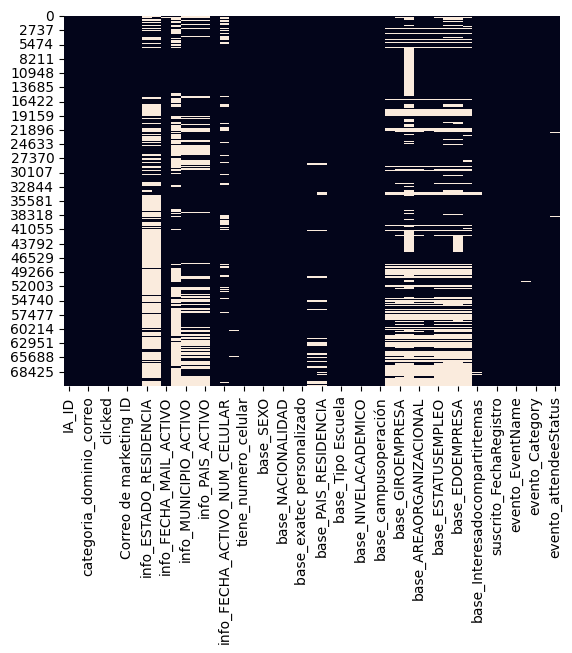

In [1128]:
#Usaremos un mapa de calor para tenerlo más visual
sns.heatmap(df_unido.isnull(), cbar=False)
plt.show()

##**Respuesta:**
* Mostraremos los valores faltantes de la columnas que creemos importantes para el modelo

* Patrones: Se puede detectar que los egresados solo insertan información de un puesto de trabajo y empresa. Atributos como:
Nombre_Empresa2,3,4,5
Puesto2,3,4,5
Se encuentran vacíos por ello en el preprocesamiento se eliminaron



In [1129]:
#Necesitaremos visualizar de una mejor manera la cantidad relativa de datos faltantes por ello se requiere ver el porcenaje
# Porcentaje de valores faltantes en cada columna
missing_data_percent = (df_unido.isnull().sum() / len(df_unido)) * 100
display("Porcentaje de valores faltantes en cada columna:\n", missing_data_percent)

'Porcentaje de valores faltantes en cada columna:\n'

IA_ID                             0.000000
rol                               0.000000
categoria_dominio_correo          0.000000
opened                            0.000000
clicked                           0.000000
replied                           0.000000
Correo de marketing ID            0.000000
Campaña ID                        0.000000
info_ESTADO_RESIDENCIA           59.128161
info_PAIS_RESIDENCIA             58.584140
info_FECHA_MAIL_ACTIVO            0.414693
info_POBLACION_ACTIVO            50.512392
info_MUNICIPIO_ACTIVO            25.668780
info_ESTADO_ACTIVO               25.668780
info_PAIS_ACTIVO                 25.668780
info_FECHA_ACTIVO                 0.000000
info_FECHA_ACTIVO_NUM_CELULAR    13.807161
info_ESTADOCIVIL                  0.306451
tiene_numero_celular              0.000000
tiene_linkedin                    0.000000
base_SEXO                         0.000000
base_año nac                      0.000000
base_NACIONALIDAD                 0.000000
base_ESTADONACIMIENTO             0.000000
base_exatec personalizado         0.000000
base_ESTADO_RESIDENCIA            7.505236
base_PAIS_RESIDENCIA              9.242729
base_AñoGrad                      0.000000
base_Tipo Escuela                 0.000000
base_SIGLASDELPROGRAMA            0.000000
base_NIVELACADEMICO               0.000000
base_IDCAMPUS                     0.000000
base_campusoperación              0.000000
base_NOMBREEMPRESA               24.871726
base_GIROEMPRESA                 29.043957
base_TIPOEMPRESA                 54.309291
base_AREAORGANIZACIONAL          27.472342
base_PUESTO                      24.885784
base_ESTATUSEMPLEO               30.022351
base_CDEMPRESA                   34.912915
base_EDOEMPRESA                  39.428146
base_PAISEMPRESA                 31.388729
base_Interesadocompartirtemas     1.305931
HizoPrepaTec                      0.000000
suscrito_FechaRegistro            0.000000
giveaway_fecha                    0.000000
evento_EventName                  0.000000
evento_Campus                     0.178529
evento_Category                   0.000000
evento_CheckedIn                  0.000000
evento_attendeeStatus             0.946062
dtype: float64

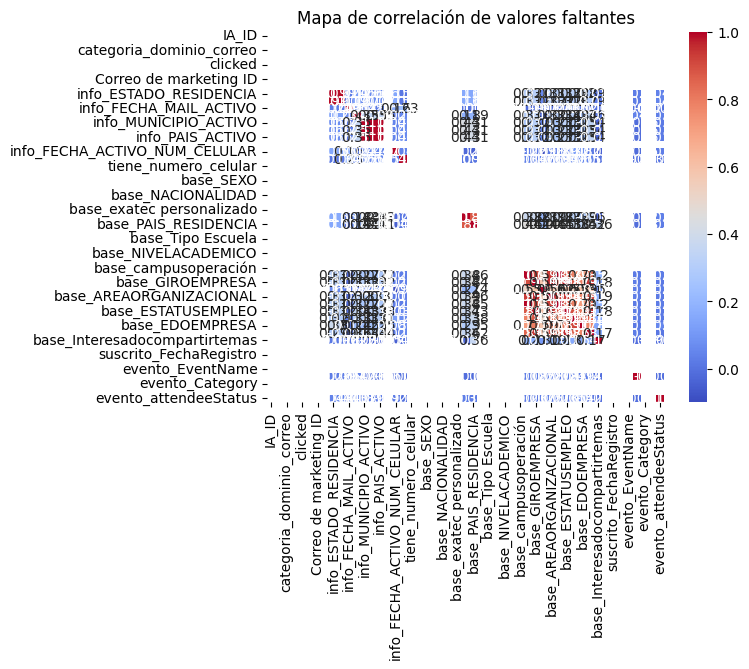

In [1130]:
#También es importante revisar la correlación entre atributos, es decir, es comúno que si en una columna falta información en otra también
# Mapa de calor para visualizar la correlación entre valores faltantes
sns.heatmap(df_unido.isnull().corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de correlación de valores faltantes")
plt.show()


In [1131]:
#Al existir atributos con mucha información faltante, vemos conveniente hacer una clasificación de columnas según la cantidad de valores faltantes:
#Bajo porcentaje de valores faltantes (<5%)
#Medio (entre 5% y 30%)
#Alto (>30%)

# Clasificación de columnas según la cantidad de valores faltantes
missing_data_classification = pd.DataFrame({
    'Columnas': df_unido.columns,
    'Porcentaje de Faltantes': missing_data_percent
})

# Filtrar columnas según niveles de valores faltantes
bajo_faltantes = missing_data_classification[missing_data_classification['Porcentaje de Faltantes'] < 5]
medio_faltantes = missing_data_classification[(missing_data_classification['Porcentaje de Faltantes'] >= 5) & (missing_data_classification['Porcentaje de Faltantes'] < 30)]
alto_faltantes = missing_data_classification[missing_data_classification['Porcentaje de Faltantes'] >= 30]

display("Columnas con bajo porcentaje de faltantes (<5%):\n", bajo_faltantes)
display("Columnas con porcentaje moderado de faltantes (5%-30%):\n", medio_faltantes)
display("Columnas con alto porcentaje de faltantes (>30%):\n", alto_faltantes)


'Columnas con bajo porcentaje de faltantes (<5%):\n'

Columnas  \
IA_ID                                                  IA_ID   
rol                                                      rol   
categoria_dominio_correo            categoria_dominio_correo   
opened                                                opened   
clicked                                              clicked   
replied                                              replied   
Correo de marketing ID                Correo de marketing ID   
Campaña ID                                        Campaña ID   
info_FECHA_MAIL_ACTIVO                info_FECHA_MAIL_ACTIVO   
info_FECHA_ACTIVO                          info_FECHA_ACTIVO   
info_ESTADOCIVIL                            info_ESTADOCIVIL   
tiene_numero_celular                    tiene_numero_celular   
tiene_linkedin                                tiene_linkedin   
base_SEXO                                          base_SEXO   
base_año nac                                    base_año nac   
base_NACIONALIDAD                          base_NACIONALIDAD   
base_ESTADONACIMIENTO                  base_ESTADONACIMIENTO   
base_exatec personalizado          base_exatec personalizado   
base_AñoGrad                                    base_AñoGrad   
base_Tipo Escuela                          base_Tipo Escuela   
base_SIGLASDELPROGRAMA                base_SIGLASDELPROGRAMA   
base_NIVELACADEMICO                      base_NIVELACADEMICO   
base_IDCAMPUS                                  base_IDCAMPUS   
base_campusoperación                    base_campusoperación   
base_Interesadocompartirtemas  base_Interesadocompartirtemas   
HizoPrepaTec                                    HizoPrepaTec   
suscrito_FechaRegistro                suscrito_FechaRegistro   
giveaway_fecha                                giveaway_fecha   
evento_EventName                            evento_EventName   
evento_Campus                                  evento_Campus   
evento_Category                              evento_Category   
evento_CheckedIn                            evento_CheckedIn   
evento_attendeeStatus                  evento_attendeeStatus   

                               Porcentaje de Faltantes  
IA_ID                                         0.000000  
rol                                           0.000000  
categoria_dominio_correo                      0.000000  
opened                                        0.000000  
clicked                                       0.000000  
replied                                       0.000000  
Correo de marketing ID                        0.000000  
Campaña ID                                    0.000000  
info_FECHA_MAIL_ACTIVO                        0.414693  
info_FECHA_ACTIVO                             0.000000  
info_ESTADOCIVIL                              0.306451  
tiene_numero_celular                          0.000000  
tiene_linkedin                                0.000000  
base_SEXO                                     0.000000  
base_año nac                                  0.000000  
base_NACIONALIDAD                             0.000000  
base_ESTADONACIMIENTO                         0.000000  
base_exatec personalizado                     0.000000  
base_AñoGrad                                  0.000000  
base_Tipo Escuela                             0.000000  
base_SIGLASDELPROGRAMA                        0.000000  
base_NIVELACADEMICO                           0.000000  
base_IDCAMPUS                                 0.000000  
base_campusoperación                          0.000000  
base_Interesadocompartirtemas                 1.305931  
HizoPrepaTec                                  0.000000  
suscrito_FechaRegistro                        0.000000  
giveaway_fecha                                0.000000  
evento_EventName                              0.000000  
evento_Campus                                 0.178529  
evento_Category                               0.000000  
evento_CheckedIn                              0.000

'Columnas con porcentaje moderado de faltantes (5%-30%):\n'

Columnas  \
info_MUNICIPIO_ACTIVO                  info_MUNICIPIO_ACTIVO   
info_ESTADO_ACTIVO                        info_ESTADO_ACTIVO   
info_PAIS_ACTIVO                            info_PAIS_ACTIVO   
info_FECHA_ACTIVO_NUM_CELULAR  info_FECHA_ACTIVO_NUM_CELULAR   
base_ESTADO_RESIDENCIA                base_ESTADO_RESIDENCIA   
base_PAIS_RESIDENCIA                    base_PAIS_RESIDENCIA   
base_NOMBREEMPRESA                        base_NOMBREEMPRESA   
base_GIROEMPRESA                            base_GIROEMPRESA   
base_AREAORGANIZACIONAL              base_AREAORGANIZACIONAL   
base_PUESTO                                      base_PUESTO   

                               Porcentaje de Faltantes  
info_MUNICIPIO_ACTIVO                        25.668780  
info_ESTADO_ACTIVO                           25.668780  
info_PAIS_ACTIVO                             25.668780  
info_FECHA_ACTIVO_NUM_CELULAR                13.807161  
base_ESTADO_RESIDENCIA                        7.505236  
base_PAIS_RESIDENCIA                          9.242729  
base_NOMBREEMPRESA                           24.871726  
base_GIROEMPRESA                             29.043957  
base_AREAORGANIZACIONAL                      27.472342  
base_PUESTO                                  24.885784

'Columnas con alto porcentaje de faltantes (>30%):\n'

Columnas  Porcentaje de Faltantes
info_ESTADO_RESIDENCIA  info_ESTADO_RESIDENCIA                59.128161
info_PAIS_RESIDENCIA      info_PAIS_RESIDENCIA                58.584140
info_POBLACION_ACTIVO    info_POBLACION_ACTIVO                50.512392
base_TIPOEMPRESA              base_TIPOEMPRESA                54.309291
base_ESTATUSEMPLEO          base_ESTATUSEMPLEO                30.022351
base_CDEMPRESA                  base_CDEMPRESA                34.912915
base_EDOEMPRESA                base_EDOEMPRESA                39.428146
base_PAISEMPRESA              base_PAISEMPRESA                31.388729

# **Pregunta 2: ¿Cuáles son las estadísticas resumidas del conjunto de datos?**



In [1132]:
display(df_unido.describe(include='all'))  # Muestra estadísticas resumidas de todas las columnas

IA_ID                           rol categoria_dominio_correo  \
count    71137.000000                         71137                    71137   
unique            NaN                            20                        3   
top               NaN  Colaborador; Donante; Exatec                Educativo   
freq              NaN                         30561                    33894   
mean    158457.496647                           NaN                      NaN   
min       3102.000000                           NaN                      NaN   
25%      52212.000000                           NaN                      NaN   
50%     152207.000000                           NaN                      NaN   
75%     234473.000000                           NaN                      NaN   
max     369281.000000                           NaN                      NaN   
std      99071.428794                           NaN                      NaN   

              opened       clicked  replied  Correo de marketing ID  \
count   71137.000000  71137.000000  71137.0            7.113700e+04   
unique           NaN           NaN      NaN                     NaN   
top              NaN           NaN      NaN                     NaN   
freq             NaN           NaN      NaN                     NaN   
mean        1.847435      0.105121      0.0            3.537901e+11   
min         1.000000      0.000000      0.0            2.292888e+09   
25%         1.000000      0.000000      0.0            3.559530e+11   
50%         1.000000      0.000000      0.0            3.592480e+11   
75%         2.000000      0.000000      0.0            3.633040e+11   
max        30.000000     17.000000      0.0            3.656880e+11   
std         1.682763      0.610394      0.0            4.298541e+10   

         Campaña ID info_ESTADO_RESIDENCIA info_PAIS_RESIDENCIA  ...  \
count         71137                  29075                29462  ...   
unique            9                     41                   10  ...   
top     10949903422             Nuevo León               México  ...   
freq          62157                  21162                24679  ...   
mean            NaN                    NaN                  NaN  ...   
min             NaN                    NaN                  NaN  ...   
25%             NaN                    NaN                  NaN  ...   
50%             NaN                    NaN                  NaN  ...   
75%             NaN                    NaN                  NaN  ...   
max             NaN                    NaN                  NaN  ...   
std             NaN                    NaN                  NaN  ...   

       base_PAISEMPRESA base_Interesadocompartirtemas  HizoPrepaTec  \
count             48808                         70208  71137.000000   
unique               18                             3           NaN   
top              México                                         NaN   
freq              44916                         46264           NaN   
mean                NaN                           NaN      0.240283   
min                 NaN                           NaN      0.000000   
25%                 NaN                           NaN      0.000000   
50%                 NaN                           NaN      0.000000   
75%                 NaN                           NaN      0.000000   
max                 NaN                           NaN      1.000000   
std                 NaN                           NaN      0.427258   

       suscrito_FechaRegistro       giveaway_fecha    evento_EventName  \
count                   71137                71137               71137   
unique                    104                  NaN                 639   
top          10/09/2020 14:25                  NaN  Festum 2023 EXATEC   
freq                    48074                  NaN               12995   
mean                      NaN  2024-09-25 22:18:00                 NaN   
min                       NaN  2024-09-2

In [1133]:
# Seleccionar solo las variables numéricas
numeric_df = df_unido.select_dtypes(include=[np.number])

# Calcular estadísticas avanzadas para las variables numéricas
numeric_stats = numeric_df.describe().transpose()

# Calcular skewness (asimetría)
numeric_stats['Skewness'] = numeric_df.skew()

# Calcular el coeficiente de variación (CV = std/mean) con manejo de división por cero
numeric_stats['Coeficiente de Variación'] = numeric_stats.apply(
    lambda row: row['std'] / row['mean'] if row['mean'] != 0 else np.nan, axis=1
)

# Mostrar las estadísticas avanzadas
display(numeric_stats)


count          mean           std           min  \
IA_ID                   71137.0  1.584575e+05  9.907143e+04  3.102000e+03   
opened                  71137.0  1.847435e+00  1.682763e+00  1.000000e+00   
clicked                 71137.0  1.051211e-01  6.103939e-01  0.000000e+00   
replied                 71137.0  0.000000e+00  0.000000e+00  0.000000e+00   
Correo de marketing ID  71137.0  3.537901e+11  4.298541e+10  2.292888e+09   
tiene_numero_celular    71137.0  8.100004e-01  3.923033e-01  0.000000e+00   
tiene_linkedin          71137.0  4.835739e-02  2.145218e-01  0.000000e+00   
base_año nac            71137.0  1.981902e+03  9.494309e+00  1.942000e+03   
base_NIVELACADEMICO     71137.0  6.410462e+00  1.647136e+00  5.000000e+00   
HizoPrepaTec            71137.0  2.402828e-01  4.272582e-01  0.000000e+00   

                                 25%           50%           75%  \
IA_ID                   5.221200e+04  1.522070e+05  2.344730e+05   
opened                  1.000000e+00  1.000000e+00  2.000000e+00   
clicked                 0.000000e+00  0.000000e+00  0.000000e+00   
replied                 0.000000e+00  0.000000e+00  0.000000e+00   
Correo de marketing ID  3.559530e+11  3.592480e+11  3.633040e+11   
tiene_numero_celular    1.000000e+00  1.000000e+00  1.000000e+00   
tiene_linkedin          0.000000e+00  0.000000e+00  0.000000e+00   
base_año nac            1.976000e+03  1.982000e+03  1.989000e+03   
base_NIVELACADEMICO     5.000000e+00  5.000000e+00  8.000000e+00   
HizoPrepaTec            0.000000e+00  0.000000e+00  0.000000e+00   

                                 max   Skewness  Coeficiente de Variación  
IA_ID                   3.692810e+05   0.268718                  0.625224  
opened                  3.000000e+01   4.770256                  0.910864  
clicked                 1.700000e+01  19.155465                  5.806578  
replied                 0.000000e+00   0.000000                       NaN  
Correo de marketing ID  3.656880e+11  -6.986341                  0.121500  
tiene_numero_celular    1.000000e+00  -1.580456                  0.484325  
tiene_linkedin          1.000000e+00   4.210810                  4.436174  
base_año nac            2.002000e+03  -0.462824                  0.004791  
base_NIVELACADEMICO     1.400000e+01   0.802976                  0.256945  
HizoPrepaTec            1.000000e+00   1.215773                  1.778147

## **Análisis:**

**Variables numéricas**
Las estadísticas resumidas para las variables numéricas fueron calculadas utilizando el método describe() de pandas, complementado con métricas avanzadas como skewness (asimetría) y el coeficiente de variación. Estas métricas nos permiten entender la distribución y variabilidad de las variables, y determinar si es necesario aplicar transformaciones adicionales para corregir distribuciones sesgadas.

**Observaciones**
* **opened**: Tiene un sesgo altamente positivo de 6.95, lo que indica que la mayoría de los valores son bajos. El coeficiente de variación es 0.75, lo cual sugiere una gran variación respecto a la media.
* **clicked**: Muestra un sesgo positivo aún mayor de 11.18, que nos dice que existe una una distribución muy asimétrica. El coeficiente de variación es 5.00, indicando que la mayoría de los registros no tienen clicks

**Variables categóricas**
Las estadísticas para las variables categóricas se calcularon con value_counts() y se presentaron como frecuencias relativas (% de cada categoría). Esto permitió identificar la proporción de cada categoría en relación con el total.

**Observaciones**
* **contactable_dominio_correo**: La mayoría de los correos pertenecen a dominios como gmail.com (43.94%), hotmail.com (16.09%) y tec.mx (11.48%). El resto se distribuye en más de 7,769 dominios diferentes.
* **contactable_estatus**: La mayoría de los registros están clasificados como Ciclo Anterior (92.46%), con solo el 7.53% en Ciclo Actual. Revisaremos con el egresados esto posiblemente es porque se encuentran en "inicio de ciclo".
* **base_SEXO**: Hay un mayor número de hombres (60.89%) que de mujeres (39.10%).
* **base_NACIONALIDAD**: Predominantemente Mexicana (95.91%), seguida por Colombiana (0.75%) y Ecuatoriana (0.59%). Las otras nacionalidades tienen una representación mínima.

**Identificación de patrones**
Se observó una alta concentración de valores en ciertos dominios de correo y en el estado de residencia (Nuevo León y Ciudad de México). Además, las variables relacionadas con premios y reconocimientos mostraron distribuciones sesgadas hacia premios recientes.

**Distribuciones sesgadas**: Las variables numéricas como opened y clicked presentaron un alto sesgo positivo. Aplicaremos transformaciones logarítmicas para las variables con sesgo positivo

**Siguientes pasos para tratamiento de datos**
Dado que algunas variables tienen alta dispersión y sesgo, aplicaremos algunas transformaciones como:
* **Transformación logarítmica**: Para variables como opened y clicked para reducir el sesgo positivo.

**Conclusión** El análisis estadístico ha permitido identificar características clave del conjunto de datos, como la existencia de distribuciones sesgadas, alta variabilidad en ciertas columnas y patrones de ausencia significativos. Las técnicas de visualización y métricas adicionales sugieren que se deben aplicar transformaciones y normalizaciones antes de proceder con un análisis más profundo.

# **Pregunta 3: ¿Hay valores atípicos en el conjunto de datos?**

Los valores atípicos son puntos de datos que se alejan significativamente del resto de las observaciones y pueden distorsionar análisis estadísticos, regresiones o modelos predictivos. Identificarlos nos ayudará a decidir si se deben eliminar, transformar o estudiar más a fondo.

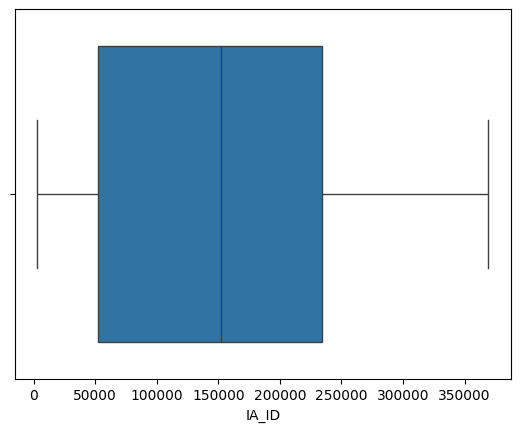

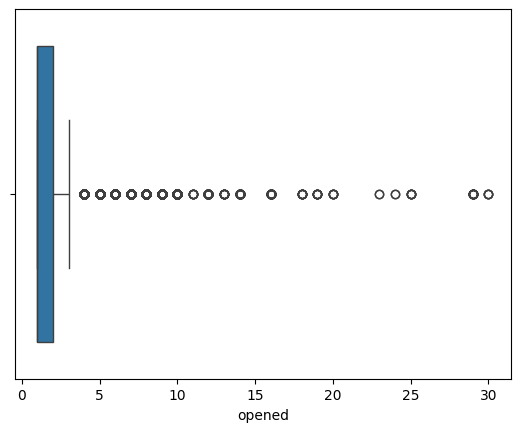

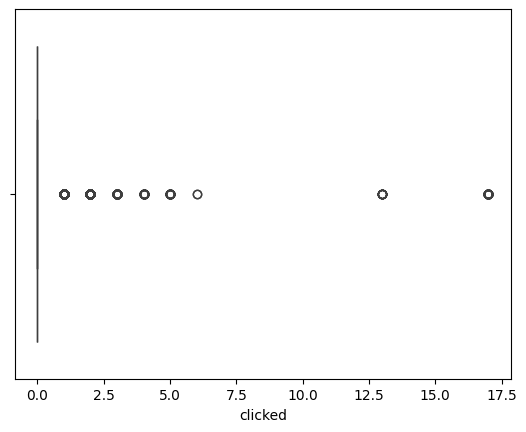

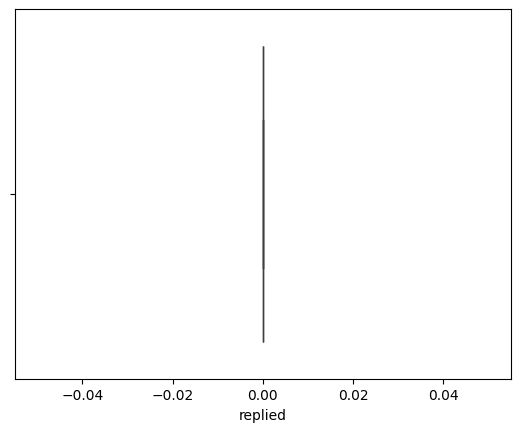

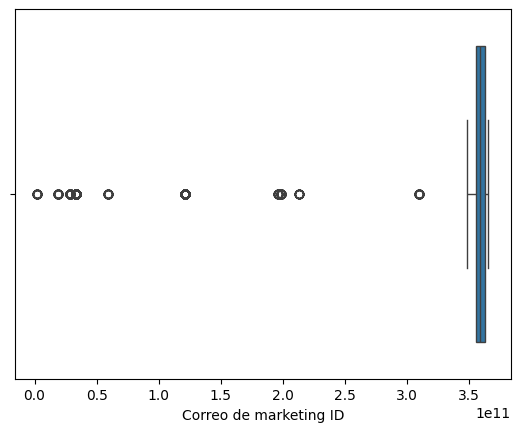

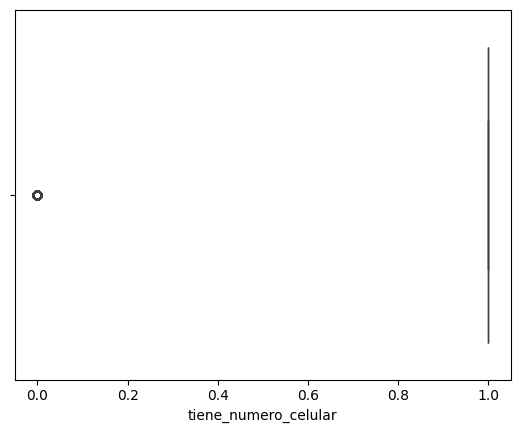

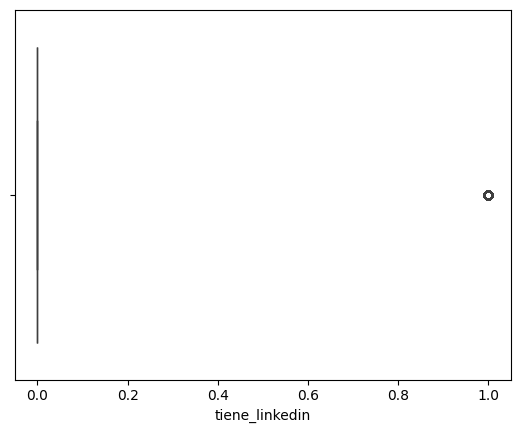

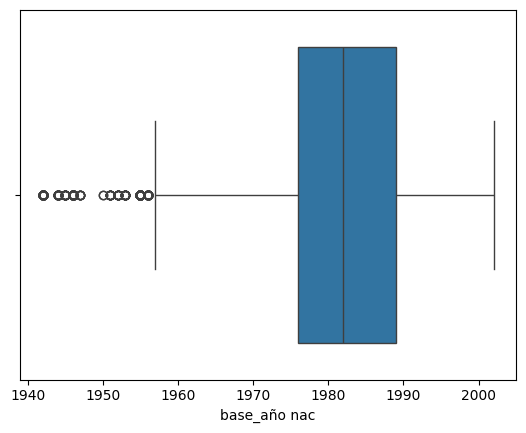

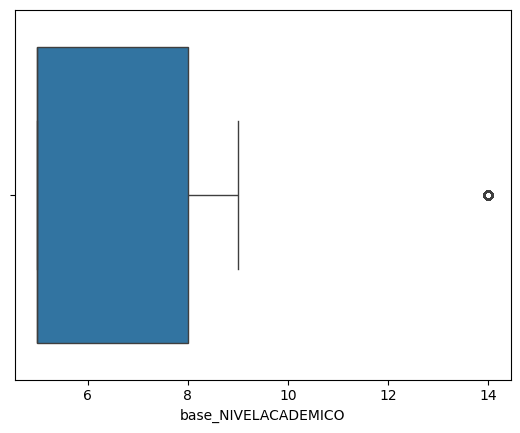

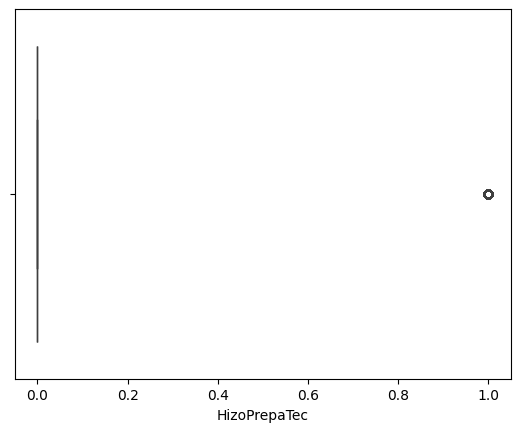

In [1134]:
#Identificar valores atípicos con boxplots:

#for column in df_unido.select_dtypes(include=[np.number]).columns:
 #   sns.boxplot(x=df_unido[column])
  #  plt.show()

for column in df_unido.select_dtypes(include=[np.number]).columns:
    if not df_unido[column].empty:
        try:
            sns.boxplot(x=df_unido[column])
            plt.show()
        except ValueError:
            display(f"No se grafica la columna: {column} ya que no es un valor numérico o válido.")

In [1135]:
# Seleccionar solo las columnas numéricas del DataFrame
df_unido_numeric = df_unido.select_dtypes(include=['number'])

# Calcular los cuartiles y el IQR solo para las columnas numéricas
Q1 = df_unido_numeric.quantile(0.25)
Q3 = df_unido_numeric.quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos (outliers) en el DataFrame numérico
outliers = ((df_unido_numeric < (Q1 - 1.5 * IQR)) | (df_unido_numeric > (Q3 + 1.5 * IQR))).sum()

# Crear un resumen de outliers para cada columna
outlier_summary = pd.DataFrame({'Column': df_unido_numeric.columns, 'Outliers': outliers.values})

# Mostrar el resumen de valores atípicos usando display
display(outlier_summary)


Column  Outliers
0                   IA_ID         0
1                  opened      6254
2                 clicked      5480
3                 replied         0
4  Correo de marketing ID      1477
5    tiene_numero_celular     13516
6          tiene_linkedin      3440
7            base_año nac       474
8     base_NIVELACADEMICO       496
9            HizoPrepaTec     17093

##**Respuesta**:

**Recomendaciones para el tratamiento de valores atípicos**
* Transformación usando logaritmos
* Imputación con la mediana o con valores calculados basados en otras variables para mantener la integridad del conjunto de datos

**Descripción de los métodos utilizados**

**Boxplot**: Nos ayudó a resaltar visualmente los valores atípicos como puntos fuera del rango esperado (por encima o debajo de los bigotes).

**IQR**: Cualquier valor por debajo de
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
Q1−1.5×IQR o por encima de
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
Q3+1.5×IQR se considera un valor atípico.

No todos nuestros datos numéricos son relevantes o requieren el uso de un box plot. Por ejemplo, los valores que representan ID son simplemente identificadores asignados y no aportan información estadística útil. Por otro lado, las variables binarias numéricas (1,0), aunque son números, representan en realidad variables categóricas transformadas.

**Conclusión de la pregunta:**
Para identificar los valores atípicos en el conjunto de datos, se realizaron dos análisis principales: un análisis visual con boxplots y un análisis estadístico utilizando el rango intercuartílico (IQR).

Se encontró que las columnas 'opened' y 'clicked' presentan un número significativo de valores atípicos, posiblemente debido a la distribución sesgada de estos valores. Estos valores podrían ser estudiados para determinar si se deben eliminar, transformar o mantener como casos especiales.

# **Pregunta 4: ¿Cuál es la cardinalidad de las variables categóricas?**



In [1136]:
#Obtener el número de categorías únicas en las columnas categóricas
for col in df_unido.select_dtypes(include=['object']).columns:
    display(f"{col}: {df_unido[col].nunique()} categorías")


'rol: 20 categorías'

'categoria_dominio_correo: 3 categorías'

'Campaña ID: 9 categorías'

'info_ESTADO_RESIDENCIA: 41 categorías'

'info_PAIS_RESIDENCIA: 10 categorías'

'info_FECHA_MAIL_ACTIVO: 520 categorías'

'info_POBLACION_ACTIVO: 115 categorías'

'info_MUNICIPIO_ACTIVO: 98 categorías'

'info_ESTADO_ACTIVO: 31 categorías'

'info_PAIS_ACTIVO: 4 categorías'

'info_FECHA_ACTIVO: 1332 categorías'

'info_FECHA_ACTIVO_NUM_CELULAR: 648 categorías'

'info_ESTADOCIVIL: 7 categorías'

'base_SEXO: 2 categorías'

'base_NACIONALIDAD: 16 categorías'

'base_ESTADONACIMIENTO: 56 categorías'

'base_exatec personalizado: 3 categorías'

'base_ESTADO_RESIDENCIA: 55 categorías'

'base_PAIS_RESIDENCIA: 18 categorías'

'base_AñoGrad: 68 categorías'

'base_Tipo Escuela: 6 categorías'

'base_SIGLASDELPROGRAMA: 180 categorías'

'base_IDCAMPUS: 35 categorías'

'base_campusoperación: 32 categorías'

'base_NOMBREEMPRESA: 1017 categorías'

'base_GIROEMPRESA: 67 categorías'

'base_TIPOEMPRESA: 4 categorías'

'base_AREAORGANIZACIONAL: 31 categorías'

'base_PUESTO: 756 categorías'

'base_ESTATUSEMPLEO: 2 categorías'

'base_CDEMPRESA: 221 categorías'

'base_EDOEMPRESA: 32 categorías'

'base_PAISEMPRESA: 18 categorías'

'base_Interesadocompartirtemas: 3 categorías'

'suscrito_FechaRegistro: 104 categorías'

'evento_EventName: 639 categorías'

'evento_Campus: 37 categorías'

'evento_Category: 14 categorías'

'evento_attendeeStatus: 5 categorías'

In [1137]:
#df_unido.select_dtypes(include=['object']).nunique()
df_unido['info_FECHA_MAIL_ACTIVO']

0                     NaN
1                     NaN
2        22/09/2017 00:00
3        22/09/2017 00:00
4        22/09/2017 00:00
               ...       
71132    12/02/2024 00:00
71133    12/02/2024 00:00
71134    12/02/2024 00:00
71135    12/02/2024 00:00
71136    12/02/2024 00:00
Name: info_FECHA_MAIL_ACTIVO, Length: 71137, dtype: object

In [1138]:
df_unido['suscrito_FechaRegistro']

0        07/06/2024 17:23
1        07/06/2024 17:23
2        10/09/2020 14:25
3        10/09/2020 14:25
4        10/09/2020 14:25
               ...       
71132    22/09/2024 16:04
71133    22/09/2024 16:04
71134    22/09/2024 16:04
71135    22/09/2024 16:04
71136    22/09/2024 16:04
Name: suscrito_FechaRegistro, Length: 71137, dtype: object

In [1139]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['info_FECHA_MAIL_ACTIVO'] = pd.to_datetime(df_unido['info_FECHA_MAIL_ACTIVO'], format='%d/%m/%Y', errors='coerce')
#df_unido['info_FECHA_ACTIVO'] = pd.to_datetime(df_unido['info_FECHA_ACTIVO'], format='%d/%m/%Y', errors='coerce')
#df_unido['info_FECHA_ACTIVO_NUM_CELULAR'] = pd.to_datetime(df_unido['info_FECHA_ACTIVO_NUM_CELULAR'], format='%d/%m/%Y', errors='coerce')
#df_unido['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], format='%d/%m/%Y', errors='coerce')

df_unido['info_FECHA_MAIL_ACTIVO'] = pd.to_datetime(df_unido['info_FECHA_MAIL_ACTIVO'], format='%d/%m/%Y %H:%M')
df_unido['info_FECHA_ACTIVO'] = pd.to_datetime(df_unido['info_FECHA_ACTIVO'], format='%d/%m/%Y %H:%M')
df_unido['info_FECHA_ACTIVO_NUM_CELULAR'] = pd.to_datetime(df_unido['info_FECHA_ACTIVO_NUM_CELULAR'], format='%d/%m/%Y %H:%M')



In [1140]:
df_unido['suscrito_FechaRegistro']

0        07/06/2024 17:23
1        07/06/2024 17:23
2        10/09/2020 14:25
3        10/09/2020 14:25
4        10/09/2020 14:25
               ...       
71132    22/09/2024 16:04
71133    22/09/2024 16:04
71134    22/09/2024 16:04
71135    22/09/2024 16:04
71136    22/09/2024 16:04
Name: suscrito_FechaRegistro, Length: 71137, dtype: object

In [1141]:
df_unido['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], format='%d/%m/%Y %H:%M')

In [1142]:
df_unido['suscrito_FechaRegistro']

0       2024-06-07 17:23:00
1       2024-06-07 17:23:00
2       2020-09-10 14:25:00
3       2020-09-10 14:25:00
4       2020-09-10 14:25:00
                ...        
71132   2024-09-22 16:04:00
71133   2024-09-22 16:04:00
71134   2024-09-22 16:04:00
71135   2024-09-22 16:04:00
71136   2024-09-22 16:04:00
Name: suscrito_FechaRegistro, Length: 71137, dtype: datetime64[ns]

In [1143]:
#Obtener el número de categorías únicas en las columnas categóricas
for col in df_unido.select_dtypes(include=['object']).columns:
    display(f"{col}: {df_unido[col].nunique()} categorías")


'rol: 20 categorías'

'categoria_dominio_correo: 3 categorías'

'Campaña ID: 9 categorías'

'info_ESTADO_RESIDENCIA: 41 categorías'

'info_PAIS_RESIDENCIA: 10 categorías'

'info_POBLACION_ACTIVO: 115 categorías'

'info_MUNICIPIO_ACTIVO: 98 categorías'

'info_ESTADO_ACTIVO: 31 categorías'

'info_PAIS_ACTIVO: 4 categorías'

'info_ESTADOCIVIL: 7 categorías'

'base_SEXO: 2 categorías'

'base_NACIONALIDAD: 16 categorías'

'base_ESTADONACIMIENTO: 56 categorías'

'base_exatec personalizado: 3 categorías'

'base_ESTADO_RESIDENCIA: 55 categorías'

'base_PAIS_RESIDENCIA: 18 categorías'

'base_AñoGrad: 68 categorías'

'base_Tipo Escuela: 6 categorías'

'base_SIGLASDELPROGRAMA: 180 categorías'

'base_IDCAMPUS: 35 categorías'

'base_campusoperación: 32 categorías'

'base_NOMBREEMPRESA: 1017 categorías'

'base_GIROEMPRESA: 67 categorías'

'base_TIPOEMPRESA: 4 categorías'

'base_AREAORGANIZACIONAL: 31 categorías'

'base_PUESTO: 756 categorías'

'base_ESTATUSEMPLEO: 2 categorías'

'base_CDEMPRESA: 221 categorías'

'base_EDOEMPRESA: 32 categorías'

'base_PAISEMPRESA: 18 categorías'

'base_Interesadocompartirtemas: 3 categorías'

'evento_EventName: 639 categorías'

'evento_Campus: 37 categorías'

'evento_Category: 14 categorías'

'evento_attendeeStatus: 5 categorías'

## **Análisis**:
Esta pregunta nos ayuda a revisar los catálogos que existen

In [1144]:
#En este código trataremos de hacer más visual la información de los catálogos

# Crear una lista para almacenar los resultados
resultados = []

# Obtener los valores únicos de cada columna categórica
for col in df_unido.select_dtypes(include=['object']).columns:
    valores_unicos = df_unido[col].unique()
    num_valores = len(valores_unicos)

    # Si hay más de 10 valores únicos, mostrar solo los primeros 10
   #if num_valores > 10:
        #valores_mostrados = ", ".join(map(str, valores_unicos[:10])) + "..."
    #else:
    valores_mostrados = ", ".join(map(str, valores_unicos))

    # Agregar la columna, cantidad de categorías y los valores únicos (limitados a 10 si es el caso)
    resultados.append([col, num_valores, valores_mostrados])

# Crear un DataFrame con los resultados
df_resultados = pd.DataFrame(resultados, columns=['Columna', 'Número de Categorías', 'Valores Únicos (primeros 10)'])

# Mostrar la tabla resultante
from IPython.display import display
display(df_resultados)


Columna  Número de Categorías  \
0                             rol                    20   
1        categoria_dominio_correo                     3   
2                      Campaña ID                     9   
3          info_ESTADO_RESIDENCIA                    42   
4            info_PAIS_RESIDENCIA                    11   
5           info_POBLACION_ACTIVO                   116   
6           info_MUNICIPIO_ACTIVO                    99   
7              info_ESTADO_ACTIVO                    32   
8                info_PAIS_ACTIVO                     5   
9                info_ESTADOCIVIL                     8   
10                      base_SEXO                     2   
11              base_NACIONALIDAD                    16   
12          base_ESTADONACIMIENTO                    56   
13      base_exatec personalizado                     3   
14         base_ESTADO_RESIDENCIA                    56   
15           base_PAIS_RESIDENCIA                    19   
16                   base_AñoGrad                    68   
17              base_Tipo Escuela                     6   
18         base_SIGLASDELPROGRAMA                   180   
19                  base_IDCAMPUS                    35   
20           base_campusoperación                    32   
21             base_NOMBREEMPRESA                  1018   
22               base_GIROEMPRESA                    68   
23               base_TIPOEMPRESA                     5   
24        base_AREAORGANIZACIONAL                    32   
25                    base_PUESTO                   757   
26             base_ESTATUSEMPLEO                     3   
27                 base_CDEMPRESA                   222   
28                base_EDOEMPRESA                    33   
29               base_PAISEMPRESA                    19   
30  base_Interesadocompartirtemas                     4   
31               evento_EventName                   639   
32                  evento_Campus                    38   
33                evento_Category                    14   
34          evento_attendeeStatus                     6   

                         Valores Únicos (primeros 10)  
0   Exatec, Consejero; Exatec, Donante; Exatec, Co...  
1                          Genérico, Otros, Educativo  
2   10949903422, 2.77422E+11, 19343712904, 2.06465...  
3   nan, Estado de México, Nuevo León, Sinaloa, So...  
4   nan, Mexico, México, Estados Unidos de América...  
5   nan, México, Tuxtla Gutiérrez, Indefinido, Mon...  
6   San Pedro Garza García, nan, Monterrey, Hermos...  
7   Nuevo León, nan, Sonora, Quintana Roo, Estado ...  
8   México, nan, Países Bajos, Estados Unidos de A...  
9   Soltero, Casado, Divorciado, Viudo, nan, Unión...  
10                                Masculino, Femenino  
11  Indefinido, Mexicana, Estadounidense, Bolivian...  
12  indefinido, Edomex, chiapas, chihuahua, Nuevo ...  
13                                 Sí, No, Sin correo  
14  Nuevo León, ciudad de mexico, chiapas, chihuah...  
15  Mexico, United States, nan, Bolivia, Canada, S...  
16  1967, 1978, 1969, 1968, 1972, 2009, #VALUE!, 1...  
17  Negocios, Ingeniería y Ciencias, Humanidades y...  
18  LAE, MA, IB, CP, MIC, IME, DEH, MSI, LEC, IQA,...  
19  A, Q, C, AA, 2, M, F, S, E, W, G, 1, Z, J, GA,...  
20  Monterrey, Ciudad de México, Guaymas, EGADE, P...  
21  nan, GELPROTEC S.A. DE C.V., TURISTICA DEL SUR...  
22  nan, Consultoría, Hoteleria y turismo, De Serv...  
23  nan, Mexicana, Transnacional en México, Extran...  
24  nan, Consultoría, Administración general, Merc...  
25  nan, Director Técnico, GERENTE GENERAL, Projec...  
26                                          nan, A, I  
27  nan, Huxquilucan, Monterrey, Chihuahua, MONTER...  
28  nan, Estado de México, Nuevo León, Chihuahua, ...  
29  nan, México, Bolivia, Canadá, Estados Unidos d...  
30                                      , No, Sí, nan  
31  Regreso a Casa | 50, 55, 60 y más aniversarios...  
32  TEC Campus Monterrey, TEC Campus Sonora Norte,...

## **Análisis**

Existen atributos con más de 100 categorías, esto puede afectar el rendimiento del modelo o dificultar su interpretación.

Para estas columnas evaluaremos la opción de agrupar categorías similares o reducir la cardinalidad mediante técnicas como el one-hot encoding limitado o target encoding

**Transformaciones**
Existen columnas categóricas con cardinalidad muy baja (por ejemplo, columnas binarias o con tres categorías como base_HizoPrepaTec), se aplicarán técnicas como el label encoding en lugar de one-hot encoding para simplificar la codificación y evitar la explosión de variables dummy


# **Pregunta 5: ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?**


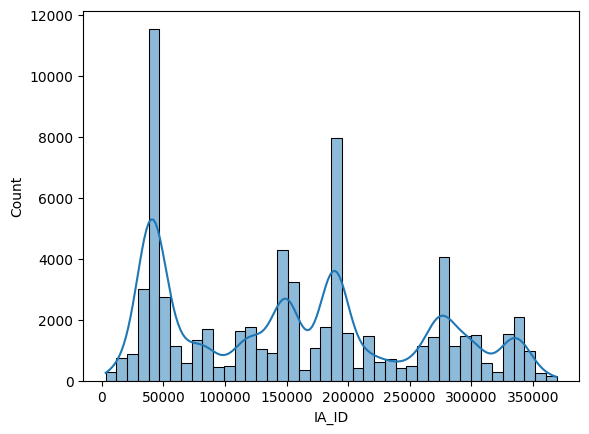

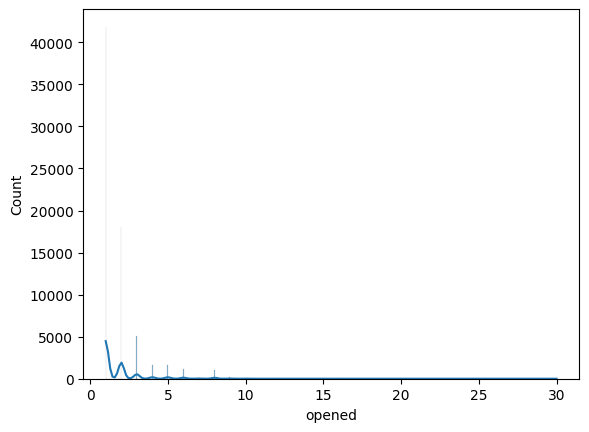

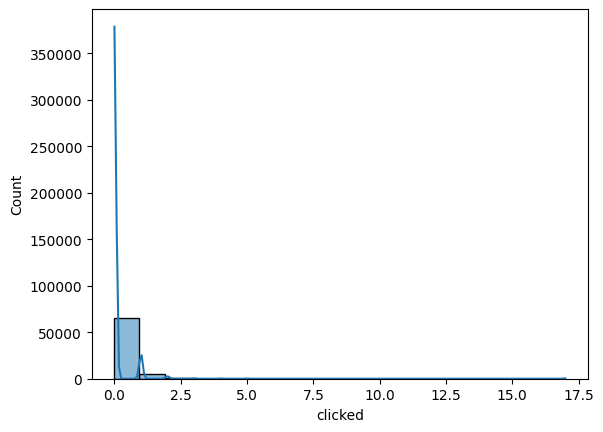

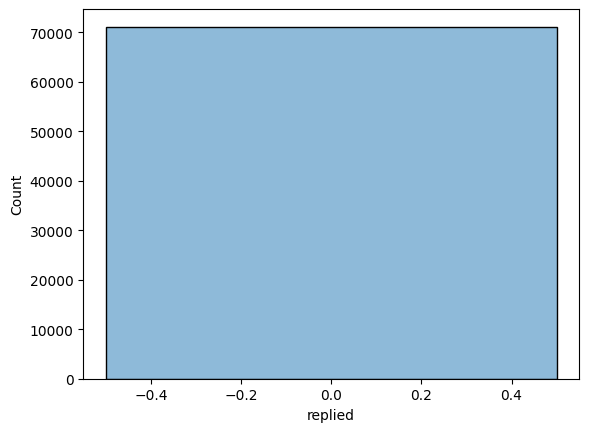

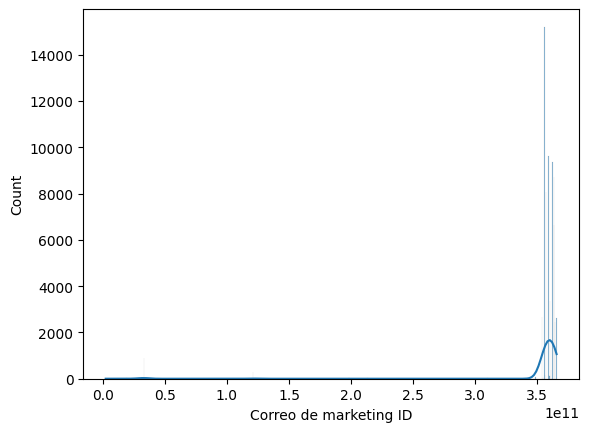

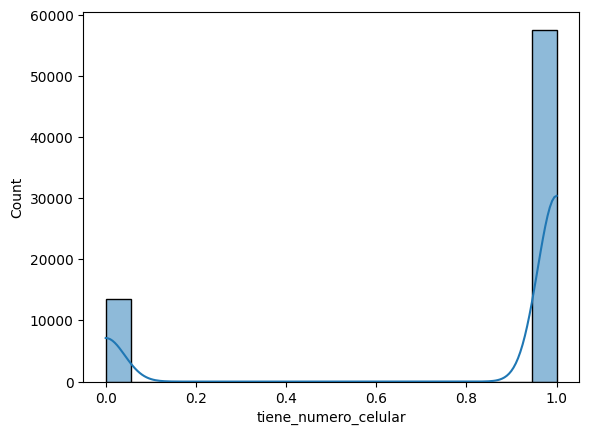

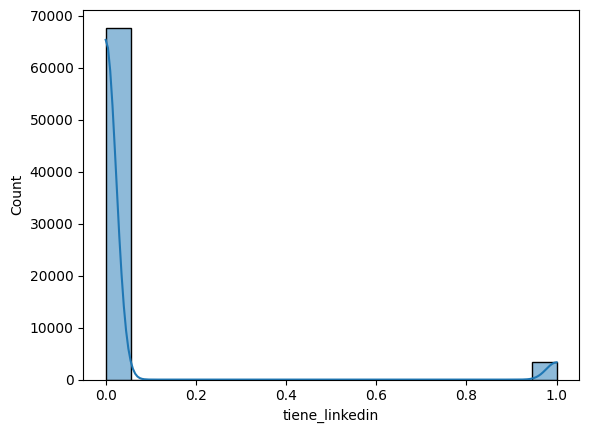

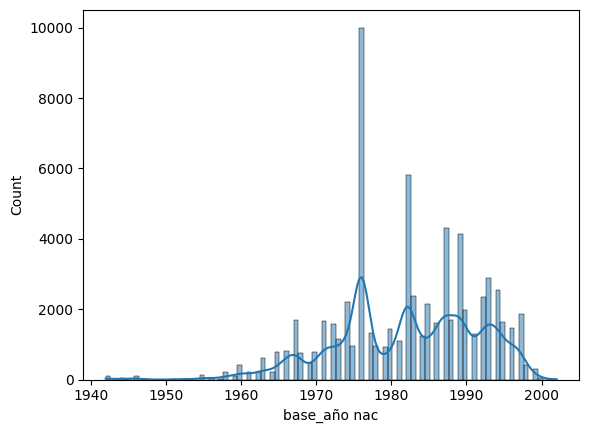

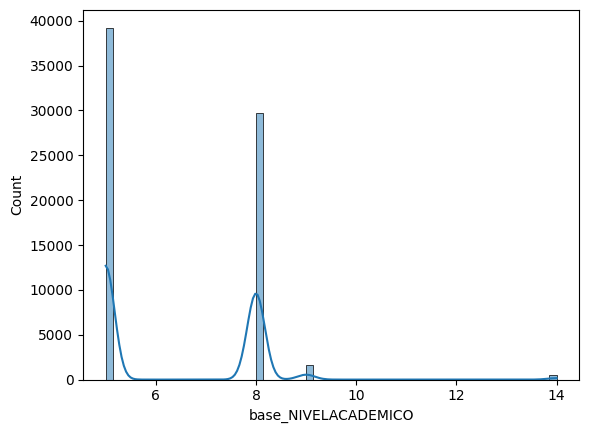

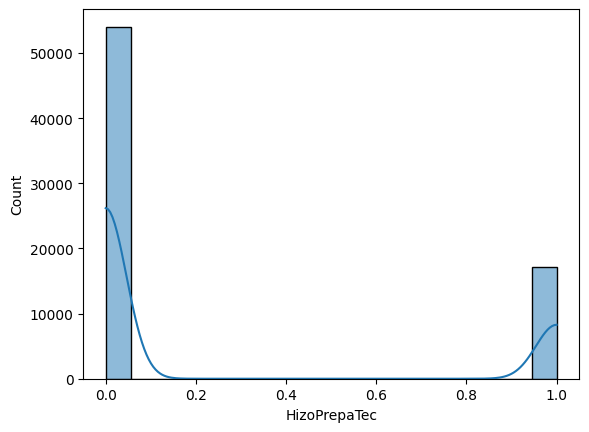

In [1145]:
#Visualizar distribuciones: histogramas para ver la distribución de cada columna.
for column in df_unido.select_dtypes(include=[np.number]).columns:
    sns.histplot(df_unido[column], kde=True)
    plt.show()


Análisis pasa saber si hay sesgos y aplicar transformaciones

In [1146]:
#Revisaremos si existen sesgos numéricos
for column in df_unido.select_dtypes(include=[np.number]).columns:
    skewness = df_unido[column].skew()
    display(f"Skewness de {column}: {skewness}")

#el valor de skewness ayudará a definir rápidamente el sesgo
#Cercano a 0: La distribución podría tomarse como simétrica.
#Mayor a 0.5: Existe un sesgo positivo (derecha).
#Menor a -0.5: Existe un sesgo negativo (izquierda).

'Skewness de IA_ID: 0.268718324748628'

'Skewness de opened: 4.770255741733907'

'Skewness de clicked: 19.155465455835888'

'Skewness de replied: 0.0'

'Skewness de Correo de marketing ID: -6.9863410460878255'

'Skewness de tiene_numero_celular: -1.5804563183257132'

'Skewness de tiene_linkedin: 4.210810239387585'

'Skewness de base_año nac: -0.4628236845346878'

'Skewness de base_NIVELACADEMICO: 0.8029764365986767'

'Skewness de HizoPrepaTec: 1.2157729176614744'

In [1147]:
from scipy.stats import skew, kurtosis

for column in df_unido.select_dtypes(include=[np.number]).columns:
    skewness = skew(df_unido[column].dropna())  # Calcular asimetría
    kurt = kurtosis(df_unido[column].dropna())  # Calcular curtosis
    display(f"Variable: {column}, Asimetría (Skewness): {skewness:.2f}, Curtosis: {kurt:.2f}")


'Variable: IA_ID, Asimetría (Skewness): 0.27, Curtosis: -1.12'

'Variable: opened, Asimetría (Skewness): 4.77, Curtosis: 42.93'

'Variable: clicked, Asimetría (Skewness): 19.16, Curtosis: 494.87'

'Variable: replied, Asimetría (Skewness): nan, Curtosis: nan'

'Variable: Correo de marketing ID, Asimetría (Skewness): -6.99, Curtosis: 47.88'

'Variable: tiene_numero_celular, Asimetría (Skewness): -1.58, Curtosis: 0.50'

'Variable: tiene_linkedin, Asimetría (Skewness): 4.21, Curtosis: 15.73'

'Variable: base_año nac, Asimetría (Skewness): -0.46, Curtosis: 0.06'

'Variable: base_NIVELACADEMICO, Asimetría (Skewness): 0.80, Curtosis: 0.95'

'Variable: HizoPrepaTec, Asimetría (Skewness): 1.22, Curtosis: -0.52'

**Análisis de resultado**

Variables con sesgo positivo significativo:
*   opened (6.95)
*   clicked (11.17)
*   Contacto ID (2.58)
*   base_NIVELACADEMICO (1.97)

**¿Qué transformación aplicar?**: transformación logarítmica o raíz cuadrada. Esto ayudará a normalizar las distribuciones


In [1148]:
#Transformación logarítmica para sesgo positivo (valores mayores a 0)
#df_unido['opened_log'] = np.log1p(df_unido['opened'])  # Log(1 + x)
#df_unido['clicked_log'] = np.log1p(df_unido['clicked'])
#df_unido['Contacto_ID_log'] = np.log1p(df_unido['Contacto ID'])
#df_unido['base_NIVELACADEMICO_log'] = np.log1p(df_unido['base_NIVELACADEMICO'])


In [1149]:
#Transformación Yeo-Johnson para sesgo negativo
#from sklearn.preprocessing import PowerTransformer

#pt = PowerTransformer(method='yeo-johnson')
#df_unido['Correo_marketing_ID_trans'] = pt.fit_transform(df_unido[['Correo de marketing ID']])
#df_unido['info_FECHA_PREMIO1_trans'] = pt.fit_transform(df_unido[['info_FECHA_PREMIO1']])
#df_unido['info_FECHA_PREMIO2_trans'] = pt.fit_transform(df_unido[['info_FECHA_PREMIO2']])
#df_unido['info_FECHA_PREMIO3_trans'] = pt.fit_transform(df_unido[['info_FECHA_PREMIO3']])
#df_unido['info_FECHA_PREMIO4_trans'] = pt.fit_transform(df_unido[['info_FECHA_PREMIO4']])

#El sesgo no se dará en las fechas por el tipo de dato


Asimetría o skewness:
* Positivo (> 1): Distribución sesgada a la derecha.
* Negativo (< -1): Distribución sesgada a la izquierda.
* Entre -1 y 1: Distribución aproximadamente simétrica.

Curtosis:
* Valor alto (>3): Distribución con colas más pesadas de lo normal (leptocúrtica).
* Valor bajo (<3): Distribución con colas más ligeras de lo normal (platicúrtica).

##**Análisis**

El análisis de la distribución de las variables numéricas utilizando las métricas de asimetría (skewness) y curtosis nos dió luz para saber que muchas de las variables en el conjunto de datos presentan distribuciones sesgadas, por lo que es necesario aplicar transformaciones no lineales en ciertos casos para mejorar la calidad del análisis y la efectividad de los futuros modelos predictivos. A continuación se presenta un resumen de los hallazgos:

**Análisis de la asimetría- skewness**

Asimetría positiva: La mayoría de las variables presentan un alto grado de asimetría positiva (valores superiores a 1), lo cual indica que las distribuciones están sesgadas hacia la derecha, con pocos valores extremos en el lado superior:
* opened: Asimetría de 6.95.
* clicked: Asimetría de 11.18.

**Análisis de la curtosis**
La curtosis permite identificar la presencia de colas largas o pesadas en la distribución.
Una curtosis muy alta (> 3) indica que la variable tiene colas más pesadas de lo normal (leptocúrtica), mientras que una curtosis baja (< 3) indica colas más ligeras (platicúrtica).

Variables con curtosis alta:
* opened: Curtosis de 100.19.
* clicked: Curtosis de 276.56.

Estas variables tienen distribuciones con valores extremos que se desvían significativamente de la media, lo que puede afectar el desempeño de los modelos de aprendizaje automático.


**Conclusión**
La mayoría de las variables numéricas presentan distribuciones altamente sesgadas y con curtosis elevada. Aplicaremos transformaciones no lineales como el logaritmo y Box-Cox antes de proceder con la fase de modelado.
Estas transformaciones ayudarán a estabilizar la varianza, reducir la asimetría y mejorar la capacidad de los algoritmos para detectar patrones en el conjunto de datos.

# **Pregunta 6: ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo)**


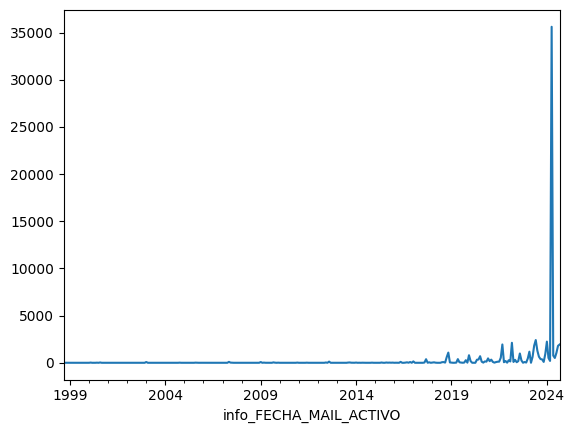

In [1150]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['base_FECHAGRADUACION'] = pd.to_datetime(df_unido['base_FECHAGRADUACION'], format='%d/%m/%Y', errors='coerce')
#Visualizar tendencias temporales usando gráficos de líneas para ver tendencias a lo largo del tiempo.
df_unido.set_index('info_FECHA_MAIL_ACTIVO').resample('M').count()['IA_ID'].plot() # Select the 'IA_ID' column after resampling and count to plot the trend
plt.show()


In [1151]:
df_unido[df_unido['info_FECHA_MAIL_ACTIVO'] > '2024-12-01']

Empty DataFrame
Columns: [IA_ID, rol, categoria_dominio_correo, opened, clicked, replied, Correo de marketing ID, Campaña ID, info_ESTADO_RESIDENCIA, info_PAIS_RESIDENCIA, info_FECHA_MAIL_ACTIVO, info_POBLACION_ACTIVO, info_MUNICIPIO_ACTIVO, info_ESTADO_ACTIVO, info_PAIS_ACTIVO, info_FECHA_ACTIVO, info_FECHA_ACTIVO_NUM_CELULAR, info_ESTADOCIVIL, tiene_numero_celular, tiene_linkedin, base_SEXO, base_año nac, base_NACIONALIDAD, base_ESTADONACIMIENTO, base_exatec personalizado, base_ESTADO_RESIDENCIA, base_PAIS_RESIDENCIA, base_AñoGrad, base_Tipo Escuela, base_SIGLASDELPROGRAMA, base_NIVELACADEMICO, base_IDCAMPUS, base_campusoperación, base_NOMBREEMPRESA, base_GIROEMPRESA, base_TIPOEMPRESA, base_AREAORGANIZACIONAL, base_PUESTO, base_ESTATUSEMPLEO, base_CDEMPRESA, base_EDOEMPRESA, base_PAISEMPRESA, base_Interesadocompartirtemas, HizoPrepaTec, suscrito_FechaRegistro, giveaway_fecha, evento_EventName, evento_Campus, evento_Category, evento_CheckedIn, evento_attendeeStatus]
Index: []

[0 rows x 51 columns]

**Preprocesamiento:**

Identificamos que en la columna 'info_FECHA_MAIL_ACTIVO' de la gráfica existían valores con fechas posteriores a la actual. Por ello, realizamos una limpieza para eliminar las incongruencias y establecer esos valores como nulos.

In [1152]:
#df_unido2 = df_unido
df_unido.loc[df_unido['info_FECHA_MAIL_ACTIVO'] > '2024-10-01', 'info_FECHA_MAIL_ACTIVO'] = pd.NaT


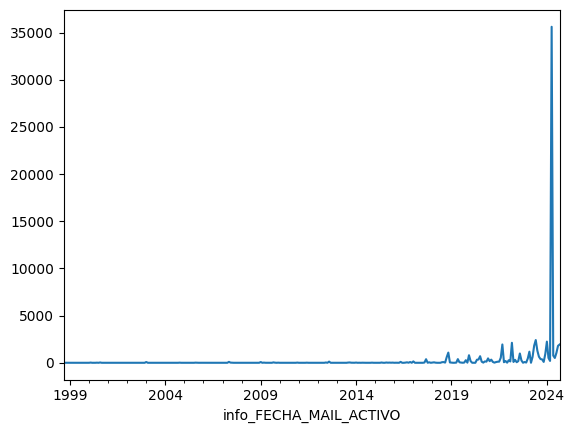

In [1153]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['base_FECHAGRADUACION'] = pd.to_datetime(df_unido['base_FECHAGRADUACION'], format='%d/%m/%Y', errors='coerce')
#Visualizar tendencias temporales usando gráficos de líneas para ver tendencias a lo largo del tiempo.
df_unido.set_index('info_FECHA_MAIL_ACTIVO').resample('M').count()['IA_ID'].plot() # Select the 'IA_ID' column after resampling and count to plot the trend
plt.show()


<Axes: xlabel='info_FECHA_ACTIVO'>

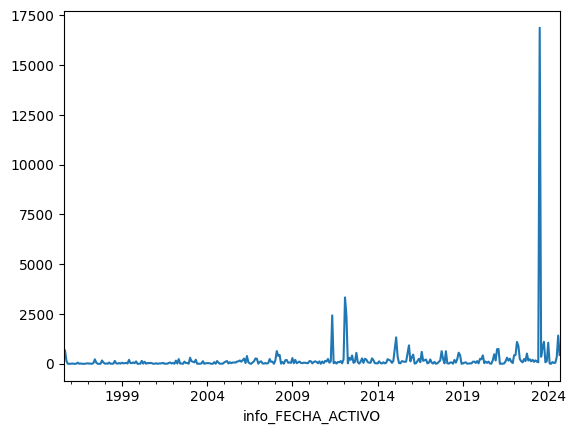

In [1154]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['base_AñoGrad'] = pd.to_datetime(df_unido['base_AñoGrad'],format='%Y', errors='coerce')
#Visualizar tendencias temporales usando gráficos de líneas para ver tendencias a lo largo del tiempo.
df_unido.set_index('info_FECHA_ACTIVO').resample('M').count()['IA_ID'].plot() # Select the 'IA_ID' column after resampling and count to plot the trend
#plt.show()

<Axes: xlabel='info_FECHA_ACTIVO_NUM_CELULAR'>

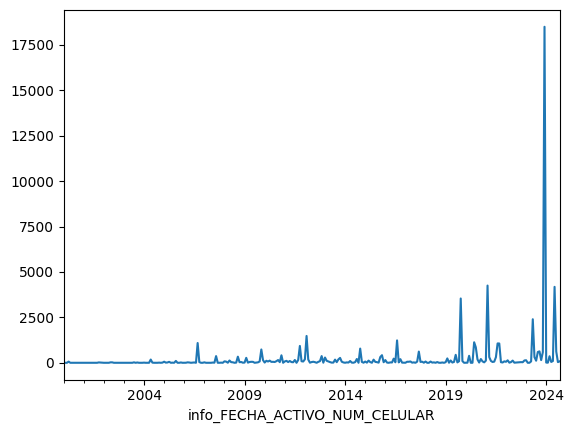

In [1155]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['base_AñoGrad'] = pd.to_datetime(df_unido['base_AñoGrad'], errors='coerce')
#Visualizar tendencias temporales usando gráficos de líneas para ver tendencias a lo largo del tiempo.
df_unido.set_index('info_FECHA_ACTIVO_NUM_CELULAR').resample('M').count()['IA_ID'].plot() # Select the 'IA_ID' column after resampling and count to plot the trend
#plt.show()

<Axes: xlabel='suscrito_FechaRegistro'>

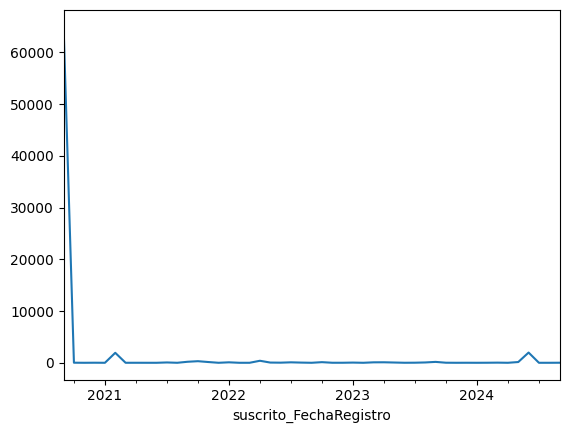

In [1156]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['base_AñoGrad'] = pd.to_datetime(df_unido['base_AñoGrad'], errors='coerce')
#Visualizar tendencias temporales usando gráficos de líneas para ver tendencias a lo largo del tiempo.
df_unido.set_index('suscrito_FechaRegistro').resample('M').count()['IA_ID'].plot() # Select the 'IA_ID' column after resampling and count to plot the trend
#plt.show()

**Análisis**

Las gráficas nos permitieron identificar valores atípicos, como en el caso de la columna 'info_FECHA_MAIL_ACTIVO', donde realizamos la limpieza de datos correspondiente. Además, verificamos la coherencia de los gráficos con la definición de cada columna, y los picos de actividad coinciden con las campañas que ha llevado a cabo el área de egresados.

#Generar catálogo de variables y su definición

# **Pregunta 7: ¿Hay correlación entre las variables dependientes e independientes?**

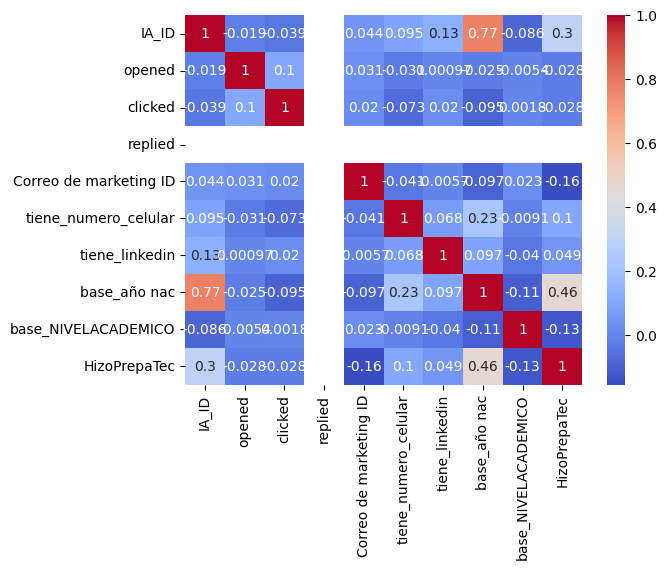

In [1157]:
#Matriz de correlación
corr_matrix = df_unido.select_dtypes(include=np.number).corr() # Select only numerical columns for correlation calculation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [1158]:
df_unido['replied']

0        0
1        0
2        0
3        0
4        0
        ..
71132    0
71133    0
71134    0
71135    0
71136    0
Name: replied, Length: 71137, dtype: int64

**Análisis**

**IA_ID y HizoPrepaTec:** Tienen una correlación positiva moderada de 0.28, lo que sugiere que, en cierta medida, los usuarios con este ID pueden estar relacionados con haber hecho Prepa Tec.

**Clicked y Opened: **La correlación entre estas variables es de 0.15, lo que indica que existe una leve tendencia de que los usuarios que abren el correo tienden a hacer clic en él, aunque no es una relación particularmente fuerte.

**Correo de Marketing ID y base_NIVELACADEMICO:** La correlación es baja, alrededor de 0.049, lo que indica que prácticamente no hay relación entre estas dos variables.

**Ciclo Numerico y tiene_numero_celular: **Presentan una correlación de 0.17, lo cual es una relación positiva leve.
Un ejemplo claro es que en el ciclo anterior se hizo la campaña de actualización de datos por ello estas variables tienen una relación.


**Variables con baja correlación:**

La mayoría de las variables tienen correlaciones cercanas a 0, lo que sugiere que no tienen una relación lineal clara. Esto incluye variables como:

**IA_ID y opened: **Correlación muy baja (-0.006), lo que indica que no hay relación entre el ID y si se abrió el correo.

**Tiene_numero_celular y tiene_linkedin:** Presentan una correlación casi nula (0.035), lo que implica que tener un número de celular no está relacionado con tener un perfil en LinkedIn.


**Preprocesamiento**

 Observamos que la variable replied parece no tener correlación con ninguna otra variable, lo que probablemente indica falta de datos o que no se registraron suficientes respuestas como para establecer una relación. Por esta razón hemos obtado por eliminar la variable.

 Lo anterior es congruente, ya que al analizar la columna, observamos que mide el número de respuestas, y los correos fueron enviados desde una cuenta 'Noreply', lo que explica la ausencia de respuestas. Por ello, tomamos la decisión de eliminar la columna 'Replied' del DataFrame.




In [1159]:
# Encontrar las columnas categóricas (de tipo 'object')
categorical_columns = df_unido.select_dtypes(include=['object']).columns

# Mostrar las columnas categóricas
display("Columnas categóricas en df_unido:")
for col in categorical_columns:
    display(col)

'Columnas categóricas en df_unido:'

'rol'

'categoria_dominio_correo'

'Campaña ID'

'info_ESTADO_RESIDENCIA'

'info_PAIS_RESIDENCIA'

'info_POBLACION_ACTIVO'

'info_MUNICIPIO_ACTIVO'

'info_ESTADO_ACTIVO'

'info_PAIS_ACTIVO'

'info_ESTADOCIVIL'

'base_SEXO'

'base_NACIONALIDAD'

'base_ESTADONACIMIENTO'

'base_exatec personalizado'

'base_ESTADO_RESIDENCIA'

'base_PAIS_RESIDENCIA'

'base_AñoGrad'

'base_Tipo Escuela'

'base_SIGLASDELPROGRAMA'

'base_IDCAMPUS'

'base_campusoperación'

'base_NOMBREEMPRESA'

'base_GIROEMPRESA'

'base_TIPOEMPRESA'

'base_AREAORGANIZACIONAL'

'base_PUESTO'

'base_ESTATUSEMPLEO'

'base_CDEMPRESA'

'base_EDOEMPRESA'

'base_PAISEMPRESA'

'base_Interesadocompartirtemas'

'evento_EventName'

'evento_Campus'

'evento_Category'

'evento_attendeeStatus'

In [1160]:
#Eliminación de variables
columnas_a_eliminar = ['replied']
df_unido = df_unido.drop(columns=columnas_a_eliminar)

# Forzar la recolección de basura
gc.collect()

82941

# **Pregunta 8: ¿Cómo se distribuyen los datos en función de diferentes categorías?**

IA_ID     rol categoria_dominio_correo  opened  clicked  \
0   3102  Exatec                 Genérico       1        1   
1   3102  Exatec                 Genérico       1        1   
2   3112  Exatec                 Genérico       1        0   
3   3112  Exatec                 Genérico       1        0   
4   3112  Exatec                 Genérico       1        0   

   Correo de marketing ID   Campaña ID info_ESTADO_RESIDENCIA  \
0            3.622020e+11  10949903422                    NaN   
1            3.622020e+11  10949903422                    NaN   
2            3.633040e+11  10949903422       Estado de México   
3            3.633040e+11  10949903422       Estado de México   
4            3.633040e+11  10949903422       Estado de México   

  info_PAIS_RESIDENCIA info_FECHA_MAIL_ACTIVO  ... base_PAISEMPRESA  \
0                  NaN                    NaT  ...              NaN   
1                  NaN                    NaT  ...              NaN   
2               Mexico             2017-09-22  ...           México   
3               Mexico             2017-09-22  ...           México   
4               Mexico             2017-09-22  ...           México   

  base_Interesadocompartirtemas HizoPrepaTec suscrito_FechaRegistro  \
0                                          0    2024-06-07 17:23:00   
1                                          0    2024-06-07 17:23:00   
2                                          0    2020-09-10 14:25:00   
3                                          0    2020-09-10 14:25:00   
4                                          0    2020-09-10 14:25:00   

       giveaway_fecha                                evento_EventName  \
0 2024-09-25 22:18:00  Regreso a Casa | 50, 55, 60 y más aniversarios   
1 2024-09-25 22:18:00  Regreso a Casa | 50, 55, 60 y más aniversarios   
2 2024-09-25 22:18:00                   Regreso a Casa Monterrey 2024   
3 2024-09-25 22:18:00                   Regreso a Casa Monterrey 2024   
4 2024-09-25 22:18:00                   Regreso a Casa Monterrey 2024   

          evento_Campus             evento_Category  evento_CheckedIn  \
0  TEC Campus Monterrey  Egresados - Regreso a Casa             False   
1  TEC Campus Monterrey  Egresados - Regreso a Casa             False   
2  TEC Campus Monterrey  Egresados - Regreso a Casa             False   
3  TEC Campus Monterrey  Egresados - Regreso a Casa             False   
4  TEC Campus Monterrey  Egresados - Regreso a Casa             False   

  evento_attendeeStatus  
0            Registered  
1            Registered  
2              Accepted  
3              Accepted  
4              Accepted  

[5 rows x 50 columns]

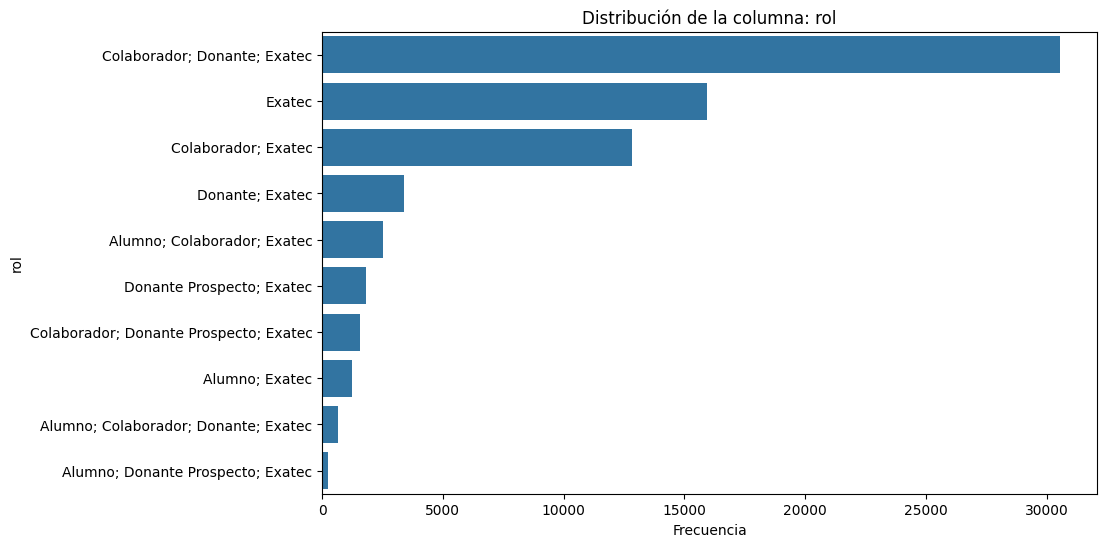

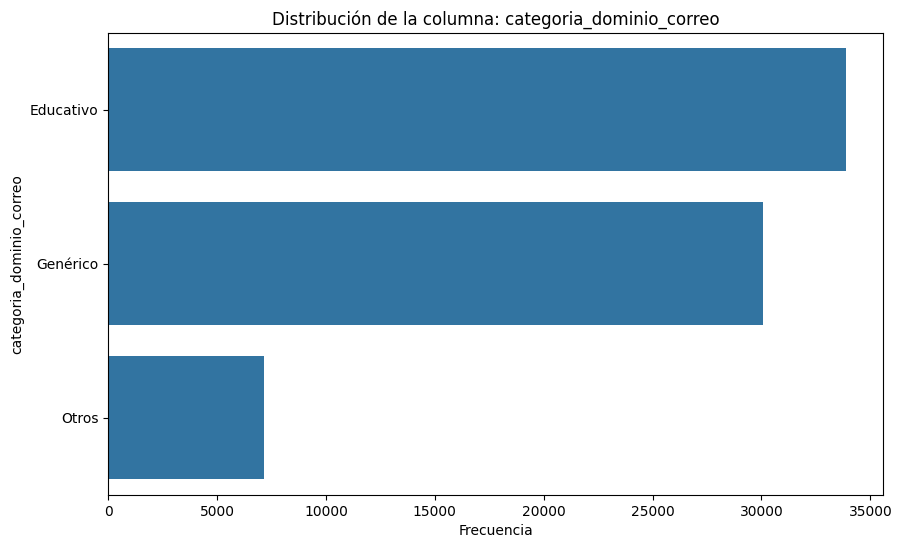

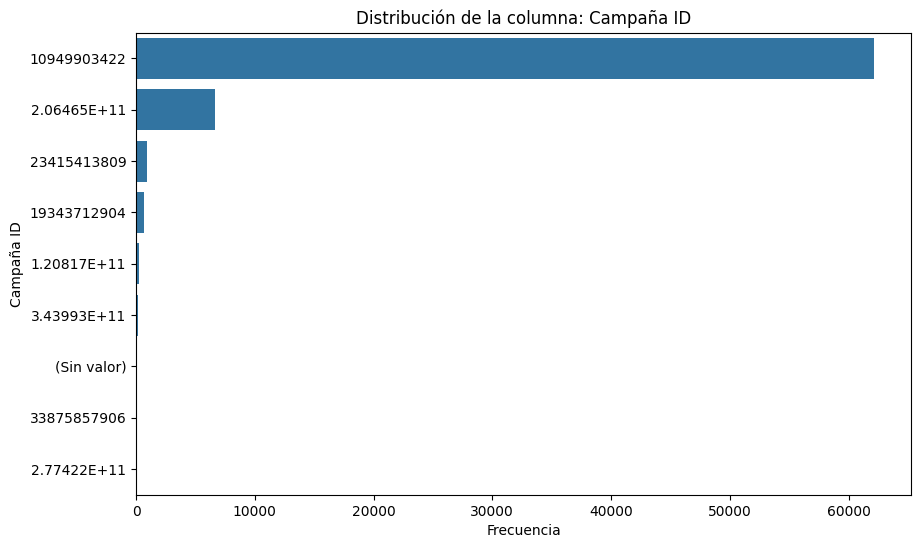

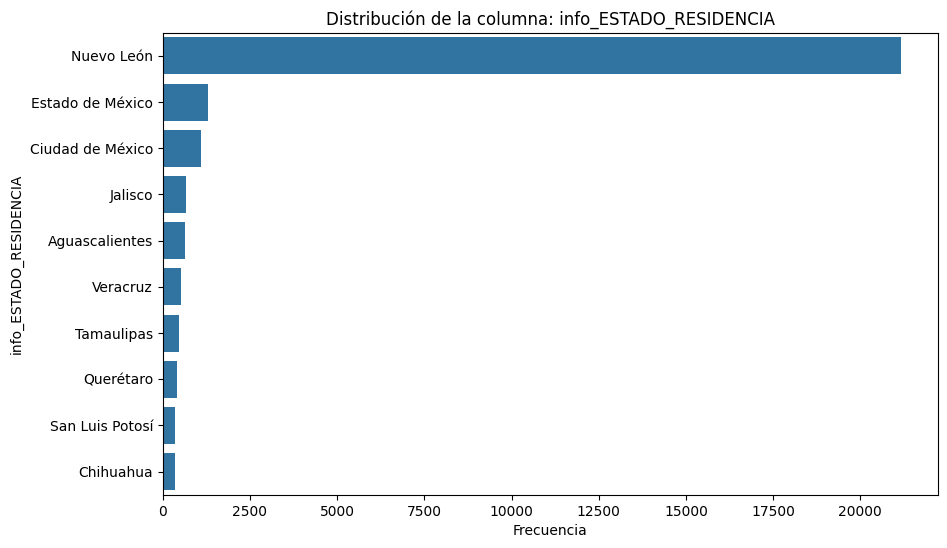

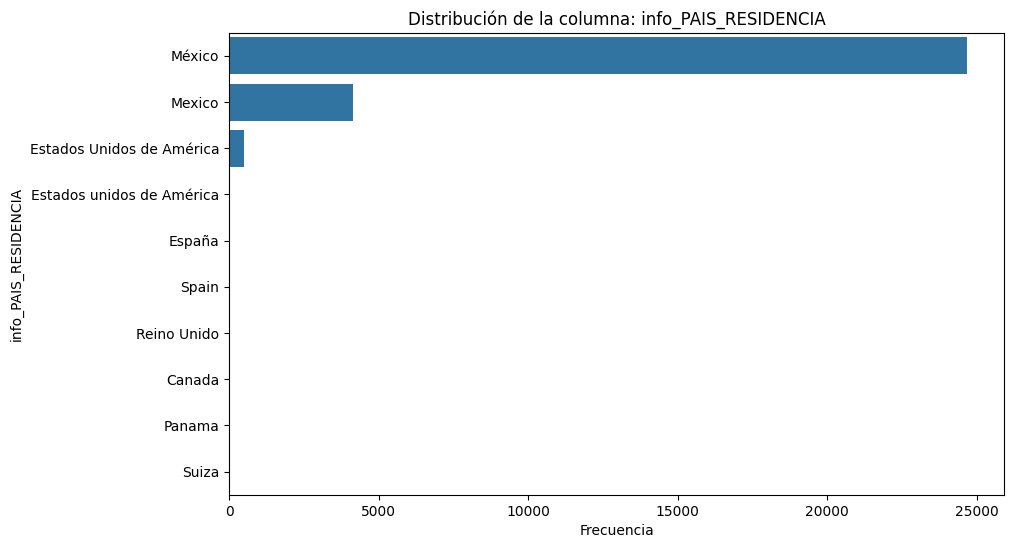

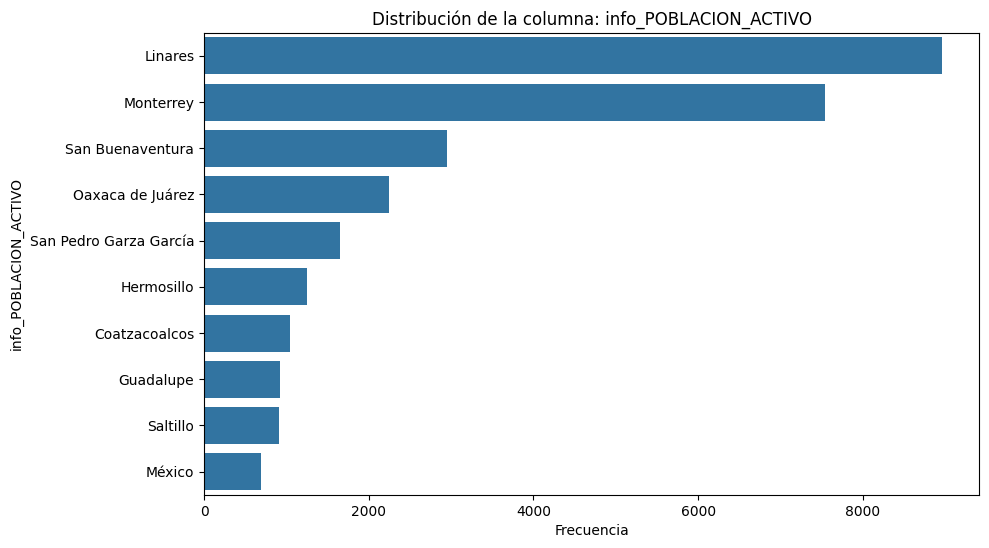

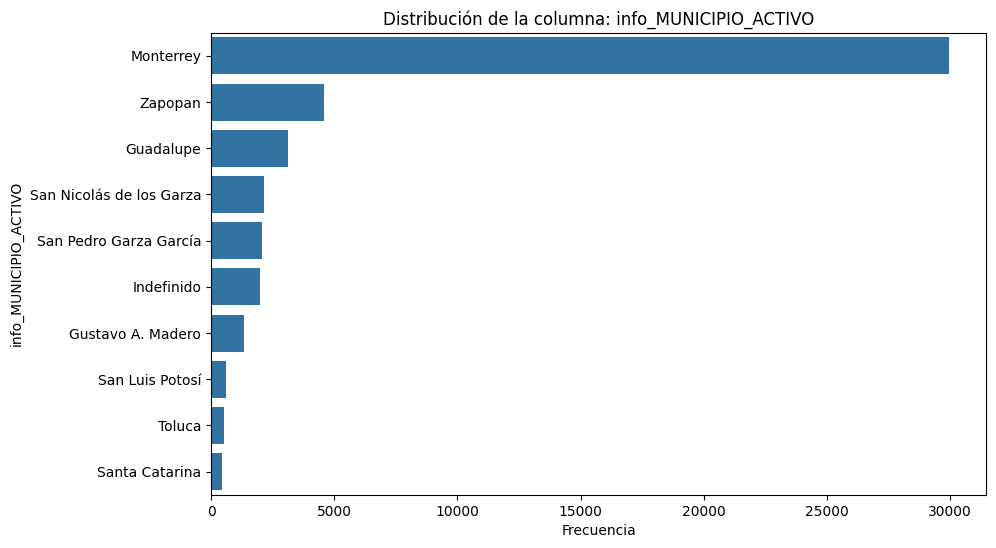

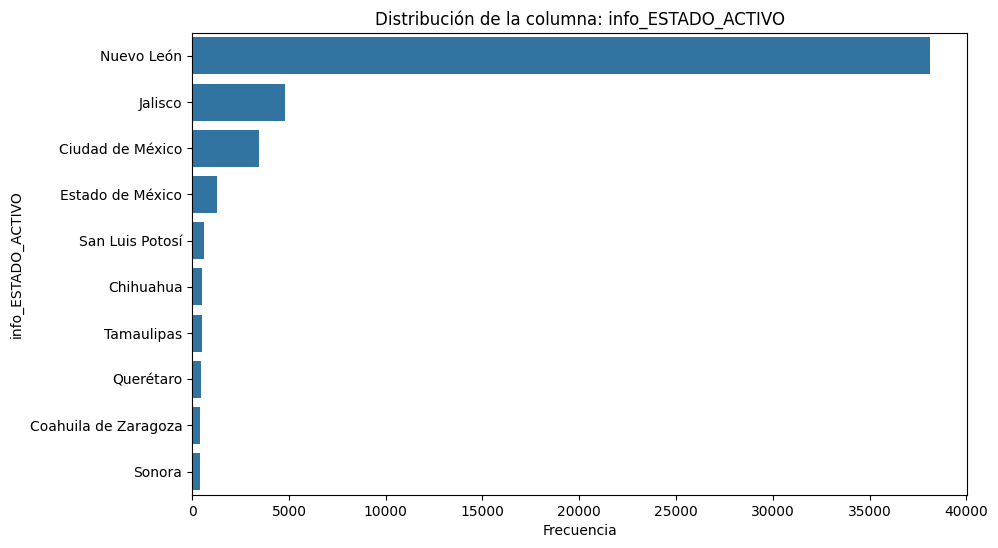

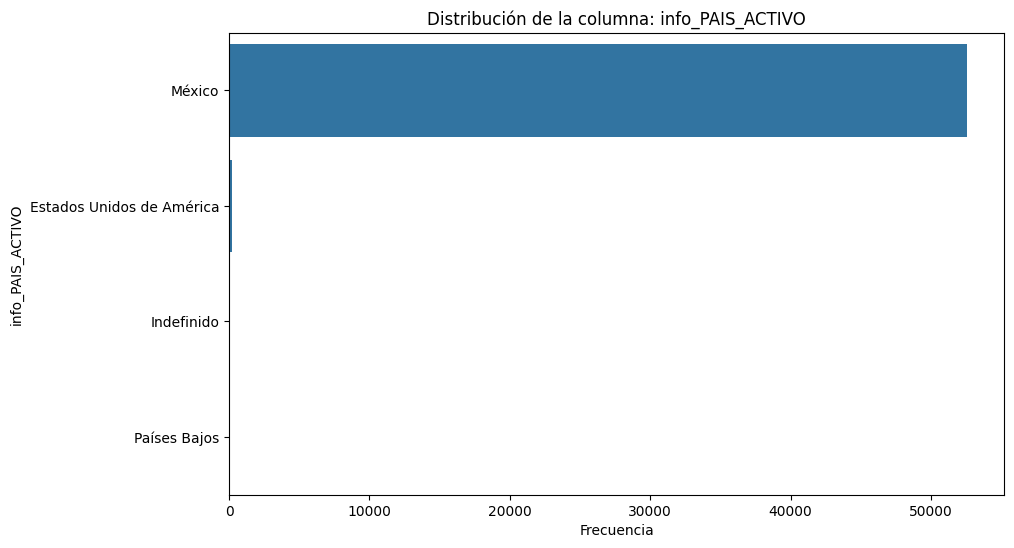

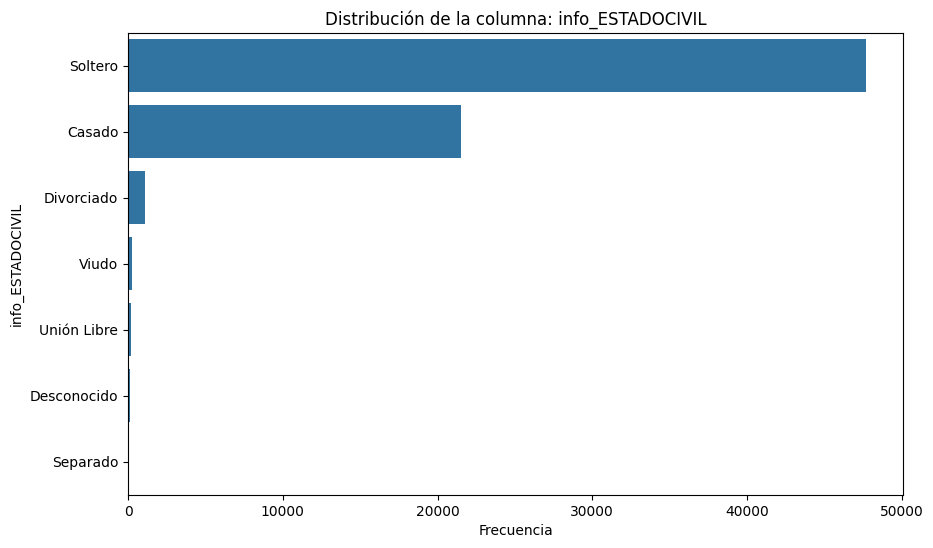

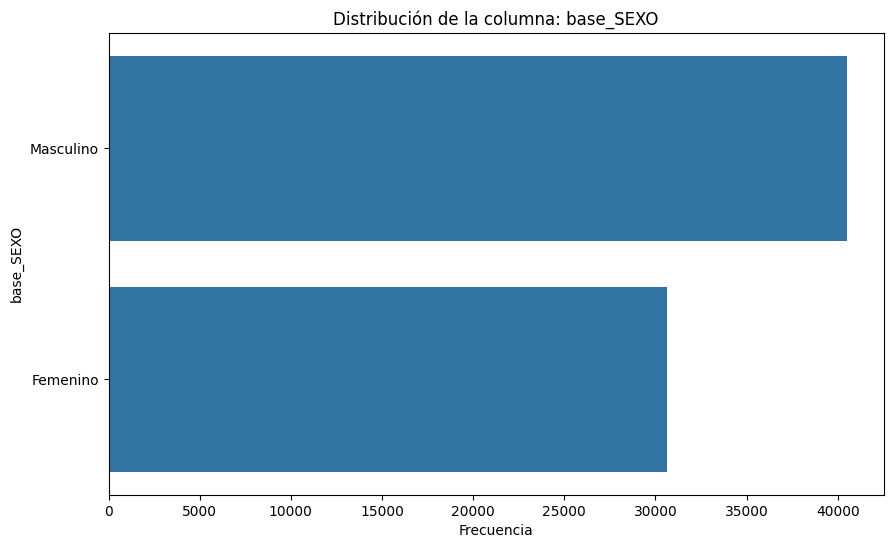

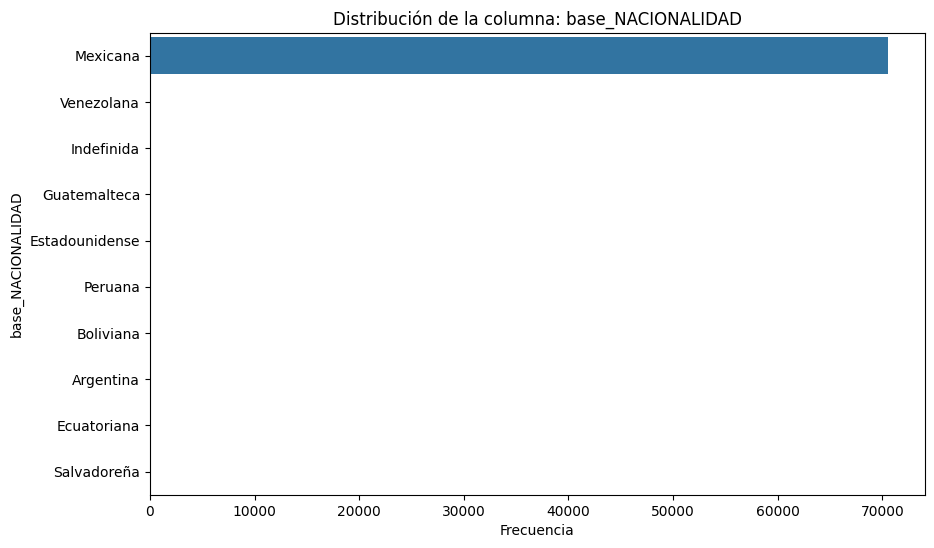

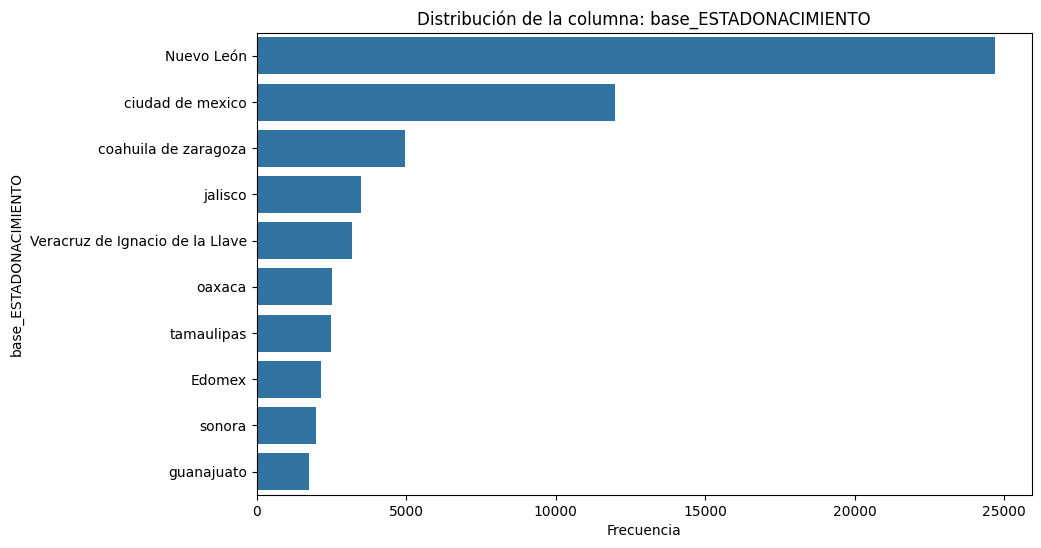

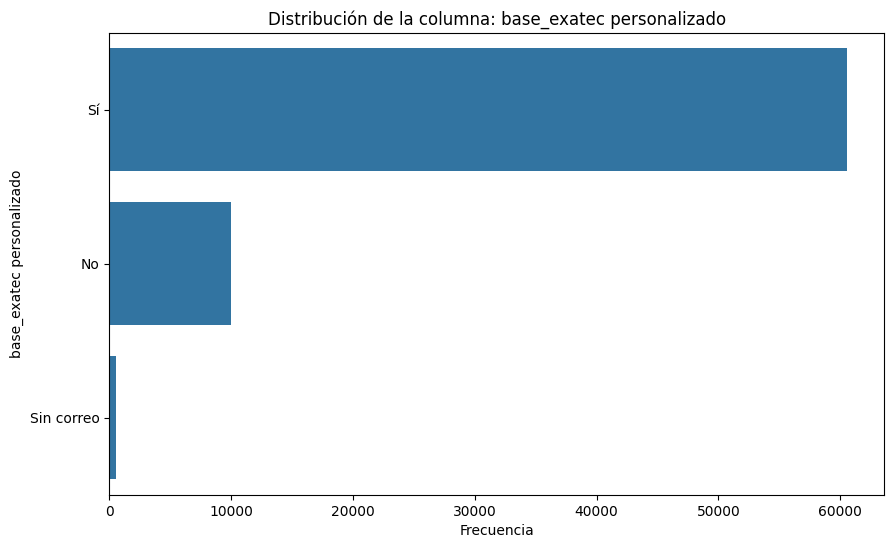

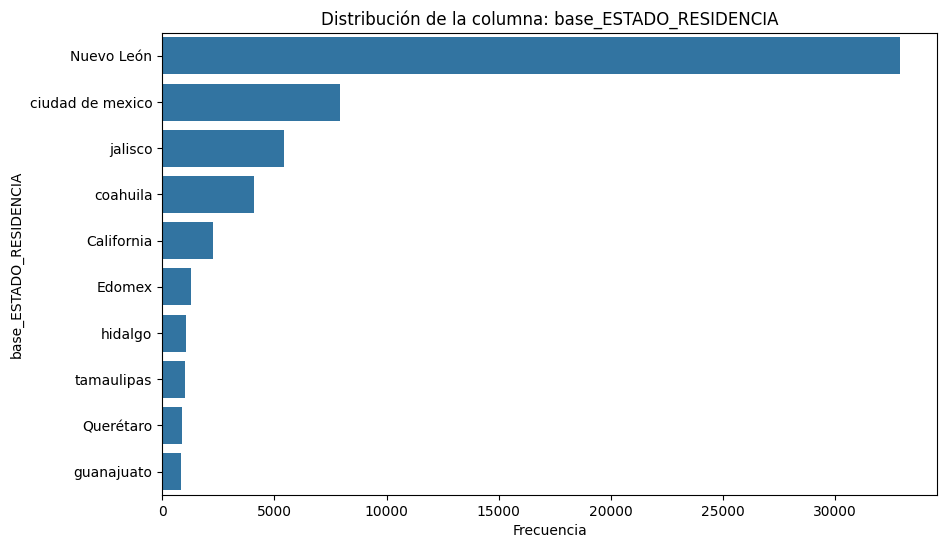

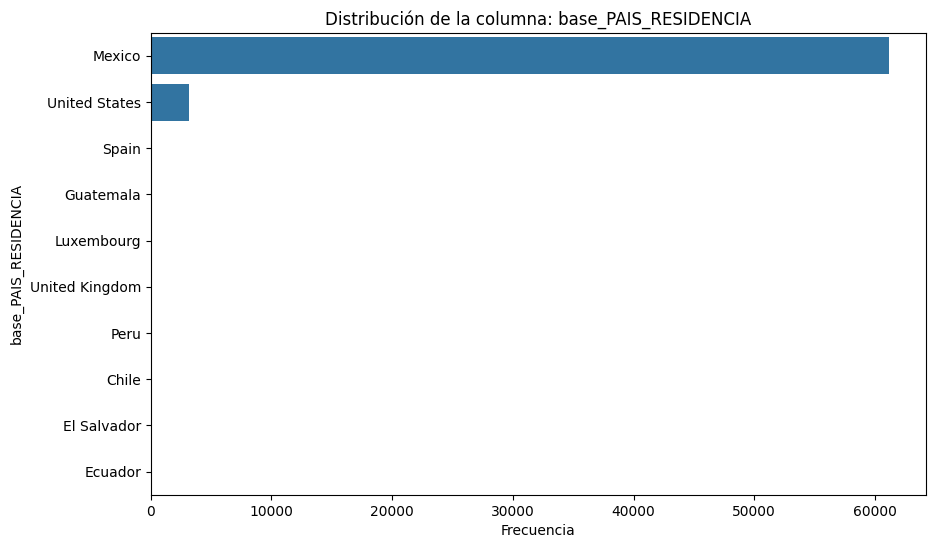

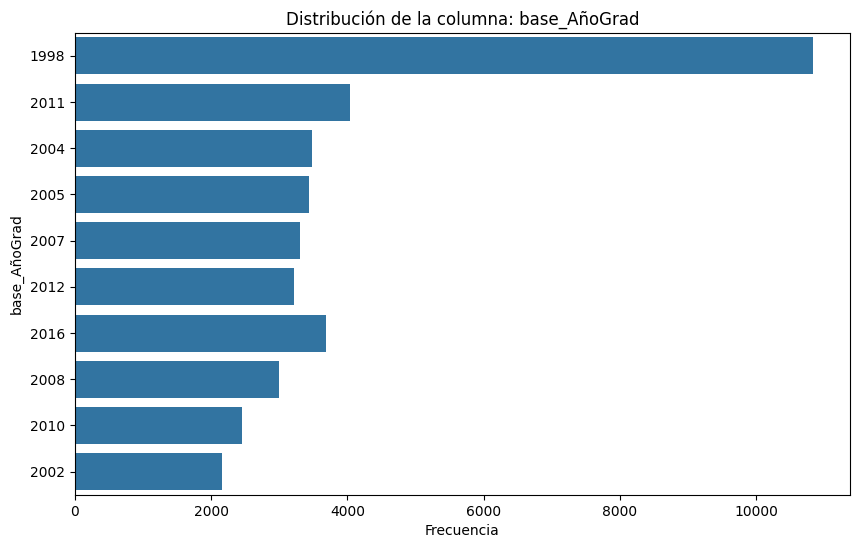

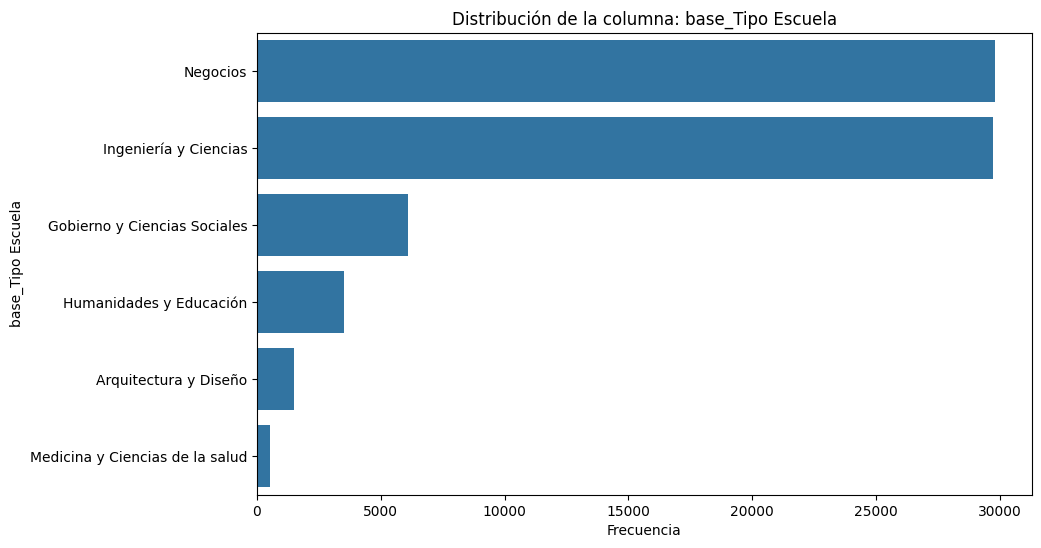

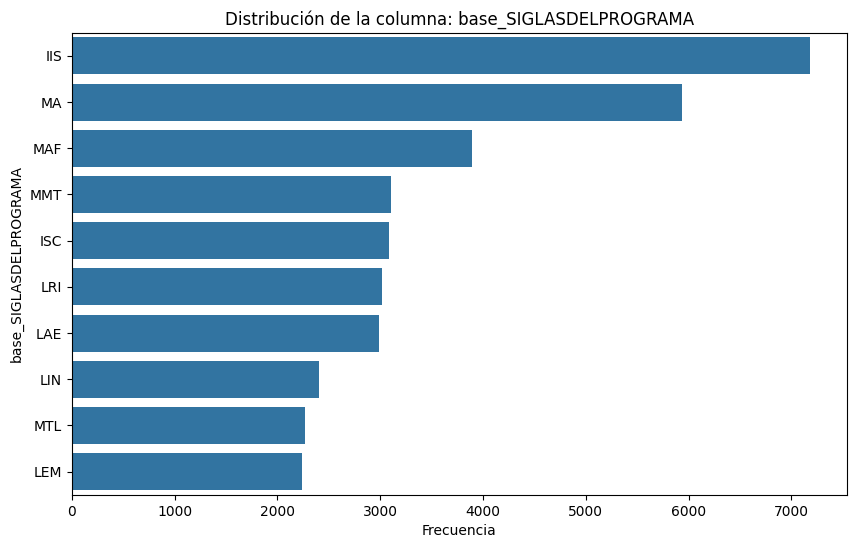

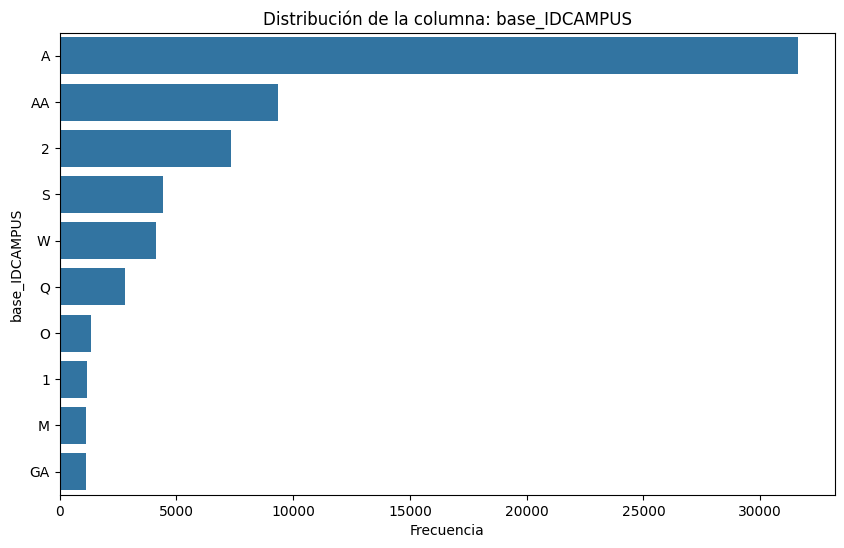

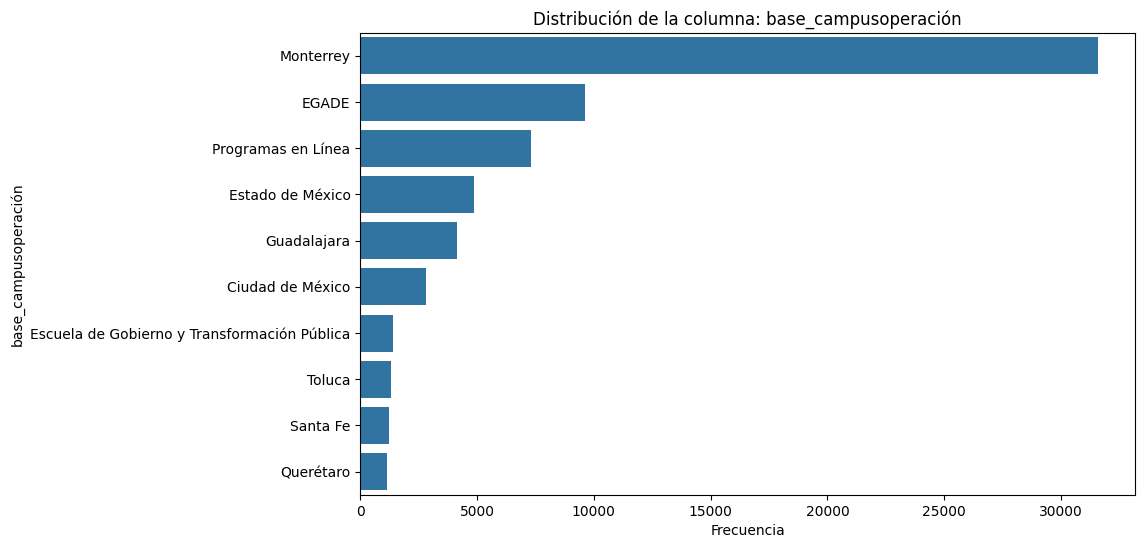

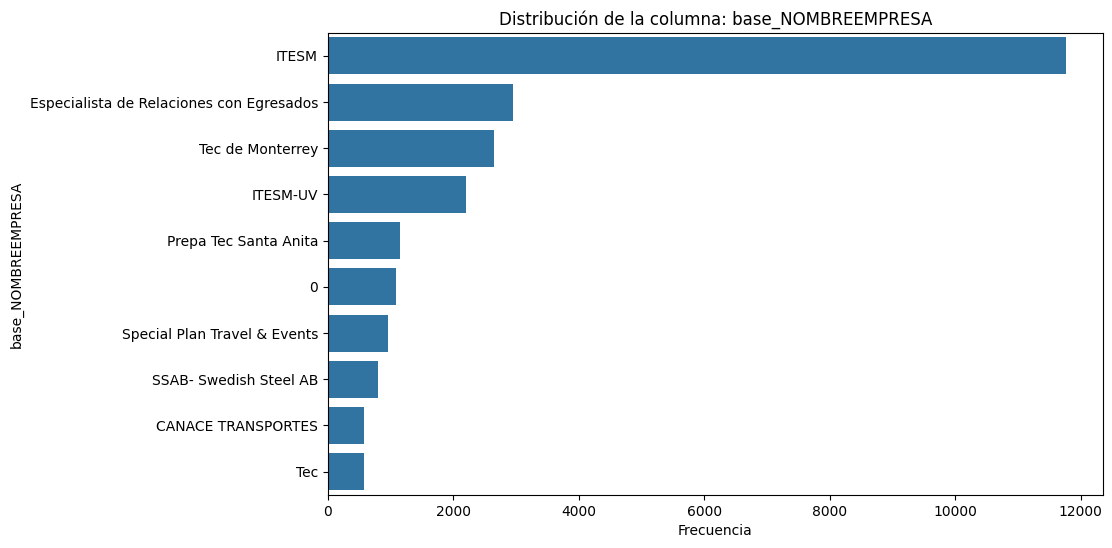

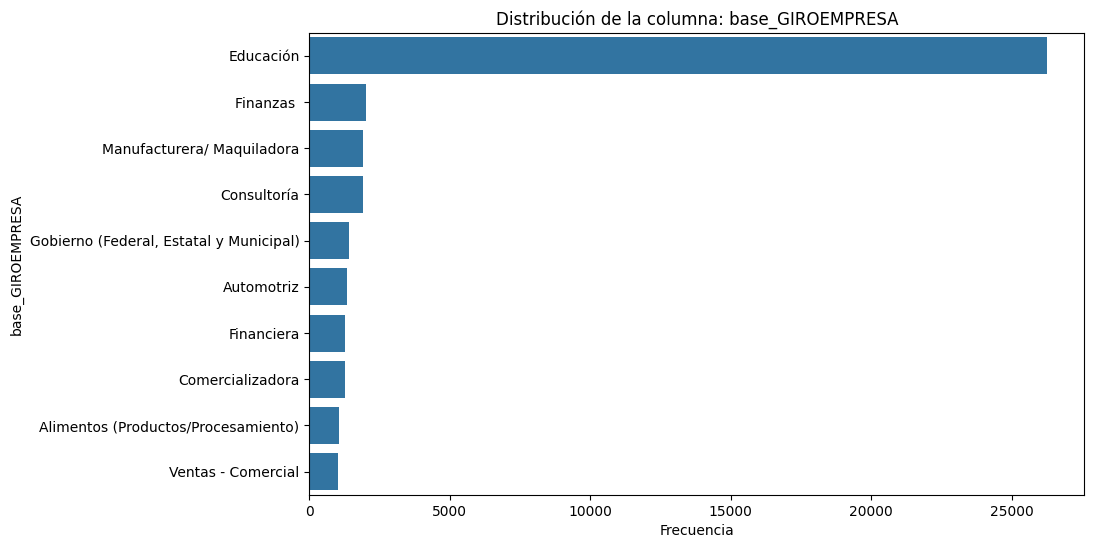

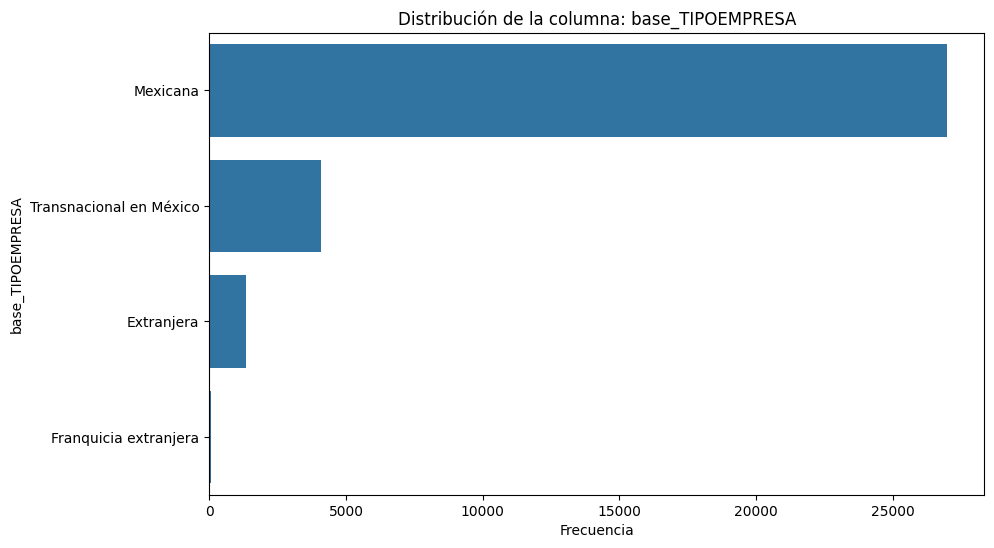

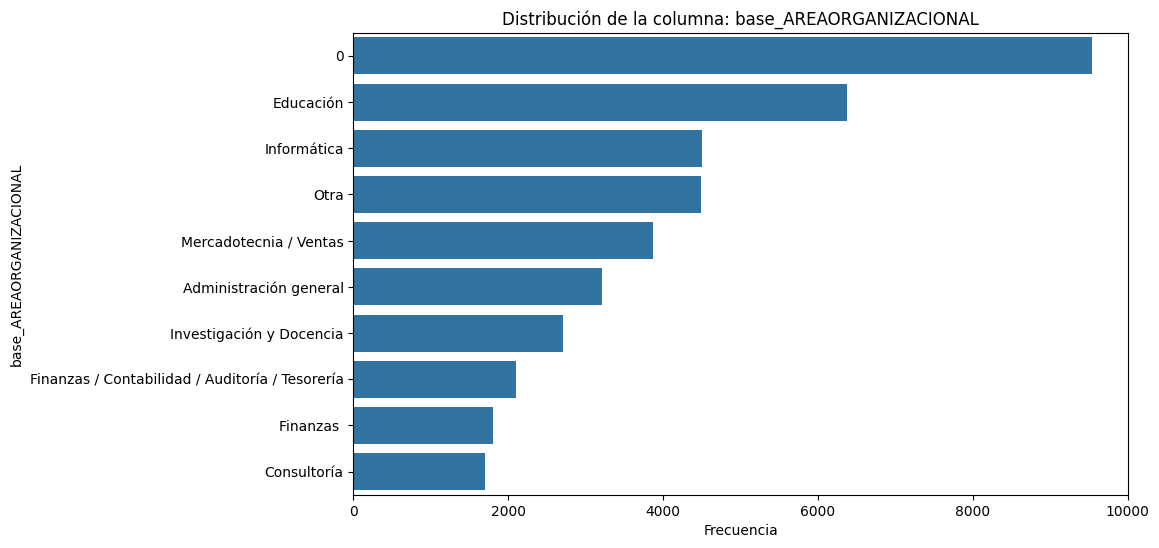

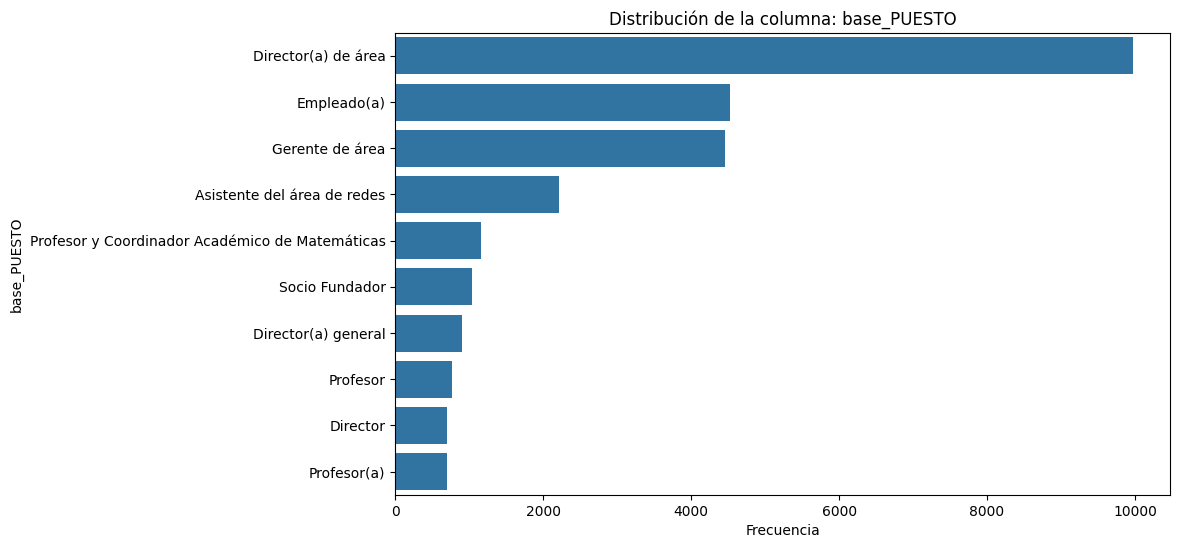

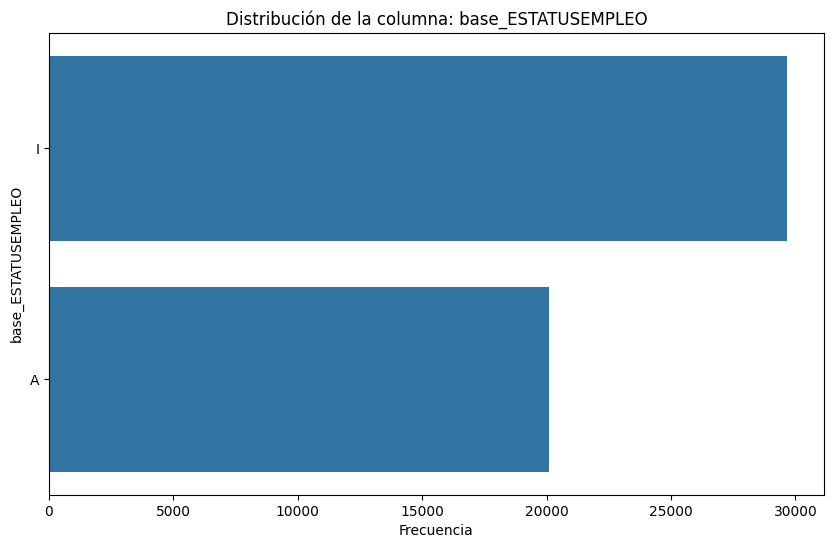

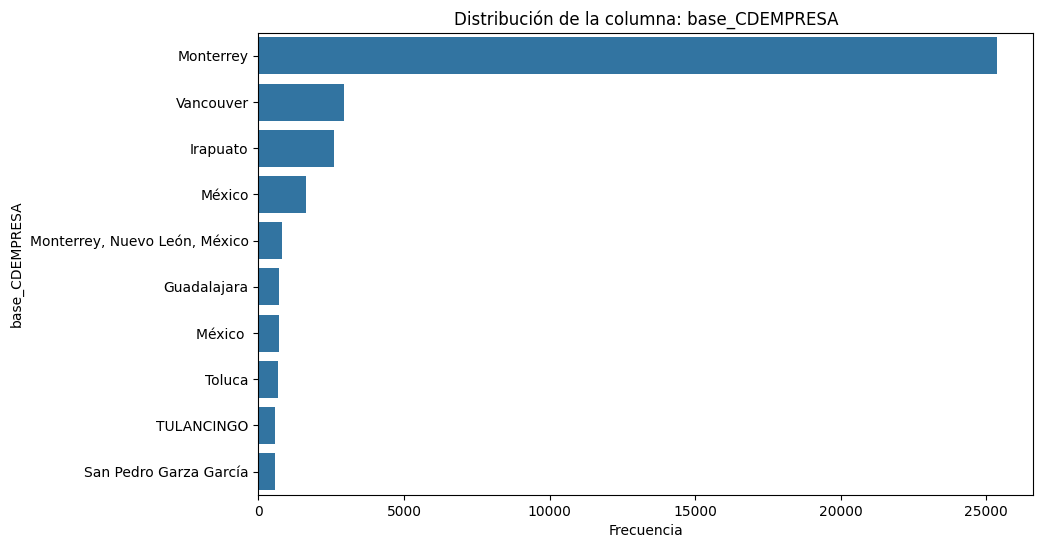

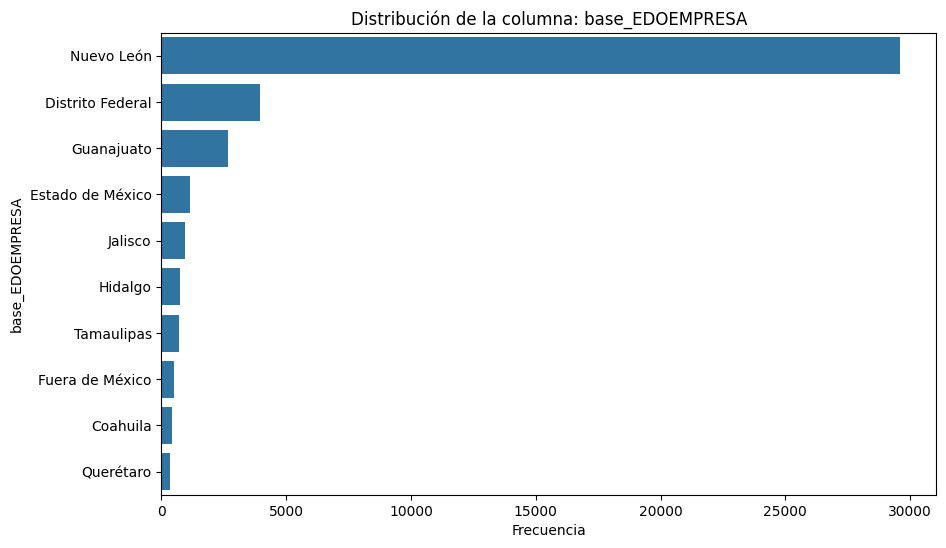

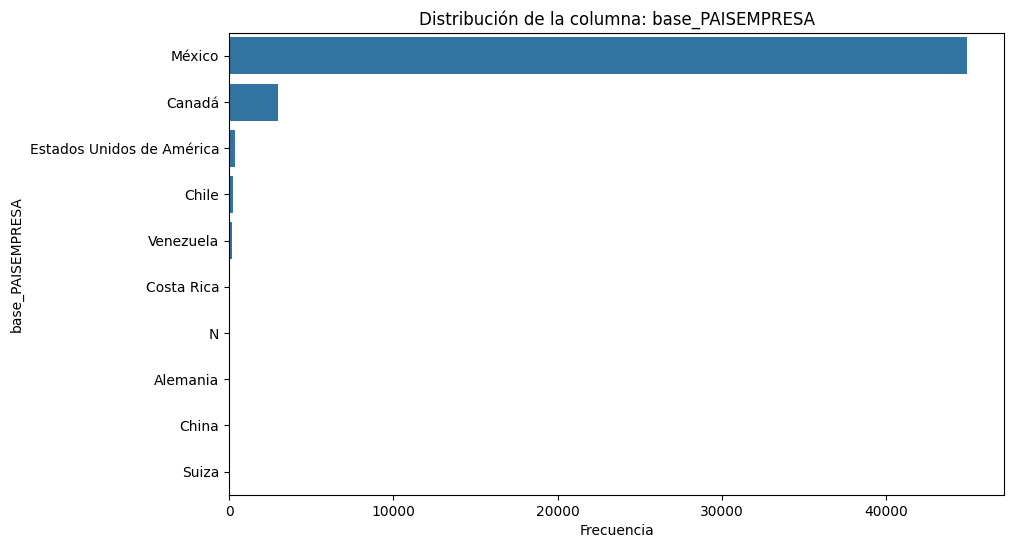

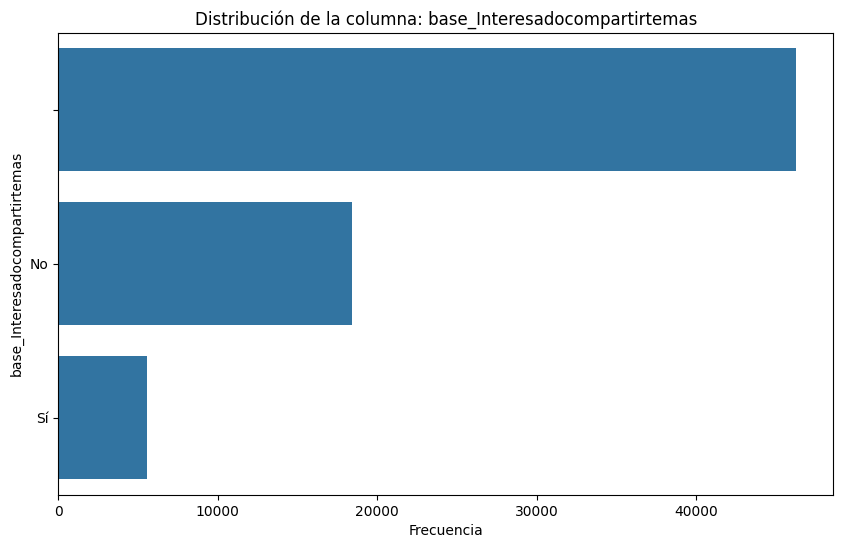

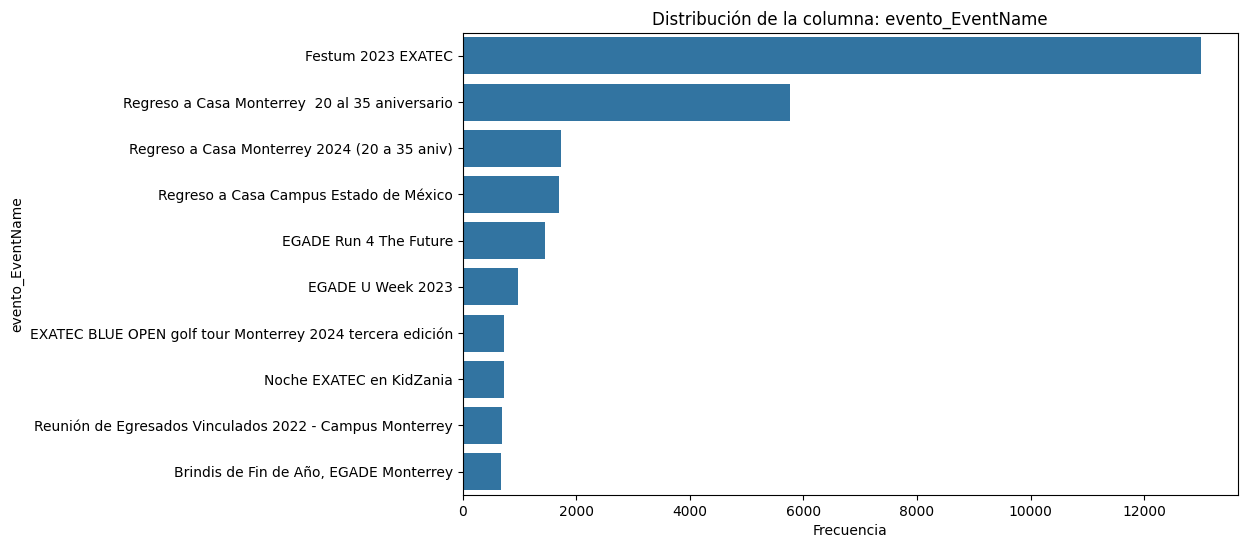

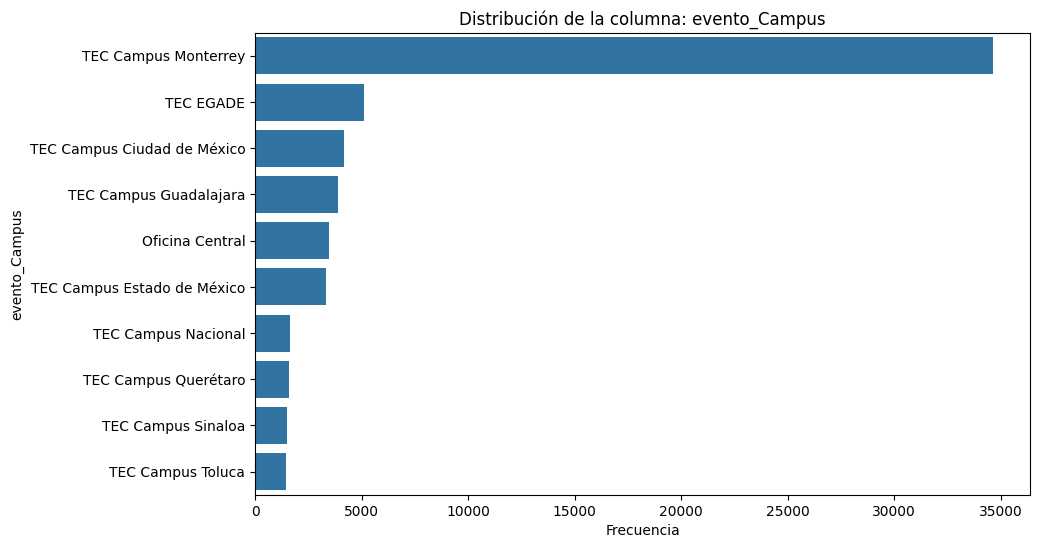

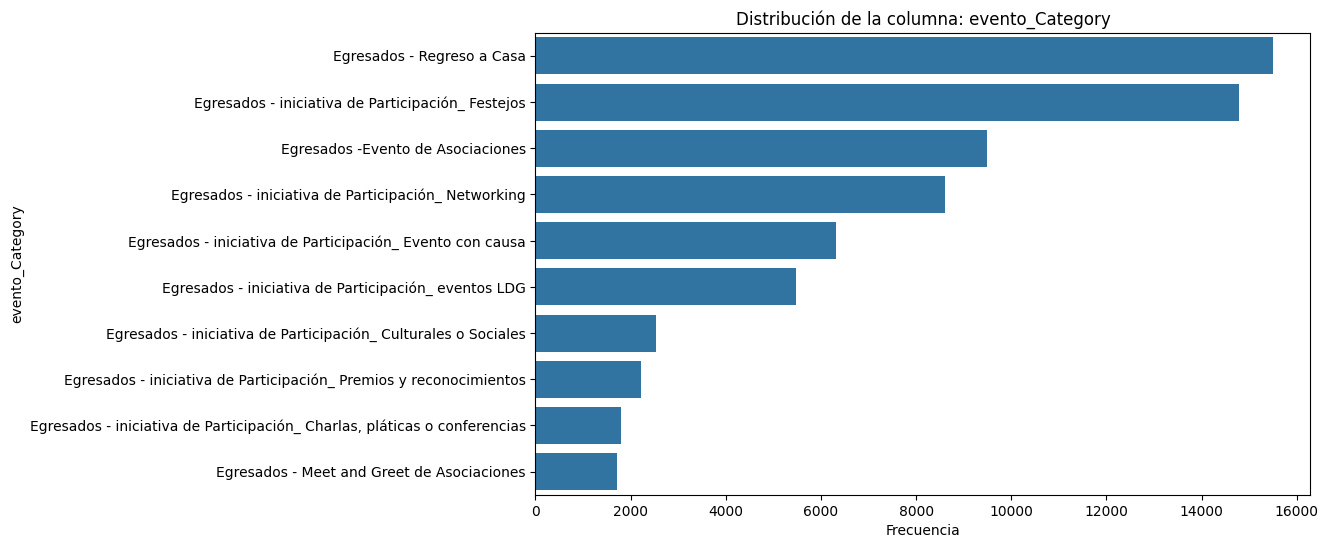

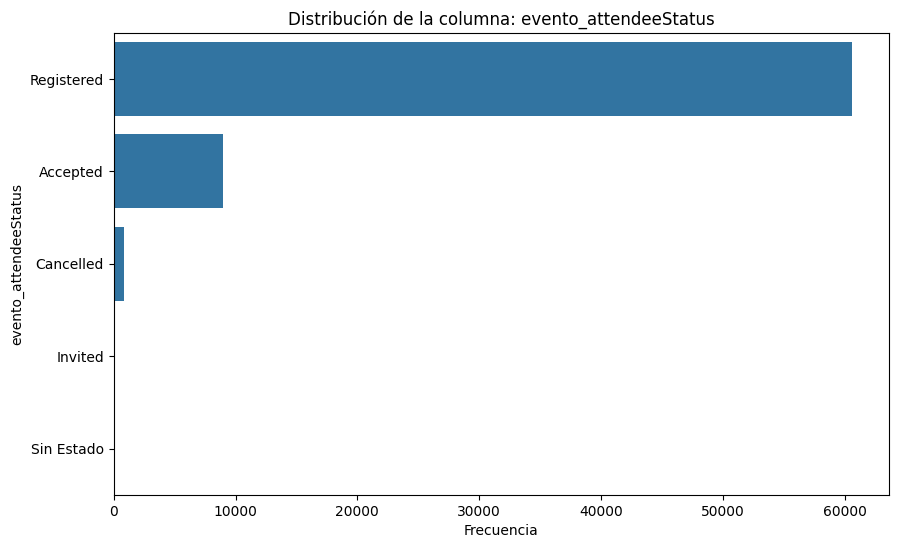

"Distribución de la columna 'rol':"

rol
Colaborador; Donante; Exatec                                    30561
Exatec                                                          15914
Colaborador; Exatec                                             12827
Donante; Exatec                                                  3370
Alumno; Colaborador; Exatec                                      2528
Donante Prospecto; Exatec                                        1822
Colaborador; Donante Prospecto; Exatec                           1582
Alumno; Exatec                                                   1246
Alumno; Colaborador; Donante; Exatec                              664
Alumno; Donante Prospecto; Exatec                                 228
Colaborador; Donante; Exatec; Líder OSF                           108
Alumno; Donante; Exatec                                            81
Consejero; Donante; Exatec                                         59
Colaborador; Consejero; Donante; Exatec                            48
Consejero; Donante Prospecto; Exatec                               33
Exatec; Prospecto                                                  32
Colaborador; Exatec; Prospecto                                     12
Colaborador; Donante; Exatec; Ex Consejero; Líder de Campaña       10
Colaborador; Donante; Exatec; Prospecto                             8
Consejero; Exatec                                                   4
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'categoria_dominio_correo':"

categoria_dominio_correo
Educativo    33894
Genérico     30082
Otros         7161
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'Campaña ID':"

Campaña ID
10949903422    62157
2.06465E+11     6628
23415413809      948
19343712904      710
1.20817E+11      273
3.43993E+11      142
(Sin valor)      111
33875857906      109
2.77422E+11       59
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'info_ESTADO_RESIDENCIA':"

info_ESTADO_RESIDENCIA
Nuevo León              21162
Estado de México         1292
Ciudad de México         1093
Jalisco                   656
Aguascalientes            638
Veracruz                  536
Tamaulipas                468
Querétaro                 413
San Luis Potosí           358
Chihuahua                 352
Hidalgo                   304
Puebla                    224
Coahuila                  222
Michoacán de Ocampo       208
Sonora                    177
Morelos                   155
Yucatán                   125
Oaxaca                     76
Guanajuato                 74
Sinaloa                    73
Texas                      73
Arizona                    72
Coahuila de Zaragoza       56
Quintana Roo               44
Madrid                     36
Michoacán                  36
Baja California            26
California                 24
Colima                     24
Inglaterra                 20
Nayarit                    12
Zacatecas                  10
Baja California Sur         8
Chiapas                     8
Durango                     8
Cataluña                    3
New York                    2
Campeche                    2
District of Columbia        2
Ginebra                     2
North Carolina              1
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'info_PAIS_RESIDENCIA':"

info_PAIS_RESIDENCIA
México                       24679
Mexico                        4161
Estados Unidos de América      494
Estados unidos de América       40
España                          39
Spain                           20
Reino Unido                     20
Canada                           4
Panama                           3
Suiza                            2
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'info_POBLACION_ACTIVO':"

info_POBLACION_ACTIVO
Linares                   8964
Monterrey                 7544
San Buenaventura          2952
Oaxaca de Juárez          2242
San Pedro Garza García    1647
                          ... 
Ciudad Madero                2
Tijuana                      2
Nueva Rosita                 2
Gustavo A. Madero            1
Tegucigalpa                  1
Name: count, Length: 115, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'info_MUNICIPIO_ACTIVO':"

info_MUNICIPIO_ACTIVO
Monterrey                   29954
Zapopan                      4577
Guadalupe                    3133
San Nicolás de los Garza     2130
San Pedro Garza García       2066
                            ...  
Ecatepec de Morelos             2
Piedras Negras                  2
Tlalpan                         1
Navolato                        1
Tlajomulco de Zúñiga            1
Name: count, Length: 98, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'info_ESTADO_ACTIVO':"

info_ESTADO_ACTIVO
Nuevo León              38136
Jalisco                  4814
Ciudad de México         3443
Estado de México         1298
San Luis Potosí           606
Chihuahua                 503
Tamaulipas                501
Querétaro                 476
Coahuila de Zaragoza      429
Sonora                    393
Puebla                    308
Michoacán de Ocampo       297
Veracruz                  296
Florida                   240
Sinaloa                   204
Guanajuato                165
Aguascalientes            116
Chiapas                   116
Yucatán                    92
Hidalgo                    86
Morelos                    73
Zacatecas                  57
Indefinido                 48
Baja California            42
Quintana Roo               40
Oaxaca                     36
Nayarit                    28
Durango                    18
Colima                      7
Zuid-Holland                7
Tabasco                     2
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'info_PAIS_ACTIVO':"

info_PAIS_ACTIVO
México                       52582
Estados Unidos de América      240
Indefinido                      48
Países Bajos                     7
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'info_ESTADOCIVIL':"

info_ESTADOCIVIL
Soltero        47701
Casado         21536
Divorciado      1101
Viudo            244
Unión Libre      160
Desconocido      107
Separado          70
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_SEXO':"

base_SEXO
Masculino    40489
Femenino     30648
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_NACIONALIDAD':"

base_NACIONALIDAD
Mexicana          70544
Venezolana          114
Indefinida          105
Guatemalteca         99
Estadounidense       83
Peruana              44
Boliviana            42
Argentina            40
Ecuatoriana          24
Salvadoreña          14
Indefinido            8
Hondureña             6
Colombiana            6
Italiana              4
Costarricense         3
Dominicana            1
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_ESTADONACIMIENTO':"

base_ESTADONACIMIENTO
Nuevo León                         24684
ciudad de mexico                   11973
coahuila de zaragoza                4978
jalisco                             3502
Veracruz de Ignacio de la Llave     3205
oaxaca                              2528
tamaulipas                          2488
Edomex                              2141
sonora                              2002
guanajuato                          1764
sinaloa                             1557
michoacan de ocampo                 1292
nayarit                             1125
chihuahua                           1111
hidalgo                             1011
San Luis Potosí                      733
durango                              628
chiapas                              520
guerrero                             511
puebla                               456
aguascalientes                       275
morelos                              265
Querétaro                            252
Baja California Sur                  236
zacatecas                            235
indefinido                           216
tlaxcala                             182
tabasco                              160
Yucatán                              142
Baja California                      141
quintana roo                         109
Guatemala                             99
miranda                               90
colima                                69
California                            69
campeche                              60
Lima                                  44
Buenos Aires                          40
Cochabamba                            34
Florida                               32
moscu                                 28
bolivar                               24
santander                             20
canar                                 18
la paz                                16
El Salvador                           14
                                      10
la habana                             10
bogota d.c.                            6
guayas                                 6
francisco morazan                      6
santa cruz de la sierra                4
Texas                                  4
sicily                                 4
Distrito Nacional                      4
Ontario                                4
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_exatec personalizado':"

base_exatec personalizado
Sí            60588
No             9967
Sin correo      582
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_ESTADO_RESIDENCIA':"

base_ESTADO_RESIDENCIA
Nuevo León                         32895
ciudad de mexico                    7944
jalisco                             5427
coahuila                            4107
California                          2244
Edomex                              1282
hidalgo                             1050
tamaulipas                          1032
Querétaro                            868
guanajuato                           854
Indefinido                           819
chihuahua                            758
San Luis Potosí                      721
sonora                               629
Arizona                              552
                                     482
Michoacán                            430
Veracruz de Ignacio de la Llave      388
morelos                              372
puebla                               359
chiapas                              340
sinaloa                              329
durango                              262
aguascalientes                       242
Florida                              240
Yucatán                              224
guerrero                             189
oaxaca                                98
tlaxcala                              96
quintana roo                          88
Texas                                 88
Cataluña                              54
campeche                              51
Baja California                       50
Guatemala                             42
zacatecas                             41
Lima                                  32
indefinido                            26
inglaterra                            20
michoacan de ocampo                   19
El Salvador                           10
azuay                                  9
Santiago                               6
New York                               4
Ontario                                4
nayarit                                4
managua                                4
North Carolina                         3
maryland                               2
santa cruz de la sierra                2
tabasco                                2
francisco morazan                      1
baden-wurttemberg                      1
Distrito Nacional                      1
Zurich                                 1
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_PAIS_RESIDENCIA':"

base_PAIS_RESIDENCIA
Mexico                61151
United States          3133
Spain                    54
Guatemala                42
Luxembourg               40
United Kingdom           36
Peru                     32
Chile                    31
El Salvador              10
Ecuador                   9
Netherlands               7
Nicaragua                 4
Switzerland               4
Canada                    4
Bolivia                   2
Germany                   1
Honduras                  1
Dominican Republic        1
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_AñoGrad':"

base_AñoGrad
1998    10836
2011     4037
2004     3482
2005     3433
2007     3306
        ...  
1973       14
1975        6
2011        6
1972        3
1967        2
Name: count, Length: 68, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_Tipo Escuela':"

base_Tipo Escuela
Negocios                           29799
Ingeniería y Ciencias              29711
Gobierno y Ciencias Sociales        6086
Humanidades y Educación             3500
Arquitectura y Diseño               1493
Medicina y Ciencias de la salud      548
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_SIGLASDELPROGRAMA':"

base_SIGLASDELPROGRAMA
IIS    7181
MA     5935
MAF    3892
MMT    3105
ISC    3083
       ... 
MCS       2
MBG       2
DIT       2
MSI       2
MD        2
Name: count, Length: 180, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_IDCAMPUS':"

base_IDCAMPUS
A      31607
AA      9354
2       7316
S       4439
W       4124
Q       2807
O       1335
1       1174
M       1141
GA      1114
H        782
         723
PUE      693
N        562
T        492
Z        457
8        440
E        423
A1       283
G1       267
G        254
Y        248
K        214
L        185
J        156
D        154
F        119
R         70
C         46
I         36
U         34
P         30
X         28
GS        18
GQ        12
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_campusoperación':"

base_campusoperación
Monterrey                                       31604
EGADE                                            9637
Programas en Línea                               7316
Estado de México                                 4879
Guadalajara                                      4128
Ciudad de México                                 2807
Escuela de Gobierno y Transformación Pública     1417
Toluca                                           1335
Santa Fe                                         1213
Querétaro                                        1141
Tampico                                           782
Puebla                                            693
San Luis Potosí                                   562
Cuernavaca                                        492
Sonora Norte                                      457
Morelia                                           440
Chihuahua                                         423
Saltillo                                          254
Sinaloa                                           248
Aguascalientes                                    231
Irapuato                                          214
León                                              185
Hidalgo                                           156
Ciudad Juárez                                     154
Laguna                                            119
Chiapas                                            70
Guaymas                                            46
Zacatecas                                          36
Ciudad Obregón                                     34
Veracruz                                           30
Mazatlán                                           28
Sede EGADE Monterrey                                6
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_NOMBREEMPRESA':"

base_NOMBREEMPRESA
ITESM                                       11764
Especialista de Relaciones con Egresados     2952
Tec de Monterrey                             2656
ITESM-UV                                     2208
Prepa Tec Santa Anita                        1152
                                            ...  
COMEX                                           1
Universidad Enrique Díaz de León                1
TRASLADISTA                                     1
Celestica                                       1
Linde Mexico                                    1
Name: count, Length: 1017, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_GIROEMPRESA':"

base_GIROEMPRESA
Educación                                  26265
Finanzas                                    2006
Manufacturera/ Maquiladora                  1915
Consultoría                                 1913
Gobierno (Federal, Estatal y Municipal)     1412
                                           ...  
Investigación                                 13
Ganadería / Caza                               8
Mueblero                                       6
Imprenta                                       6
Boutiques                                      4
Name: count, Length: 67, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_TIPOEMPRESA':"

base_TIPOEMPRESA
Mexicana                   27002
Transnacional en México     4086
Extranjera                  1355
Franquicia extranjera         60
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_AREAORGANIZACIONAL':"

base_AREAORGANIZACIONAL
0                                                  9535
Educación                                          6382
Informática                                        4501
Otra                                               4495
Mercadotecnia / Ventas                             3876
Administración general                             3208
Investigación y Docencia                           2703
Finanzas / Contabilidad / Auditoría / Tesorería    2096
Finanzas                                           1806
Consultoría                                        1699
Logística/Operaciones                              1475
Ventas - Comercial                                 1272
Tecnología                                         1221
Recursos Humanos                                   1211
Calidad                                             670
Planeación                                          667
Recursos humanos                                    633
Dirección                                           506
Administración                                      493
No aplica                                           481
Producción                                          480
Administración de Proyectos                         453
Mercadotecnia                                       338
Diseño de nuevos productos                          334
Producción y operaciones                            300
Compras                                             235
Contabilidad                                        142
Comunicación                                        134
Innovación                                           99
Responsabilidad Social                               78
Servicio al Cliente                                  71
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_PUESTO':"

base_PUESTO
Director(a) de área                                9979
Empleado(a)                                        4528
Gerente de área                                    4451
Asistente del área de redes                        2208
Profesor y Coordinador Académico de Matemáticas    1152
                                                   ... 
Auxiliar en el área de comercio exterior              1
Socio - Director                                      1
Asesor Pol?tico y Parlamentario                       1
Dir Administrativo                                    1
Lead Systems Operations Engineer                      1
Name: count, Length: 756, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_ESTATUSEMPLEO':"

base_ESTATUSEMPLEO
I    29666
A    20114
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_CDEMPRESA':"

base_CDEMPRESA
Monterrey                        25354
Vancouver                         2952
Irapuato                          2582
México                            1635
Monterrey, Nuevo León, México      800
                                 ...  
Nogales                              1
leon                                 1
Sudamerica                           1
TLAJOMULCO                           1
Norco                                1
Name: count, Length: 221, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_EDOEMPRESA':"

base_EDOEMPRESA
Nuevo León          29577
Distrito Federal     3968
Guanajuato           2674
Estado de México     1156
Jalisco               948
Hidalgo               751
Tamaulipas            724
Fuera de México       495
Coahuila              406
Querétaro             356
San Luis Potosí       316
Chihuahua             313
Sinaloa               151
Chiapas               140
Puebla                138
Yucatán               129
Veracruz              118
Michoacán             118
Tlaxcala              112
Sonora                102
Durango                92
Morelos                60
Aguascalientes         53
Oaxaca                 42
Zacatecas              36
Colima                 28
Quintana Roo           26
Campeche               20
Nayarit                16
Tabasco                10
Baja California        10
Guerrero                4
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_PAISEMPRESA':"

base_PAISEMPRESA
México                       44916
Canadá                        3000
Estados Unidos de América      365
Chile                          252
Venezuela                      160
Costa Rica                      45
N                               14
Alemania                        10
China                            8
Suiza                            8
Israel                           7
Argentina                        5
Nicaragua                        4
Brasil                           4
Prueba                           4
Francia                          3
Bolivia                          2
Bélgica                          1
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'base_Interesadocompartirtemas':"

base_Interesadocompartirtemas
      46264
No    18384
Sí     5560
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'evento_EventName':"

evento_EventName
Festum 2023 EXATEC                                             12995
Regreso a Casa Monterrey  20 al 35 aniversario                  5759
Regreso a Casa Monterrey 2024 (20 a 35 aniv)                    1736
Regreso a Casa Campus Estado de México                          1702
EGADE Run 4 The Future                                          1444
                                                               ...  
Meet and Greet EXATEC Singapur                                     1
Posada EXATEC Houston                                              1
Networking Club EXATEC Mamás SLP                                   1
“Escucha a tu cuerpo con tus 8 sentidos y reconéctate”             1
Ceremonia Premio al Mérito EXATEC 2022 | Campus Guadalajara        1
Name: count, Length: 639, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'evento_Campus':"

evento_Campus
TEC Campus Monterrey                            34649
TEC EGADE                                        5108
TEC Campus Ciudad de México                      4160
TEC Campus Guadalajara                           3906
Oficina Central                                  3455
TEC Campus Estado de México                      3310
TEC Campus Nacional                              1642
TEC Campus Querétaro                             1576
TEC Campus Sinaloa                               1513
TEC Campus Toluca                                1459
TEC Campus EGADE Monterrey                       1444
TEC Campus Puebla                                 932
TEC Campus Hidalgo                                854
TEC Campus Tampico                                769
TEC Campus San Luis Potosí                        725
TEC Campus León                                   695
TEC Campus Sonora Norte                           683
TEC EGOB                                          572
TEC Campus Morelia                                531
TEC Campus Santa Fe                               429
TEC Campus Laguna                                 403
TEC Campus Chihuahua                              321
TEC Campus Aguascalientes                         281
TEC Campus Ciudad Juárez                          275
TEC Campus Cuernavaca                             269
TEC Campus Irapuato                               258
-                                                 228
TEC Campus Saltillo                               180
TEC Campus Escuela de Gobierno, Cd Mexico         104
TEC Escuela de Gobierno, E.México                  86
Escuela de Gobierno y Transformación Pública       55
TEC Campus Ciudad Obregón                          43
TEC Campus Zacatecas                               36
TEC Campus Escuela de Gobierno, Monterrey          25
TEC Campus Chiapas                                 20
Tecnológico de Monterrey Campus Monterrey           8
TEC Sede EGADE Santa Fe                             6
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'evento_Category':"

evento_Category
Egresados - Regreso a Casa                                                   15510
Egresados - iniciativa de Participación_ Festejos                            14789
Egresados -Evento de Asociaciones                                             9494
Egresados - iniciativa de Participación_ Networking                           8598
Egresados - iniciativa de Participación_ Evento con causa                     6317
Egresados - iniciativa de Participación_ eventos LDG                          5474
Egresados - iniciativa de Participación_ Culturales o Sociales                2532
Egresados - iniciativa de Participación_ Premios y reconocimientos            2219
Egresados - iniciativa de Participación_ Charlas, pláticas o conferencias     1793
Egresados - Meet and Greet de Asociaciones                                    1721
Egresados - iniciativa de Participación_ eventos Mentores                     1371
Egresados - iniciativa de Participación_ Deportivos                            716
Egresados - Voluntariado                                                       412
Egresados - iniciativa de Participación_ Visitas EXATEC                        191
Name: count, dtype: int64

'\n--------------------------------------------------\n'

"Distribución de la columna 'evento_attendeeStatus':"

evento_attendeeStatus
Registered    60583
Accepted       8942
Cancelled       879
Invited          36
Sin Estado       24
Name: count, dtype: int64

'\n--------------------------------------------------\n'

In [1161]:
# Ver las columnas categóricas
categorical_columns = df_unido.select_dtypes(include=['object']).columns

# Mostrar las primeras filas para asegurarse de que los datos se cargaron correctamente
display(df_unido.head())

# Generar gráficos de barras para cada columna categórica
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_unido, y=col, order=df_unido[col].value_counts().index[:10])  # Mostrar el top 10 para columnas con muchas categorías
    plt.title(f'Distribución de la columna: {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.show()

# Mostrar una tabla con la distribución de frecuencias de cada columna categórica
for col in categorical_columns:
    display(f"Distribución de la columna '{col}':")
    display(df_unido[col].value_counts())
    display("\n" + "-"*50 + "\n")


###Análisis bivariado

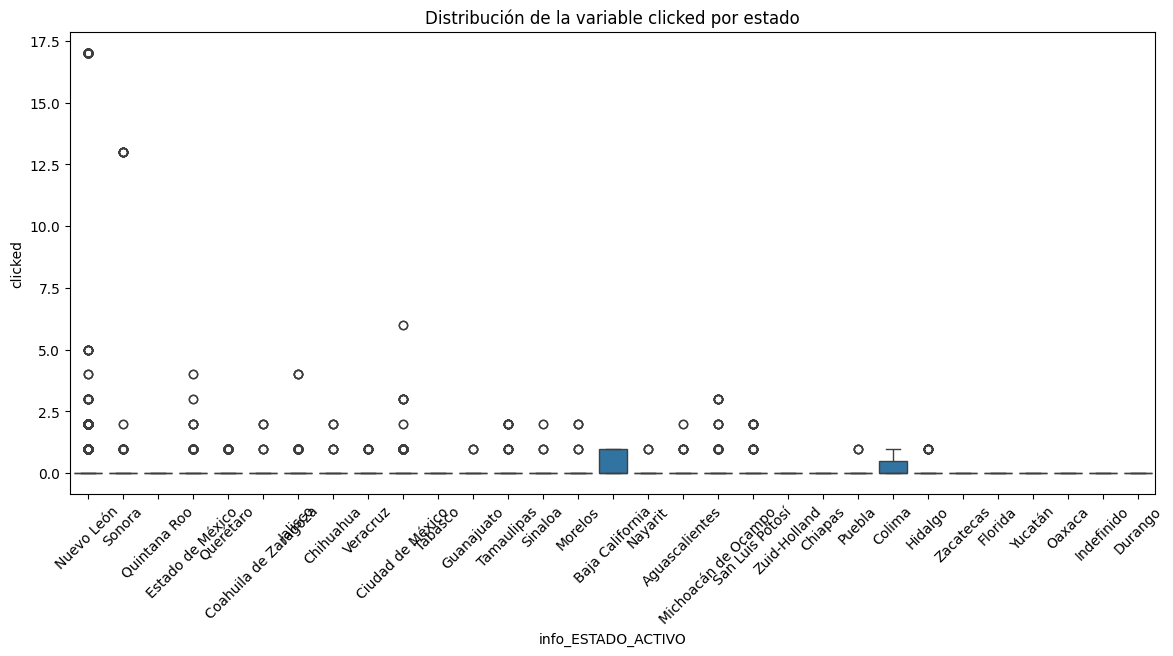

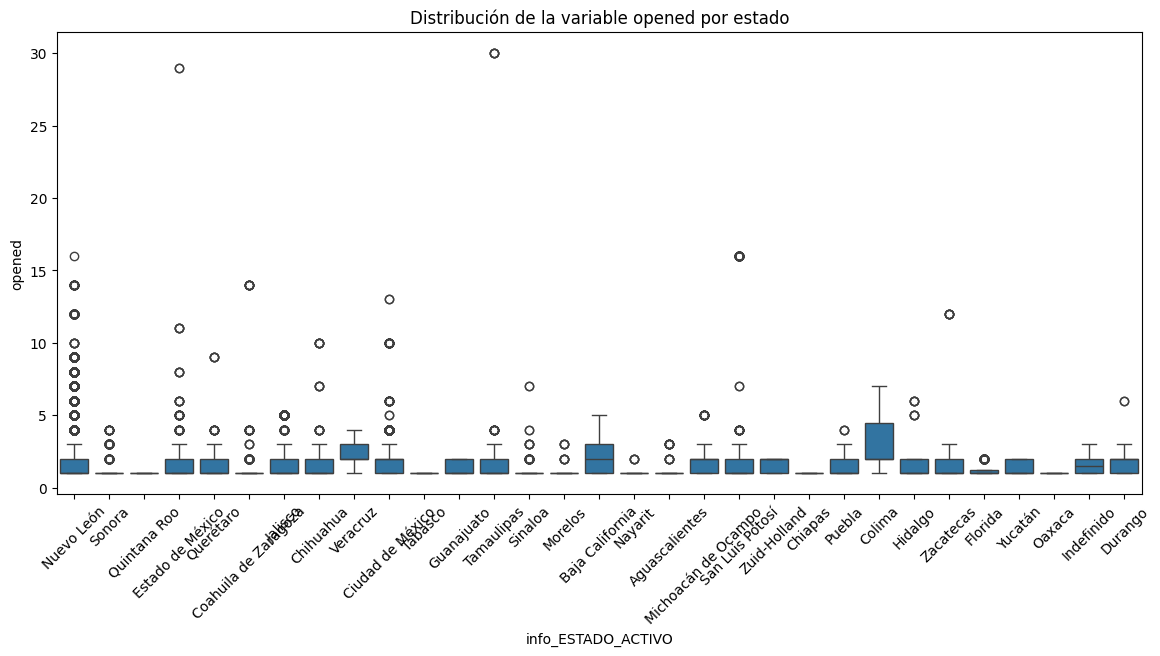

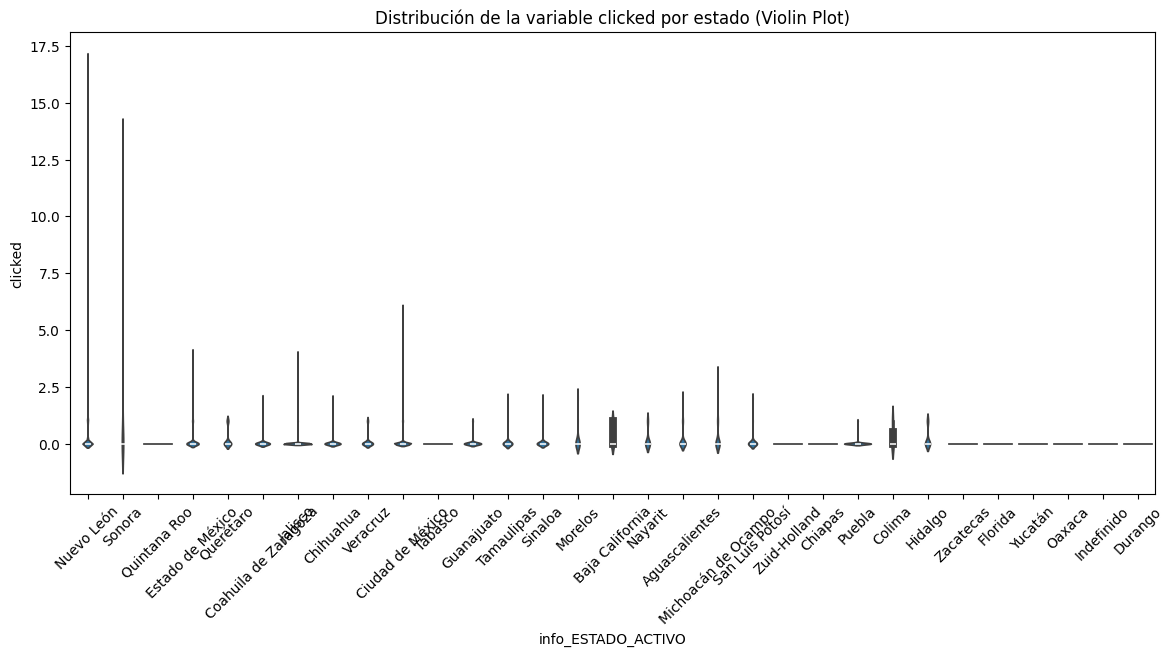

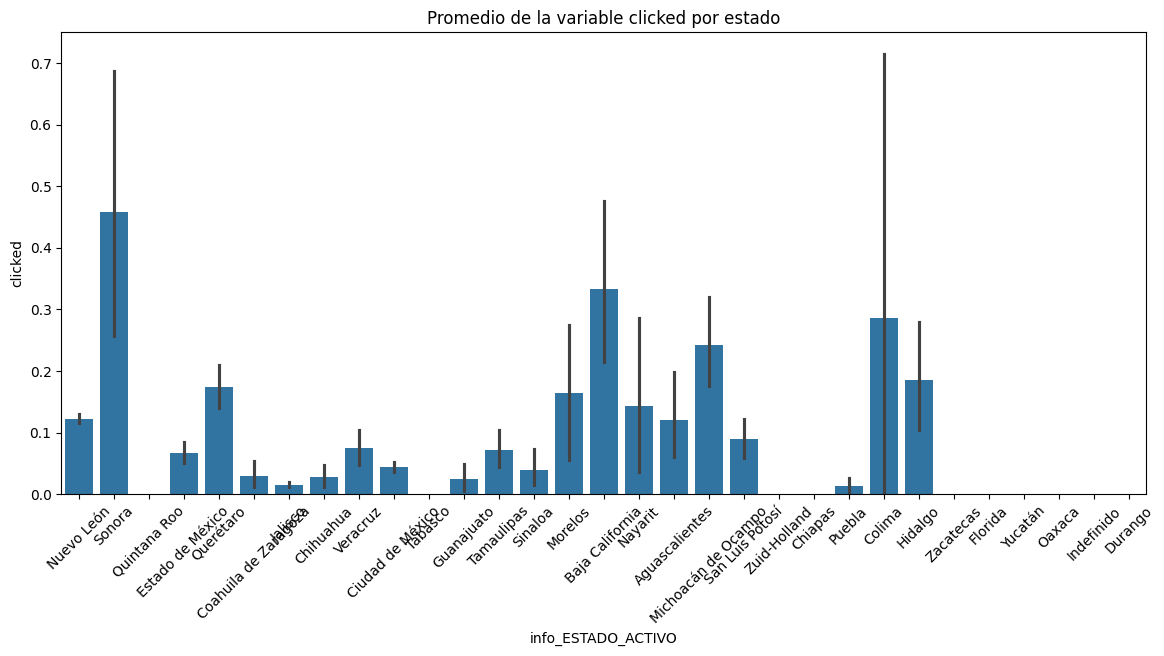

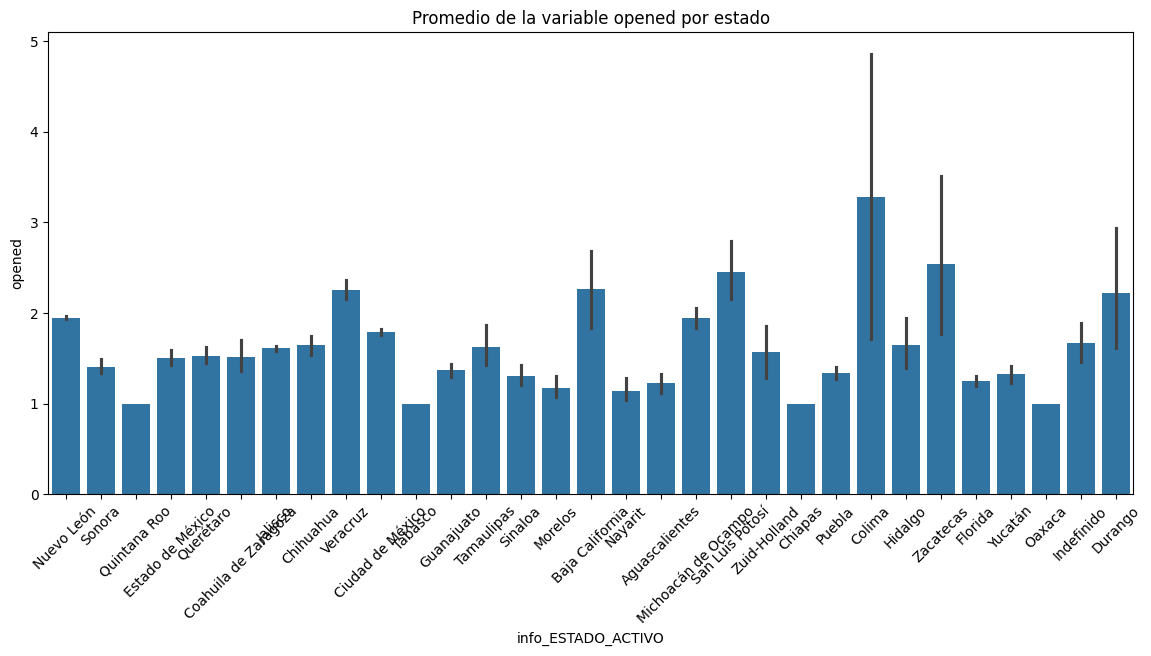

In [1162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar que las columnas existen en el DataFrame
if 'info_ESTADO_ACTIVO' in df_unido.columns and 'clicked' in df_unido.columns and 'opened' in df_unido.columns:

    # Gráfico de Boxplot para analizar la distribución de `clicked` por `estado`
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='info_ESTADO_ACTIVO', y='clicked', data=df_unido)
    plt.title('Distribución de la variable clicked por estado')
    plt.xticks(rotation=45)
    plt.show()

    # Gráfico de Boxplot para analizar la distribución de `opened` por `estado`
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='info_ESTADO_ACTIVO', y='opened', data=df_unido)
    plt.title('Distribución de la variable opened por estado')
    plt.xticks(rotation=45)
    plt.show()

    # Gráfico de Violin Plot para analizar `clicked` por `estado`
    plt.figure(figsize=(14, 6))
    sns.violinplot(x='info_ESTADO_ACTIVO', y='clicked', data=df_unido)
    plt.title('Distribución de la variable clicked por estado (Violin Plot)')
    plt.xticks(rotation=45)
    plt.show()

    # Gráfico de Bar Plot para el promedio de `clicked` por estado
    plt.figure(figsize=(14, 6))
    sns.barplot(x='info_ESTADO_ACTIVO', y='clicked', data=df_unido, estimator='mean')
    plt.title('Promedio de la variable clicked por estado')
    plt.xticks(rotation=45)
    plt.show()

    # Gráfico de Bar Plot para el promedio de `opened` por estado
    plt.figure(figsize=(14, 6))
    sns.barplot(x='info_ESTADO_ACTIVO', y='opened', data=df_unido, estimator='mean')
    plt.title('Promedio de la variable opened por estado')
    plt.xticks(rotation=45)
    plt.show()

else:
    display("Las columnas 'info_ESTADO_ACTIVO', 'clicked' o 'opened' no están disponibles en el DataFrame.")



Se agruparán para mejor visualización

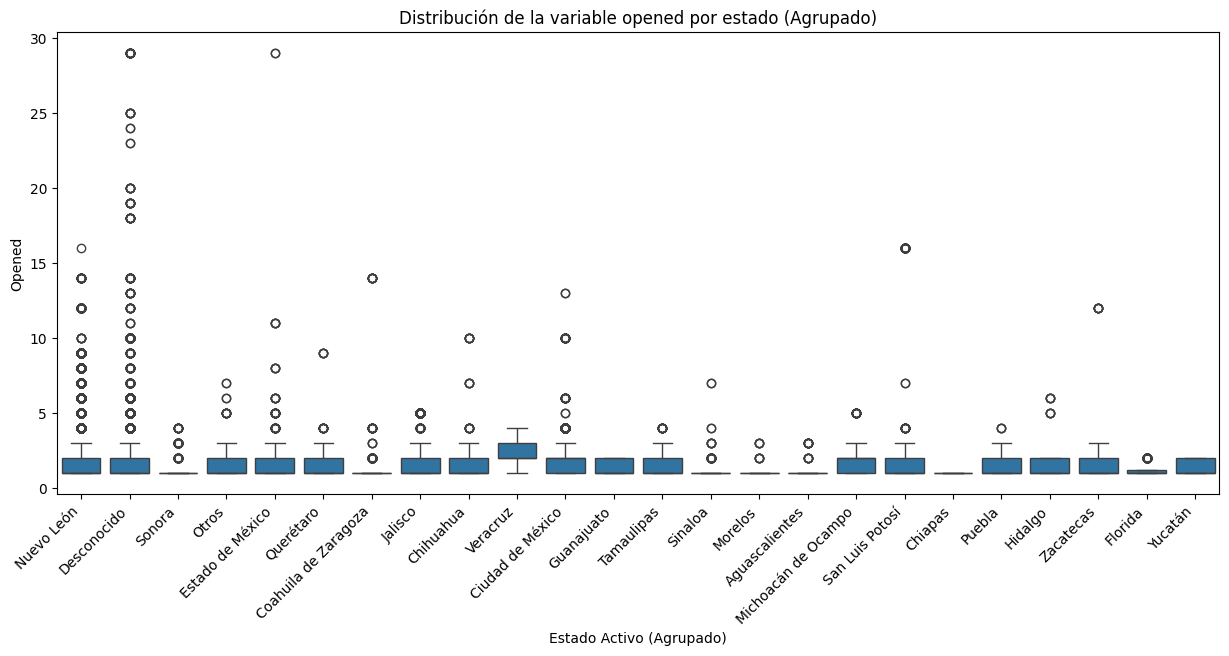

In [1163]:
#Reemplazar NaNs en la columna antes de agrupar
df_unido['info_ESTADO_ACTIVO'].fillna('Desconocido', inplace=True)

# Contar la frecuencia de cada estado, incluyendo 'Desconocido'
estado_counts = df_unido['info_ESTADO_ACTIVO'].value_counts()

# Definir un umbral para incluir solo los estados con suficientes observaciones
umbral = 50  # Ajusta este valor según el análisis
df_unido['info_ESTADO_ACTIVO_agrupado'] = df_unido['info_ESTADO_ACTIVO'].apply(lambda x: x if estado_counts[x] > umbral else 'Otros')

# Filtrar los valores atípicos extremos para mejorar la visualización
df_filtered = df_unido[df_unido['opened'] < 30]  # Ajusta el valor según la distribución

# Crear el gráfico con estados agrupados
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_filtered, x='info_ESTADO_ACTIVO_agrupado', y='opened')
plt.xticks(rotation=45, ha='right')  # Ajustar las etiquetas del eje X
plt.title('Distribución de la variable opened por estado (Agrupado)')
plt.xlabel('Estado Activo (Agrupado)')
plt.ylabel('Opened')
plt.show()


# Análisis

## 1. **Distribución Geográfica**
- **info_ESTADO_ACTIVO:**
  - **Nuevo León** tiene la mayor concentración de datos, significativamente superior a cualquier otro estado.
  - Le siguen la **Ciudad de México**, **Estado de México**, **Jalisco**, **Querétaro**, entre otros, aunque en proporciones mucho menores.
  
- **info_PAIS_ACTIVO:**
  - **México** es el país dominante en los datos, con una abrumadora mayoría siendo sede de la mayoria de los campus.
  - En menor proporción, algunos registros están asociados a **Estados Unidos**, seguido por países de América Latina como **Honduras**, **Bolivia**, **Panamá**, y otros.

## 2. **Distribución Temporal**
- **info_FECHA_ACTIVO:**
  - La fecha más común de actividad registrada es **14/08/2022**.
  - Hay picos adicionales en **05/07/2023** y otras fechas en años anteriores, lo que sugiere actividad en varios periodos a lo largo de los años.

- **info_FECHA_ACTIVO_NUM_CELULAR:**
  - La fecha más registrada es **14/10/2019**.
  - También hay una actividad destacada en **04/12/2023** y fechas posteriores como **20/06/2024**, lo que sugiere que los números celulares activos han sido actualizados recientemente.

## 3. **Distribución de Estado Civil**
- **info_ESTADOCIVIL:**
  - **Soltero** es el estado civil predominante.
  - Una proporción considerable de registros corresponde a **Casado**, mientras que las otras categorías como **Divorciado**, **Viudo**, o **Unión libre** tienen una representación mínima.

## 4. **Distribución por Intereses**
- **Intereses** (como **info_interes_TECNOLOGIA**, **info_interes_EDUCACION**, **info_interes_LIDERAZGO**, etc.):
  - Las personas que han indicado intereses en categorías como **tecnología**, **educación**, **liderazgo**, **negocios**, **cultura**, y **salud** presentan distribuciones uniformes.
  - En todas estas categorías, los registros que afirman tener estos intereses son numerosos, indicando un alto nivel de afinidad hacia estos temas.

## 5. **Distribución por Género**
- **base_SEXO:**
  - Hay más registros de personas de **sexo masculino** en comparación con **femenino**.

## 6. **Distribución por Año de Nacimiento**
- **base_año_nac:**
  - La mayor parte de los registros corresponde a personas nacidas entre **1993** y **2002**, lo que sugiere que la mayoría de los egresados en la base de datos son jóvenes adultos, de entre 21 y 30 años.

## 7. **Distribución por Nacionalidad**
- **base_NACIONALIDAD:**
  - **Mexicana** es, de manera abrumadora, la nacionalidad más común, seguida en proporciones muy menores por **Colombiana**, **Ecuatoriana**, **Peruana**, **Estadounidense**, y otras nacionalidades de América Latina.

## 8. **Distribución de la Presencia en LinkedIn**
- **info_SOCIAL_LINKEDIN:**
  - La mayoría de las personas **no tienen** un perfil activo en **LinkedIn**, lo que podría indicar que prefieren otros canales de contacto o no están tan activos en redes profesionales.

## 9. **Distribución por Número de Celular**
- **info_NUMERO_CELULAR:**
  - La mayoría de los registros indican tener un número de celular registrado, lo que sugiere que existe un alto nivel de accesibilidad para contactarlos.

##Acerca de las bivariables por estado

**Alta variabilidad entre estados** El gráfico muestra que hay una alta variabilidad en la distribución de la variable opened dependiendo del estado de residencia del egresado.
Estados como Nuevo León, Ciudad de México y Querétaro tienen una mayor cantidad de aperturas de correos comparado con otros estados. Esto sugiere un mayor nivel de interacción en estas regiones.

**Estados con Mayor Cantidad de Outliers** Algunos estados como Nuevo León y Querétaro presentan un número considerable de outliers, lo que indica que hay un subconjunto de egresados que abren los correos con una frecuencia muy alta comparada con el promedio del resto de usuarios en su misma región.

Muchos estados como Durango, Aguascalientes, Morelos y Tabasco muestran una distribución concentrada en los valores más bajos de opened. Esto podría indicar un menor interés o participación de los egresados en estas áreas.

**Regiones Internacionales** Algunos estados no pertenecientes a México (como: Panamá, Guatemala, California, New York) tienen interacciones muy bajas y pocas observaciones, por lo que la cantidad de datos podría ser insuficiente para sacar conclusiones significativas.

# **Pregunta 9: ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?**


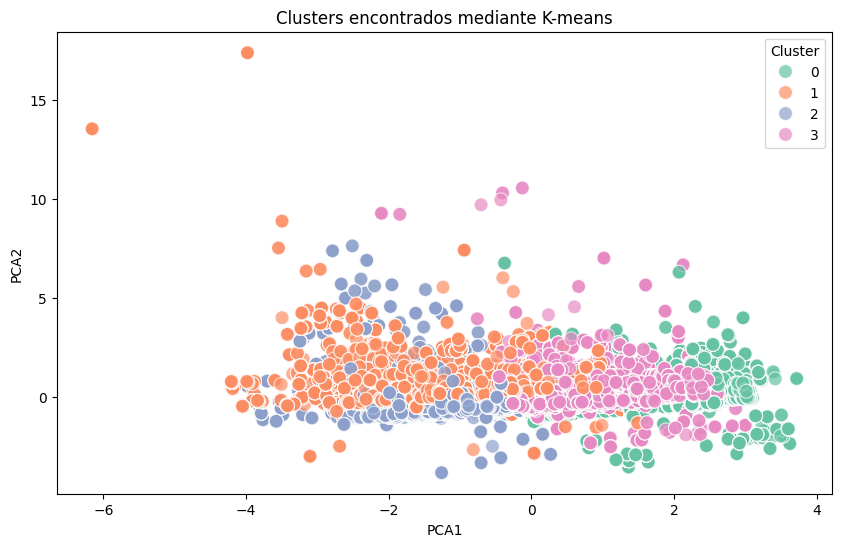

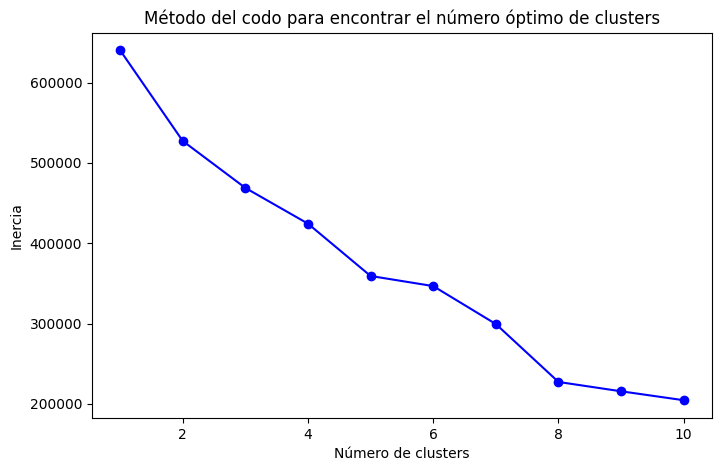

In [1164]:
# Seleccionar solo las columnas numéricas (K-means solo trabaja con datos numéricos)
numeric_columns = df_unido.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df_unido[numeric_columns].dropna()  # Eliminar filas con valores NaN

# Normalizar los datos para que todas las características tengan la misma escala
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Aplicar K-means para encontrar clusters
# Definir el número de clusters que queremos encontrar
kmeans = KMeans(n_clusters=4, random_state=42)  # Cambia n_clusters para buscar más o menos grupos
kmeans.fit(df_scaled)

# Agregar los clusters al DataFrame original
df_numeric['Cluster'] = kmeans.labels_

# Visualizar los clusters usando PCA (reducción de dimensionalidad a 2 componentes)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Crear un DataFrame con los resultados de PCA
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = kmeans.labels_

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100, alpha=0.7)
plt.title('Clusters encontrados mediante K-means')
plt.show()

# Evaluar el número óptimo de clusters
# Utilizamos el método del codo para determinar el número óptimo de clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficar la inercia para encontrar el "codo"
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo para encontrar el número óptimo de clusters')
plt.show()


# Análisis
 - En el primer análisis de clusters, observamos que las clases no presentaban una buena definición visual. Por ello, decidimos reincorporar las columnas de interés. Aunque estas contienen numerosos valores vacíos, la información que aportan permite una mejor definición de los clusters.
  
  - Con las correcciones anteriores se observan patrones de agrupación en los datos mas definidos. Usando la técnica de **K-means**, indetificamos **seis clusters distintos**.
  - **Método del codo**:El método del codo confirma que **3 o 6 clusters** es una opción razonable para segmentar los datos, ya que la reducción en la inercia comienza a estabilizarse después de estos puntos, sin embargo al momento de obtener los graficos, hay mayor limpieza con 3.
  - Los puntos representados en el gráfico de **PCA** muestran que los datos se agrupan en diferentes regiones del espacio bidimensional, lo que sugiere que hay características compartidas entre los individuos dentro de cada cluster.


  - La normalización y reducción de dimensionalidad nos permiten observar que los datos contienen variables que son útiles para segmentar a los egresados en grupos con características similares. Esto será crucial para definir perfiles de **LDG**, **Voluntariado**, **Historia de éxito**, **Speaker en eventos**.





# ***Pregunta 10: ¿Se deberían normalizar las imágenes para visualizarlas mejor? No se usan imágenes***

No Aplica

# **Pregunta 11: ¿Hay desequilibrio en las clases de la variable objetivo?**

Para este análisis haremos iniciativa por iniciativa

###**Líder de generación**

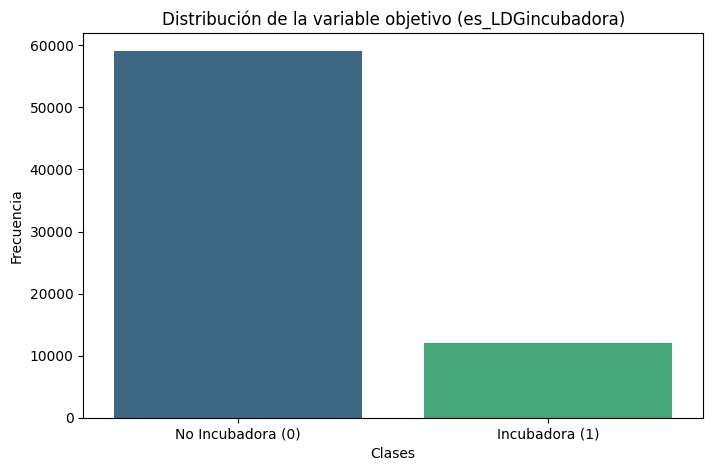

'Proporción de clase 0 (No Incubadora): 83.01%'

'Proporción de clase 1 (Incubadora): 16.99%'

In [1165]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_unidoLDG['es_LDGincubadora'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_LDGincubadora)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Incubadora (0)', 'Incubadora (1)'])
plt.show()

# Imprimir proporción
display(f"Proporción de clase 0 (No Incubadora): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporción de clase 1 (Incubadora): {class_counts[1] / sum(class_counts) * 100:.2f}%")


Técnicas a usar

Submuestreo: Reducir el número de ejemplos en la clase mayoritaria.

In [1166]:
from imblearn.under_sampling import RandomUnderSampler

# Definir la variable objetivo y las características
X = df_unidoLDG.drop('es_LDGincubadora', axis=1)
y = df_unidoLDG['es_LDGincubadora']

# Aplicar undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Crear un nuevo DataFrame con las clases balanceadas
df_resampled_unidoLDG = X_resampled.copy()
df_resampled_unidoLDG['es_LDGincubadora'] = y_resampled

display("Distribución de clases después del submuestreo:")
display(df_resampled_unidoLDG['es_LDGincubadora'].value_counts())


'Distribución de clases después del submuestreo:'

es_LDGincubadora
0    12095
1    12095
Name: count, dtype: int64

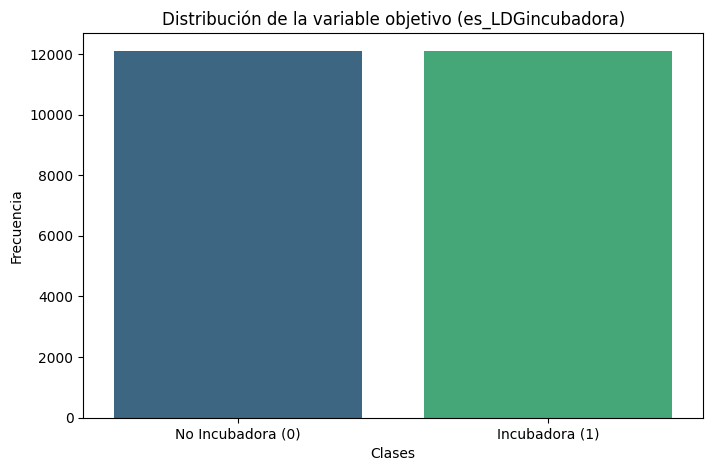

'Proporción de clase 0 (No Incubadora): 50.00%'

'Proporción de clase 1 (Incubadora): 50.00%'

In [1167]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_resampled_unidoLDG['es_LDGincubadora'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_LDGincubadora)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Incubadora (0)', 'Incubadora (1)'])
plt.show()

# Imprimir proporción
display(f"Proporción de clase 0 (No Incubadora): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporción de clase 1 (Incubadora): {class_counts[1] / sum(class_counts) * 100:.2f}%")

###**Voluntariado**

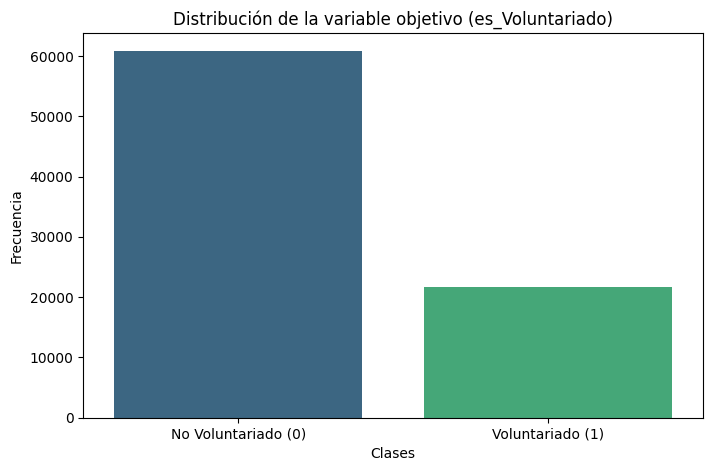

'Proporción de clase 0 (No Voluntariado): 73.72%'

'Proporción de clase 1 (Voluntariado): 26.28%'

In [1168]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_unidoVoluntariado['es_Voluntariado'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_Voluntariado)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Voluntariado (0)', 'Voluntariado (1)'])
plt.show()

# Imprimir proporción
display(f"Proporción de clase 0 (No Voluntariado): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporción de clase 1 (Voluntariado): {class_counts[1] / sum(class_counts) * 100:.2f}%")

Submuestreo: Reducir el número de ejemplos en la clase mayoritaria.

In [1169]:
#from imblearn.under_sampling import RandomUnderSampler

# Definir la variable objetivo y las características
X = df_unidoVoluntariado.drop('es_Voluntariado', axis=1)
y = df_unidoVoluntariado['es_Voluntariado']

# Aplicar undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Crear un nuevo DataFrame con las clases balanceadas
df_resampled_unidoVoluntatiado = X_resampled.copy()
df_resampled_unidoVoluntatiado['es_Voluntariado'] = y_resampled

display("Distribución de clases después del submuestreo:")
display(df_resampled_unidoVoluntatiado['es_Voluntariado'].value_counts())


'Distribución de clases después del submuestreo:'

es_Voluntariado
0    21673
1    21673
Name: count, dtype: int64

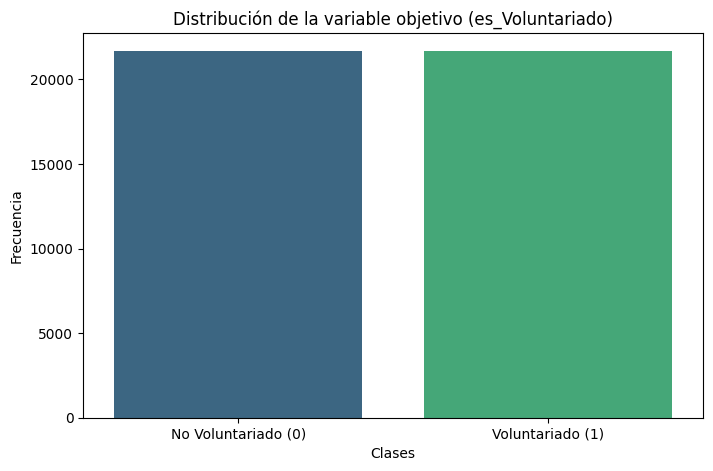

'Proporción de clase 0 (No Voluntariado): 50.00%'

'Proporción de clase 1 (Voluntariado): 50.00%'

In [1170]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_resampled_unidoVoluntatiado['es_Voluntariado'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_Voluntariado)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Voluntariado (0)', 'Voluntariado (1)'])
plt.show()

# Imprimir proporción
display(f"Proporción de clase 0 (No Voluntariado): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporción de clase 1 (Voluntariado): {class_counts[1] / sum(class_counts) * 100:.2f}%")

###**Historia de éxito**

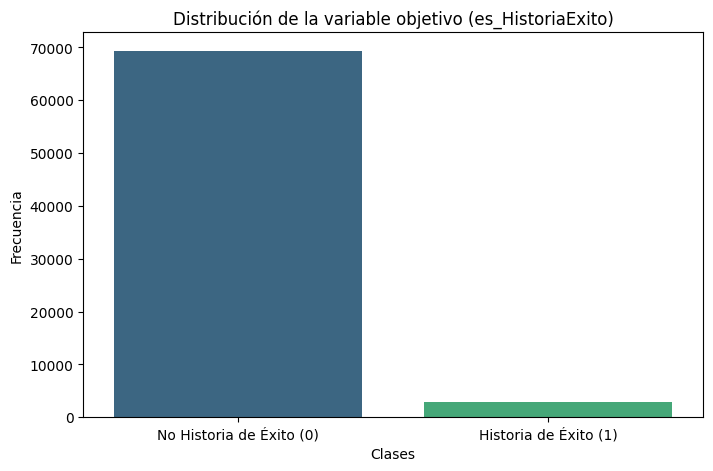

'Proporción de clase 0 (No Historia de Éxito): 95.98%'

'Proporción de clase 1 (Historia de Éxito): 4.02%'

In [1171]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_unidoHistoriaExito['es_HistoriaExito'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_HistoriaExito)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Historia de Éxito (0)', 'Historia de Éxito (1)'])
plt.show()

# Imprimir proporción
display(f"Proporción de clase 0 (No Historia de Éxito): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporción de clase 1 (Historia de Éxito): {class_counts[1] / sum(class_counts) * 100:.2f}%")

Submuestreo: Reducir el número de ejemplos en la clase mayoritaria.

In [1172]:
#from imblearn.under_sampling import RandomUnderSampler

# Definir la variable objetivo y las características
X = df_unidoHistoriaExito.drop('es_HistoriaExito', axis=1)
y = df_unidoHistoriaExito['es_HistoriaExito']

# Aplicar undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Crear un nuevo DataFrame con las clases balanceadas
df_resampled_HistoriaExito = X_resampled.copy()
df_resampled_HistoriaExito['es_HistoriaExito'] = y_resampled

display("Distribución de clases después del submuestreo:")
display(df_resampled_HistoriaExito['es_HistoriaExito'].value_counts())


'Distribución de clases después del submuestreo:'

es_HistoriaExito
0    2909
1    2909
Name: count, dtype: int64

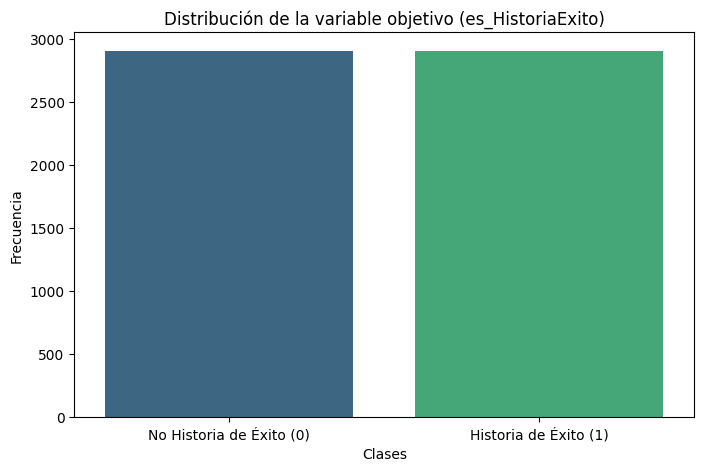

'Proporción de clase 0 (No Historia de Éxito): 50.00%'

'Proporción de clase 1 (Historia de Éxito): 50.00%'

In [1173]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_resampled_HistoriaExito['es_HistoriaExito'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_HistoriaExito)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Historia de Éxito (0)', 'Historia de Éxito (1)'])
plt.show()

# Imprimir proporción
display(f"Proporción de clase 0 (No Historia de Éxito): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporción de clase 1 (Historia de Éxito): {class_counts[1] / sum(class_counts) * 100:.2f}%")

###**Talks: Speaker en evento realizado por Relaciones con Egresados**

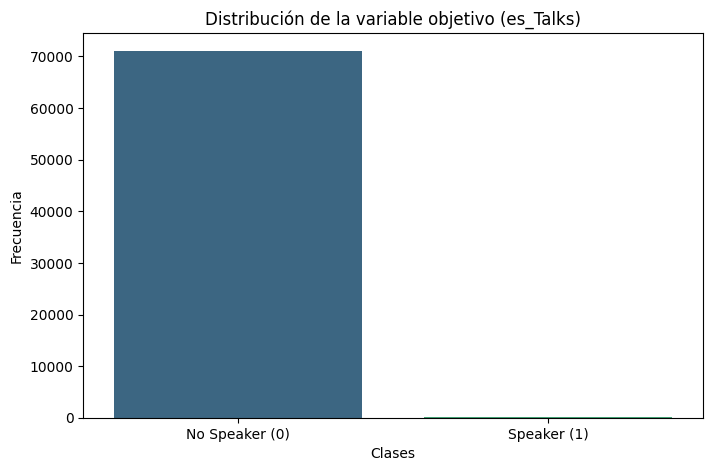

'Proporción de clase 0 (No Speaker): 99.88%'

'Proporción de clase 1 (Speaker): 0.12%'

In [1174]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_unidoTalks['es_Talks'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_Talks)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Speaker (0)', 'Speaker (1)'])
plt.show()

# Imprimir proporción
display(f"Proporción de clase 0 (No Speaker): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporción de clase 1 (Speaker): {class_counts[1] / sum(class_counts) * 100:.2f}%")

In [1175]:
df_unidoTalks['es_Talks']

0        0
1        0
2        0
3        0
4        0
        ..
71132    0
71133    0
71134    0
71135    0
71136    0
Name: es_Talks, Length: 71137, dtype: int64

Oversampling: Incrementar registros de la clase minoritaria

In [1176]:
from imblearn.over_sampling import RandomOverSampler

# Definir la variable objetivo y las características
X = df_unidoTalks.drop('es_Talks', axis=1)
y = df_unidoTalks['es_Talks']

# Aplicar sobremuestreo
oversample = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Crear un nuevo DataFrame con las clases balanceadas
df_resampled_Talks = X_resampled.copy()
df_resampled_Talks['es_Talks'] = y_resampled

# Imprimir la distribución de clases después del sobremuestreo
display("Distribución de clases después del sobremuestreo:")
display(df_resampled_Talks['es_Talks'].value_counts())

'Distribución de clases después del sobremuestreo:'

es_Talks
0    71049
1    71049
Name: count, dtype: int64

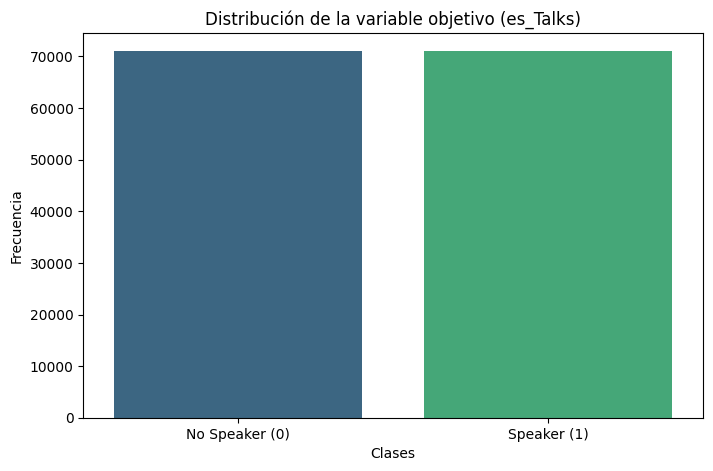

'Proporción de clase 0 (No Speaker): 50.00%'

'Proporción de clase 1 (Speaker): 50.00%'

In [1177]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_resampled_Talks['es_Talks'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_Talks)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Speaker (0)', 'Speaker (1)'])
plt.show()

# Imprimir proporción
display(f"Proporción de clase 0 (No Speaker): {class_counts[0] / sum(class_counts) * 100:.2f}%")
display(f"Proporción de clase 1 (Speaker): {class_counts[1] / sum(class_counts) * 100:.2f}%")

Submuestreo: Reducir el número de ejemplos en la clase mayoritaria.

El conjunto de datos presenta un claro desequilibrio de clases, donde la mayoría de los registros no están asociados a la iniciativa incubadora. Este desequilibrio puede generar problemas durante la fase de modelado, ya que los modelos tienden a favorecer la predicción de la clase mayoritaria. Para abordar este problema, aplicamos técnicas de re-balanceo de datos, optando en este caso por undersampling, lo que nos permitió obtener un total de 39,000 registros para entrenar el modelo.

**Iniciativa Voluntariado**

Al igual que en la iniciativa Líder de Generación, la iniciativa de Voluntariado también muestra un fuerte desequilibrio de clases, con la mayoría de los registros fuera de la iniciativa. Para mitigar el impacto de este desequilibrio y debido a la cantidad de datos disponibles, decidimos aplicar undersampling, obteniendo un total de 49,000 registros para el modelado.

**Iniciativa Historia de Éxito**

En el caso de la iniciativa Historia de Éxito, el desafío es aún mayor, ya que menos del 0.05% de los registros forman parte de la iniciativa. No obstante, dado el tipo de perfil de los datos, consideramos más apropiado realizar undersampling, lo que resultó en un conjunto final de 5,000 registros. Aunque el tamaño del conjunto es reducido, es suficiente para entrenar modelos lineales como regresión logística, regresión lineal o árboles de decisión.

**Iniciativa Speaker**

Similar a la iniciativa Historia de Éxito, la iniciativa de Speaker también presenta un claro desequilibrio de clases, donde la cantidad de Speakers es muy pequeña. En este caso, optamos por aplicar oversampling, logrando expandir el conjunto de datos a 600,000 registros para el modelado.


**Resumen General**

En las cuatro iniciativas, se utilizarán técnicas de re-balanceo como undersampling u oversampling  para asegurar un adecuado balance de clases durante la construcción de los modelos.

In [1178]:
# Forzar la recolección de basura
gc.collect()

95325

#**Avance 2. Ingeniería de características**

**Objetivos**

2.3 Crear nuevas características para mejorar el rendimiento de los modelos.

2.4 Mitigar el riesgo de características sesgadas y acelerar la convergencia de algunos algoritmos.

##**Se aplicarán operaciones comunes para convertir los datos crudos del mundo real, en un conjunto de variables útiles para el aprendizaje automático. El procesamiento puede incluir:**

> Agregar bloque entrecomillado



###**Generación de nuevas características**

#### Eventos

**Cantidad de eventos asistidos** (total_eventos_asistidos)

**Descripción**: Esta variable indica el número total de eventos a los que un egresado ha asistido

**Justificación**: Permite entender qué tan involucrado está cada egresado con las actividades de EXATEC o la institución

In [1179]:
# Mostrar todas las columnas del DataFrame
#print(df_unido.columns)

print(list(df_unido.columns))

['IA_ID', 'rol', 'categoria_dominio_correo', 'opened', 'clicked', 'Correo de marketing ID', 'Campaña ID', 'info_ESTADO_RESIDENCIA', 'info_PAIS_RESIDENCIA', 'info_FECHA_MAIL_ACTIVO', 'info_POBLACION_ACTIVO', 'info_MUNICIPIO_ACTIVO', 'info_ESTADO_ACTIVO', 'info_PAIS_ACTIVO', 'info_FECHA_ACTIVO', 'info_FECHA_ACTIVO_NUM_CELULAR', 'info_ESTADOCIVIL', 'tiene_numero_celular', 'tiene_linkedin', 'base_SEXO', 'base_año nac', 'base_NACIONALIDAD', 'base_ESTADONACIMIENTO', 'base_exatec personalizado', 'base_ESTADO_RESIDENCIA', 'base_PAIS_RESIDENCIA', 'base_AñoGrad', 'base_Tipo Escuela', 'base_SIGLASDELPROGRAMA', 'base_NIVELACADEMICO', 'base_IDCAMPUS', 'base_campusoperación', 'base_NOMBREEMPRESA', 'base_GIROEMPRESA', 'base_TIPOEMPRESA', 'base_AREAORGANIZACIONAL', 'base_PUESTO', 'base_ESTATUSEMPLEO', 'base_CDEMPRESA', 'base_EDOEMPRESA', 'base_PAISEMPRESA', 'base_Interesadocompartirtemas', 'HizoPrepaTec', 'suscrito_FechaRegistro', 'giveaway_fecha', 'evento_EventName', 'evento_Campus', 'evento_Category

In [1180]:
df_unido['total_eventos_asistidos'] = df_unido[df_unido['evento_CheckedIn'] == 1].groupby('IA_ID')['evento_CheckedIn'].transform('count')

In [1181]:
df_unido[['IA_ID', 'total_eventos_asistidos']]

IA_ID  total_eventos_asistidos
0        3102                      NaN
1        3102                      NaN
2        3112                      NaN
3        3112                      NaN
4        3112                      NaN
...       ...                      ...
71132  369281                      6.0
71133  369281                      6.0
71134  369281                      6.0
71135  369281                      6.0
71136  369281                      6.0

[71137 rows x 2 columns]

In [1182]:
#Eventos Asistidos
df_unidoHistoriaExito['total_eventos_asistidos'] = df_unidoHistoriaExito[df_unidoHistoriaExito['evento_CheckedIn'] == 1].groupby('IA_ID')['evento_CheckedIn'].transform('count')
df_unidoLDG['total_eventos_asistidos'] = df_unidoLDG[df_unidoLDG['evento_CheckedIn'] == 1].groupby('IA_ID')['evento_CheckedIn'].transform('count')
df_unidoTalks['total_eventos_asistidos'] = df_unidoTalks[df_unidoTalks['evento_CheckedIn'] == 1].groupby('IA_ID')['evento_CheckedIn'].transform('count')
df_unidoVoluntariado['total_eventos_asistidos'] = df_unidoVoluntariado[df_unidoVoluntariado['evento_CheckedIn'] == 1].groupby('IA_ID')['evento_CheckedIn'].transform('count')

In [1183]:
df_unidoHistoriaExito['total_eventos_asistidos']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
72324    6.0
72325    6.0
72326    6.0
72327    6.0
72328    6.0
Name: total_eventos_asistidos, Length: 72329, dtype: float64

In [1184]:
df_unido["total_eventos_asistidos"].fillna(0, inplace=True)
df_unidoHistoriaExito["total_eventos_asistidos"].fillna(0, inplace=True)
df_unidoLDG["total_eventos_asistidos"].fillna(0, inplace=True)
df_unidoTalks["total_eventos_asistidos"].fillna(0, inplace=True)
df_unidoVoluntariado["total_eventos_asistidos"].fillna(0, inplace=True)

In [1185]:
df_unidoVoluntariado["total_eventos_asistidos"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
82480    6.0
82481    6.0
82482    6.0
82483    6.0
82484    6.0
Name: total_eventos_asistidos, Length: 82485, dtype: float64

In [1186]:
df_unidoVoluntariado[['IA_ID', 'total_eventos_asistidos']]

IA_ID  total_eventos_asistidos
0        3102                      0.0
1        3102                      0.0
2        3112                      0.0
3        3112                      0.0
4        3112                      0.0
...       ...                      ...
82480  369281                      6.0
82481  369281                      6.0
82482  369281                      6.0
82483  369281                      6.0
82484  369281                      6.0

[82485 rows x 2 columns]

**Participación en tipos de eventos** (participacion_categorias)

**Descripción**:Crea variables indicadoras para cada categoría de evento, reflejando si el egresado ha participado en eventos de tipo Conferencia, Taller, etc

**Justificación**:  Esto ayuda a identificar a los egresados que prefieren ciertos tipos de eventos y pueden ser relevantes para ciertas iniciativas o estrategias

In [1187]:
# Crear variables indicadoras para la participación en diferentes categorías de eventos
categorias = pd.get_dummies(df_unido['evento_Category'], prefix='participacion_categoria')
df_unido = pd.concat([df_unido, categorias], axis=1)
df_unidoHistoriaExito= pd.concat([df_unidoHistoriaExito, categorias], axis=1)
df_unidoLDG=pd.concat([df_unidoLDG, categorias], axis=1)
df_unidoTalks= pd.concat([df_unidoTalks, categorias], axis=1)
df_unidoVoluntariado = pd.concat([df_unidoVoluntariado, categorias], axis=1)

In [1188]:
display(df_unido.head(100))

IA_ID                                   rol categoria_dominio_correo  \
0    3102                                Exatec                 Genérico   
1    3102                                Exatec                 Genérico   
2    3112                                Exatec                 Genérico   
3    3112                                Exatec                 Genérico   
4    3112                                Exatec                 Genérico   
..    ...                                   ...                      ...   
95   5592  Consejero; Donante Prospecto; Exatec                    Otros   
96   5592  Consejero; Donante Prospecto; Exatec                    Otros   
97   5592  Consejero; Donante Prospecto; Exatec                    Otros   
98   5592  Consejero; Donante Prospecto; Exatec                    Otros   
99   5592  Consejero; Donante Prospecto; Exatec                    Otros   

    opened  clicked  Correo de marketing ID   Campaña ID  \
0        1        1            3.622020e+11  10949903422   
1        1        1            3.622020e+11  10949903422   
2        1        0            3.633040e+11  10949903422   
3        1        0            3.633040e+11  10949903422   
4        1        0            3.633040e+11  10949903422   
..     ...      ...                     ...          ...   
95       4       13            3.622020e+11  10949903422   
96       4       13            3.622020e+11  10949903422   
97       4       13            3.622020e+11  10949903422   
98       4       13            3.622020e+11  10949903422   
99       4       13            3.622020e+11  10949903422   

   info_ESTADO_RESIDENCIA info_PAIS_RESIDENCIA info_FECHA_MAIL_ACTIVO  ...  \
0                     NaN                  NaN                    NaT  ...   
1                     NaN                  NaN                    NaT  ...   
2        Estado de México               Mexico             2017-09-22  ...   
3        Estado de México               Mexico             2017-09-22  ...   
4        Estado de México               Mexico             2017-09-22  ...   
..                    ...                  ...                    ...  ...   
95                 Sonora               México             2000-08-28  ...   
96                 Sonora               México             2000-08-28  ...   
97                 Sonora               México             2000-08-28  ...   
98                 Sonora               México             2000-08-28  ...   
99                 Sonora               México             2000-08-28  ...   

   participacion_categoria_Egresados - iniciativa de Participación_ Culturales o Sociales  \
0                                               False                                       
1                                               False                                       
2                                               False                                       
3                                               False                                       
4                                               False                                       
..                                                ...                                       
95                                              False                                       
96                                               True                                       
97                                               True                                       
98                                              False                                       
99                                              False                                       

   participacion_categoria_Egresados - iniciativa de Participación_ Deportivos  \
0                                               False                            
1                                               False                            
2                                               False                 

In [1189]:
# Contar valores únicos en la columna 'evento_Category'
conteo_valores = df_unidoVoluntariado['participacion_categoria_Egresados - iniciativa de Participación_ eventos LDG'].value_counts()

# Mostrar el conteo de True y False
display(conteo_valores)

participacion_categoria_Egresados - iniciativa de Participación_ eventos LDG
False    65663
True      5474
Name: count, dtype: int64

In [1190]:
display(df_unidoLDG['evento_Category'])

0                               Egresados - Regreso a Casa
1                               Egresados - Regreso a Casa
2                               Egresados - Regreso a Casa
3                               Egresados - Regreso a Casa
4                               Egresados - Regreso a Casa
                               ...                        
71168    Egresados - iniciativa de Participación_ Festejos
71169    Egresados - iniciativa de Participación_ Festejos
71170    Egresados - iniciativa de Participación_ Festejos
71171    Egresados - iniciativa de Participación_ Festejos
71172    Egresados - iniciativa de Participación_ Festejos
Name: evento_Category, Length: 71173, dtype: object

#### Suscripciones

**Antiguedad en suscripción** (antiguedad_suscripcion)

**Descripción**:Variable numérica que mide la antigüedad de la suscripción en días desde la fecha de registro hasta la fecha actual. Una mayor antigüedad podría indicar un mayor interés en los contenidos de los medios institucionales

**Justificación**: Conocer la antigüedad de la suscripción de un egresado puede ayudar a identificar qué tan reciente o comprometido está con los medios de la institución. Esta variable se podría usar para segmentar a los suscriptores en grupos de alto o bajo compromiso con la comunicación institucional

In [1191]:
from datetime import datetime
# Asegurarse de que la columna de fechas está en formato datetime
df_unido['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], errors='coerce')
df_unidoHistoriaExito['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], errors='coerce')
df_unidoLDG['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], errors='coerce')
df_unidoTalks['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], errors='coerce')
df_unidoVoluntariado['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], errors='coerce')

# Calcular la antigüedad en días desde la fecha de registro hasta la fecha actual
fecha_actual = datetime.now()
df_unido['antiguedad_suscripcion'] = (fecha_actual - df_unido['suscrito_FechaRegistro']).dt.days
df_unidoHistoriaExito['antiguedad_suscripcion'] =  (fecha_actual - df_unidoHistoriaExito['suscrito_FechaRegistro']).dt.days
df_unidoLDG['antiguedad_suscripcion'] =  (fecha_actual - df_unidoLDG['suscrito_FechaRegistro']).dt.days
df_unidoTalks['antiguedad_suscripcion'] =  (fecha_actual - df_unidoTalks['suscrito_FechaRegistro']).dt.days
df_unidoVoluntariado['antiguedad_suscripcion'] =  (fecha_actual - df_unidoVoluntariado['suscrito_FechaRegistro']).dt.days


In [1192]:
display(df_unido['antiguedad_suscripcion'].head())

0     128
1     128
2    1494
3    1494
4    1494
Name: antiguedad_suscripcion, dtype: int64

#### Demográficos

**Edad** (edad_egresado)

**Descripción**: Variable numérica que calcula la edad actual de los egresados a partir de su año de nacimiento (base_año_nacimiento). Ayuda a segmentar y categorizar a los egresados en diferentes grupos etarios

**Justificación**:Conocer la edad actual de los egresados es crucial para segmentar a la población en función de diferentes etapas de vida y tomar decisiones de acuerdo a sus preferencias y necesidades en función de su edad

In [1193]:
#from datetime import datetime

# Calcular la edad actual
# Convertir la columna base_año_nacimiento a formato numérico (int), ignorando errores
df_unido['base_año nac'] = pd.to_numeric(df_unido['base_año nac'], errors='coerce')
fecha_actual = datetime.now().year
df_unido['edad_egresado'] = fecha_actual - df_unido['base_año nac']
df_unidoHistoriaExito['edad_egresado'] =  fecha_actual - df_unido['base_año nac']
df_unidoLDG['edad_egresado'] =  fecha_actual - df_unido['base_año nac']
df_unidoTalks['edad_egresado'] = fecha_actual - df_unido['base_año nac']
df_unidoVoluntariado['edad_egresado'] =  fecha_actual - df_unido['base_año nac']


In [1194]:
display(df_unido['edad_egresado'].head())

0    82
1    82
2    82
3    82
4    82
Name: edad_egresado, dtype: int64

**Antiguedad de graduación** (antiguedad_graduacion)

**Descripción**: Variable numérica que mide la antigüedad en años desde la fecha de graduación (base_AñoGrad). Una menor antigüedad puede indicar una conexión más fuerte con el tec

**Justificación**: Conocer la antigüedad desde la graduación permite entender qué tan reciente es el vínculo del egresado con la institución y ayuda a personalizar las campañas según el tiempo transcurrido desde su graduación.

In [1195]:
# Convertir la columna base_AñoGrad a formato numérico (int), ignorando errores
df_unido['base_AñoGrad'] = pd.to_numeric(df_unido['base_AñoGrad'], errors='coerce')
# Calcular la antigüedad desde la graduación
df_unido['antiguedad_graduacion'] = fecha_actual - df_unido['base_AñoGrad']
df_unidoHistoriaExito['antiguedad_graduacion'] =  fecha_actual - df_unido['base_AñoGrad']
df_unidoLDG['antiguedad_graduacion'] =   fecha_actual - df_unido['base_AñoGrad']
df_unidoTalks['antiguedad_graduacion'] = fecha_actual - df_unido['base_AñoGrad']
df_unidoVoluntariado['antiguedad_graduacion'] =   fecha_actual - df_unido['base_AñoGrad']

In [1196]:
display(df_unido['antiguedad_graduacion'].head())

0    57.0
1    57.0
2    46.0
3    46.0
4    46.0
Name: antiguedad_graduacion, dtype: float64

In [1197]:
df_unido['base_ESTATUSEMPLEO']

0        NaN
1        NaN
2          A
3          A
4          A
        ... 
71132    NaN
71133    NaN
71134    NaN
71135    NaN
71136    NaN
Name: base_ESTATUSEMPLEO, Length: 71137, dtype: object

In [1198]:
# Contar valores únicos en la columna 'evento_Category'
conteo_valores = df_unido['base_ESTATUSEMPLEO'].value_counts()

# Mostrar el conteo de True y False
display(conteo_valores)


base_ESTATUSEMPLEO
I    29666
A    20114
Name: count, dtype: int64

#### Campañas de mailing

**Frecuencia en que abre los mails** (nivel engagement)

**Descripción**: Calcula el porcentaje de correos abiertos por el egresado sobre el total de correos recibidos (medido por Correo de marketing ID)

**Justificación**: Identificar la frecuencia con la que el egresado abre los correos electrónicos puede ayudar a segmentar la audiencia para campañas más efectivas. Un egresado que abre muchos correos podría ser considerado como "comprometido" o interesado en el contenido

In [1199]:
# Calcular la nivel_engagement (frecuencia de apertura de correos)
df_unido['nivel_engagement'] = (df_unido['opened'] / df_unido['Correo de marketing ID'].nunique())*100
df_unidoHistoriaExito['nivel_engagement'] =  (df_unidoHistoriaExito['opened'] / df_unidoHistoriaExito['Correo de marketing ID'].nunique())*100
df_unidoLDG['nivel_engagement'] =  (df_unidoLDG['opened'] / df_unidoLDG['Correo de marketing ID'].nunique())*100
df_unidoTalks['nivel_engagement'] =  (df_unidoTalks['opened'] / df_unidoTalks['Correo de marketing ID'].nunique())*100
df_unidoVoluntariado['nivel_engagement'] =  (df_unidoVoluntariado['opened'] / df_unidoVoluntariado['Correo de marketing ID'].nunique())*100


In [1200]:
display(df_unido['nivel_engagement'].max())

51.724137931034484



```
# This is formatted as code
```

###**Discretización o *binning***

La discretización consiste en convertir variables continuas en variables categóricas (bins o grupos). Esto nos será útil para crear rangos (por ejemplo, edad en rangos de jóvenes, adultos, etc.)

**Variable**: Edad Egresado

**Justificación**: Discretizar la edad en rangos nos facilitará la identificación de patrones demográficos y a reducir la variabilidad en modelos que son sensibles a cambios numéricos pequeños

In [1201]:
# Discretización de la edad en grupos
bins = [0, 25, 35, 45, 55, 65, 100]  # Definir rangos de edad
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']  # Definir etiquetas para cada rango
df_unido['grupo_edad'] = pd.cut(df_unido['edad_egresado'], bins=bins, labels=labels, right=False)
df_unidoHistoriaExito['grupo_edad'] =  pd.cut(df_unidoHistoriaExito['edad_egresado'], bins=bins, labels=labels, right=False)
df_unidoLDG['grupo_edad'] =  pd.cut(df_unidoLDG['edad_egresado'], bins=bins, labels=labels, right=False)
df_unidoTalks['grupo_edad'] = pd.cut(df_unidoTalks['edad_egresado'], bins=bins, labels=labels, right=False)
df_unidoVoluntariado['grupo_edad'] =  pd.cut(df_unidoVoluntariado['edad_egresado'], bins=bins, labels=labels, right=False)


In [1202]:
display(df_unido['grupo_edad'].head())

0    65+
1    65+
2    65+
3    65+
4    65+
Name: grupo_edad, dtype: category
Categories (6, object): ['<25' < '25-34' < '35-44' < '45-54' < '55-64' < '65+']

In [1203]:
# Contar valores únicos en la columna 'evento_Category'
conteo_valores = df_unido['grupo_edad'].value_counts()

# Mostrar el conteo de True y False
display(conteo_valores)


grupo_edad
35-44    25817
45-54    21546
25-34    16729
55-64     6180
65+        811
<25         54
Name: count, dtype: int64

**Es importante analizar por qué el grupo de menores de 25 años (<25) en el resultado del binning numérico es tan reducido, a pesar de que la mayoría de los egresados suelen graduarse antes de esta edad. Este hecho resulta especialmente relevante considerando que en el DF se incluyeron las graduaciones de diciembre del 2023.**

**Variable**: antiguedad_graduacion

**Justificación**: Dividir la antigüedad en grupos (por ejemplo, reciente, intermedio, antiguo) podría ayudar a identificar patrones en el comportamiento de los egresados según su tiempo de egreso

In [1204]:
# Crear bins para agrupar la antigüedad en categorías
antiguedad_bins = [0, 5, 10, 20, 30, 50]  # Definir rangos de antigüedad
antiguedad_labels = ['0-5 años', '6-10 años', '11-20 años', '21-30 años', 'Más de 30 años']
df_unido['grupo_antiguedad_graduacion'] = pd.cut(df_unido['antiguedad_graduacion'], bins=antiguedad_bins, labels=antiguedad_labels, right=False)
df_unidoHistoriaExito['grupo_antiguedad_graduacion'] = pd.cut(df_unidoHistoriaExito['antiguedad_graduacion'], bins=antiguedad_bins, labels=antiguedad_labels, right=False)
df_unidoLDG['grupo_antiguedad_graduacion'] =  pd.cut(df_unidoLDG['antiguedad_graduacion'], bins=antiguedad_bins, labels=antiguedad_labels, right=False)
df_unidoTalks['grupo_antiguedad_graduacion'] = pd.cut(df_unidoTalks['antiguedad_graduacion'], bins=antiguedad_bins, labels=antiguedad_labels, right=False)
df_unidoVoluntariado['grupo_antiguedad_graduacion'] = pd.cut(df_unidoVoluntariado['antiguedad_graduacion'], bins=antiguedad_bins, labels=antiguedad_labels, right=False)

In [1205]:
display(df_unido['grupo_antiguedad_graduacion'].head())

0               NaN
1               NaN
2    Más de 30 años
3    Más de 30 años
4    Más de 30 años
Name: grupo_antiguedad_graduacion, dtype: category
Categories (5, object): ['0-5 años' < '6-10 años' < '11-20 años' < '21-30 años' < 'Más de 30 años']

**Variable**: open & clic

**Justificación**: Los usuarios pueden ser segmentados en "baja apertura", "media apertura", y "alta apertura" según cuántas veces abren los correos. Esto es útil para personalizar las campañas de marketing

In [1206]:
# Discretización de la frecuencia de apertura de correos
apertura_bins = [0, 10, 20, 30, 40, 50, 60]
apertura_labels = ['0-10% apertura', '10-20% aperturas', '20-30% aperturas', '30-40% aperturas', '40-50% aperturas', '>50% aperturas']

# Aplicar discretización en los DataFrames
df_unido['rangos_engagement'] = pd.cut(df_unido['nivel_engagement'], bins=apertura_bins, labels=apertura_labels, right=False)

df_unidoHistoriaExito['frecuencia_apertura_correos'] = pd.cut(df_unidoHistoriaExito['nivel_engagement'], bins=apertura_bins, labels=apertura_labels, right=False)
df_unidoLDG['frecuencia_apertura_correos'] = pd.cut(df_unidoLDG['nivel_engagement'], bins=apertura_bins, labels=apertura_labels, right=False)
df_unidoTalks['frecuencia_apertura_correos'] = pd.cut(df_unidoTalks['nivel_engagement'], bins=apertura_bins, labels=apertura_labels, right=False)
df_unidoVoluntariado['frecuencia_apertura_correos'] = pd.cut(df_unidoVoluntariado['nivel_engagement'], bins=apertura_bins, labels=apertura_labels, right=False)

In [1207]:
display(df_unido['rangos_engagement'].head())

0    0-10% apertura
1    0-10% apertura
2    0-10% apertura
3    0-10% apertura
4    0-10% apertura
Name: rangos_engagement, dtype: category
Categories (6, object): ['0-10% apertura' < '10-20% aperturas' < '20-30% aperturas' <
                         '30-40% aperturas' < '40-50% aperturas' < '>50% aperturas']

In [1208]:
# Contar valores únicos en la columna 'evento_Category'
conteo_valores = df_unido['rangos_engagement'].value_counts()

# Mostrar el conteo de True y False
display(conteo_valores)

rangos_engagement
0-10% apertura      68134
10-20% aperturas     2762
20-30% aperturas      182
>50% aperturas         26
30-40% aperturas       25
40-50% aperturas        8
Name: count, dtype: int64

In [1209]:
# Contar valores únicos en la columna 'evento_Category'
conteo_valores = df_unido['evento_attendeeStatus'].value_counts()

# Mostrar el conteo de True y False
display(conteo_valores)

evento_attendeeStatus
Registered    60583
Accepted       8942
Cancelled       879
Invited          36
Sin Estado       24
Name: count, dtype: int64

In [1210]:
#Obtener el número de categorías únicas en las columnas categóricas
for col in df_unido.select_dtypes(include=['object']).columns:
    display(f"{col}: {df_unido[col].nunique()} categorías")

'rol: 20 categorías'

'categoria_dominio_correo: 3 categorías'

'Campaña ID: 9 categorías'

'info_ESTADO_RESIDENCIA: 41 categorías'

'info_PAIS_RESIDENCIA: 10 categorías'

'info_POBLACION_ACTIVO: 115 categorías'

'info_MUNICIPIO_ACTIVO: 98 categorías'

'info_ESTADO_ACTIVO: 32 categorías'

'info_PAIS_ACTIVO: 4 categorías'

'info_ESTADOCIVIL: 7 categorías'

'base_SEXO: 2 categorías'

'base_NACIONALIDAD: 16 categorías'

'base_ESTADONACIMIENTO: 56 categorías'

'base_exatec personalizado: 3 categorías'

'base_ESTADO_RESIDENCIA: 55 categorías'

'base_PAIS_RESIDENCIA: 18 categorías'

'base_Tipo Escuela: 6 categorías'

'base_SIGLASDELPROGRAMA: 180 categorías'

'base_IDCAMPUS: 35 categorías'

'base_campusoperación: 32 categorías'

'base_NOMBREEMPRESA: 1017 categorías'

'base_GIROEMPRESA: 67 categorías'

'base_TIPOEMPRESA: 4 categorías'

'base_AREAORGANIZACIONAL: 31 categorías'

'base_PUESTO: 756 categorías'

'base_ESTATUSEMPLEO: 2 categorías'

'base_CDEMPRESA: 221 categorías'

'base_EDOEMPRESA: 32 categorías'

'base_PAISEMPRESA: 18 categorías'

'base_Interesadocompartirtemas: 3 categorías'

'evento_EventName: 639 categorías'

'evento_Campus: 37 categorías'

'evento_Category: 14 categorías'

'evento_attendeeStatus: 5 categorías'

'info_ESTADO_ACTIVO_agrupado: 24 categorías'

###**Codificación (ordinal, one hot,…)**

**Variable**: base_SEXO, base_NIVELACADEMICO

**Justificación**: La codificación adecuada garantiza que los modelos de machine learning puedan procesar y aprender patrones de variables categóricas, sin distorsionar las relaciones entre categorías

Nota: base_SEXO ya se había hecho onehot anteriormente

In [1211]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# One-Hot Encoding para variables categóricas
onehot_vars = ['categoria_dominio_correo', 'base_NIVELACADEMICO', 'base_Tipo Escuela', 'base_TIPOEMPRESA']  # Variables categóricas

# Inicializar OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' elimina una columna para evitar multicolinealidad

# Realizar el One-Hot Encoding en df_unido
onehot_encoded = onehot_encoder.fit_transform(df_unido[onehot_vars])

# Convertir el resultado a DataFrame
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(onehot_vars))

# Concatenar con el DataFrame original (sin las columnas originales categóricas)
df_unido = pd.concat([df_unido.drop(columns=onehot_vars), onehot_df], axis=1)

# Repetir el proceso para los demás DataFrames
# Para df_unidoHistoriaExito
onehot_encoded_historia = onehot_encoder.fit_transform(df_unidoHistoriaExito[onehot_vars])
onehot_df_historia = pd.DataFrame(onehot_encoded_historia, columns=onehot_encoder.get_feature_names_out(onehot_vars))
df_unidoHistoriaExito = pd.concat([df_unidoHistoriaExito.drop(columns=onehot_vars), onehot_df_historia], axis=1)

# Para df_unidoLDG
onehot_encoded_ldg = onehot_encoder.fit_transform(df_unidoLDG[onehot_vars])
onehot_df_ldg = pd.DataFrame(onehot_encoded_ldg, columns=onehot_encoder.get_feature_names_out(onehot_vars))
df_unidoLDG = pd.concat([df_unidoLDG.drop(columns=onehot_vars), onehot_df_ldg], axis=1)

# Para df_unidoTalks
onehot_encoded_talks = onehot_encoder.fit_transform(df_unidoTalks[onehot_vars])
onehot_df_talks = pd.DataFrame(onehot_encoded_talks, columns=onehot_encoder.get_feature_names_out(onehot_vars))
df_unidoTalks = pd.concat([df_unidoTalks.drop(columns=onehot_vars), onehot_df_talks], axis=1)

# Para df_unidoVoluntariado
onehot_encoded_voluntariado = onehot_encoder.fit_transform(df_unidoVoluntariado[onehot_vars])
onehot_df_voluntariado = pd.DataFrame(onehot_encoded_voluntariado, columns=onehot_encoder.get_feature_names_out(onehot_vars))
df_unidoVoluntariado = pd.concat([df_unidoVoluntariado.drop(columns=onehot_vars), onehot_df_voluntariado], axis=1)



In [1212]:
# Verificar que las columnas se han agregado
display(df_unido.head())

IA_ID     rol  opened  clicked  Correo de marketing ID   Campaña ID  \
0   3102  Exatec       1        1            3.622020e+11  10949903422   
1   3102  Exatec       1        1            3.622020e+11  10949903422   
2   3112  Exatec       1        0            3.633040e+11  10949903422   
3   3112  Exatec       1        0            3.633040e+11  10949903422   
4   3112  Exatec       1        0            3.633040e+11  10949903422   

  info_ESTADO_RESIDENCIA info_PAIS_RESIDENCIA info_FECHA_MAIL_ACTIVO  \
0                    NaN                  NaN                    NaT   
1                    NaN                  NaN                    NaT   
2       Estado de México               Mexico             2017-09-22   
3       Estado de México               Mexico             2017-09-22   
4       Estado de México               Mexico             2017-09-22   

  info_POBLACION_ACTIVO  ... base_NIVELACADEMICO_14  \
0                   NaN  ...                    0.0   
1                   NaN  ...                    0.0   
2                México  ...                    0.0   
3                México  ...                    0.0   
4                México  ...                    0.0   

  base_Tipo Escuela_Gobierno y Ciencias Sociales  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

  base_Tipo Escuela_Humanidades y Educación  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

  base_Tipo Escuela_Ingeniería y Ciencias  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

  base_Tipo Escuela_Medicina y Ciencias de la salud  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

  base_Tipo Escuela_Negocios  base_TIPOEMPRESA_Franquicia extranjera  \
0                        1.0                                     0.0   
1                        1.0                                     0.0   
2                        1.0                                     0.0   
3                        1.0                                     0.0   
4                        1.0                                     0.0   

   base_TIPOEMPRESA_Mexicana base_TIPOEMPRESA_Transnacional en México  \
0                        0.0                                      0.0   
1                        0.0                                      0.0   
2                        1.0                                      0.0   
3                        1.0                                      0.0   
4                        1.0                                      0.0   

   base_TIPOEMPRESA_nan  
0                   1.0  
1                   1.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 83 columns]

###**Escalamiento (normalización, estandarización, min – max,…)**

In [1213]:
display(df_unido.head())

IA_ID     rol  opened  clicked  Correo de marketing ID   Campaña ID  \
0   3102  Exatec       1        1            3.622020e+11  10949903422   
1   3102  Exatec       1        1            3.622020e+11  10949903422   
2   3112  Exatec       1        0            3.633040e+11  10949903422   
3   3112  Exatec       1        0            3.633040e+11  10949903422   
4   3112  Exatec       1        0            3.633040e+11  10949903422   

  info_ESTADO_RESIDENCIA info_PAIS_RESIDENCIA info_FECHA_MAIL_ACTIVO  \
0                    NaN                  NaN                    NaT   
1                    NaN                  NaN                    NaT   
2       Estado de México               Mexico             2017-09-22   
3       Estado de México               Mexico             2017-09-22   
4       Estado de México               Mexico             2017-09-22   

  info_POBLACION_ACTIVO  ... base_NIVELACADEMICO_14  \
0                   NaN  ...                    0.0   
1                   NaN  ...                    0.0   
2                México  ...                    0.0   
3                México  ...                    0.0   
4                México  ...                    0.0   

  base_Tipo Escuela_Gobierno y Ciencias Sociales  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

  base_Tipo Escuela_Humanidades y Educación  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

  base_Tipo Escuela_Ingeniería y Ciencias  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

  base_Tipo Escuela_Medicina y Ciencias de la salud  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

  base_Tipo Escuela_Negocios  base_TIPOEMPRESA_Franquicia extranjera  \
0                        1.0                                     0.0   
1                        1.0                                     0.0   
2                        1.0                                     0.0   
3                        1.0                                     0.0   
4                        1.0                                     0.0   

   base_TIPOEMPRESA_Mexicana base_TIPOEMPRESA_Transnacional en México  \
0                        0.0                                      0.0   
1                        0.0                                      0.0   
2                        1.0                                      0.0   
3                        1.0                                      0.0   
4                        1.0                                      0.0   

   base_TIPOEMPRESA_nan  
0                   1.0  
1                   1.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 83 columns]

**Variables**: opened, clicked

**Ténica**: Standard Scaling
Ventajas:
Reduce la influencia de variables con varianza elevada, asegurando que todas las variables contribuyan por igual.

**Justificación**:
Para las variables que presentan una amplia dispersión de valores, como opened y clicked, estandarizarlas ayuda a evitar que los valores altos dominen el modelo

**Justificación general:**
El escalamiento se elige basándose en el tipo de variable y su distribución:

Variables con rango acotado: Aplicamos *Min-Max Scaling* para llevarlas a [0, 1], ya que no necesitan centrado y es importante preservar las relaciones
relativas entre los valores.

Variables con mucha varianza: Aplicamos *Standard Scaling* para asegurar que no afecten de manera desproporcionada a los modelos.


In [1214]:
#Importar las librerías necesarias
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#variables a escalar
variables_escalar = [
    'opened', 'clicked'
]

#Verificamos si las variables existen en el DataFrame
variables_existentes = [var for var in variables_escalar if var in df_unido.columns]
#Se Aplicaa Min-Max Scaling para ajustar al rango [0, 1]
minmax_scaler = MinMaxScaler()
df_unido[variables_existentes] = minmax_scaler.fit_transform(df_unido[variables_existentes])
#Centraremos las variables a media 0 y desviación estándar 1, usar StandardScaler
standard_scaler = StandardScaler()
df_unido[variables_existentes] = standard_scaler.fit_transform(df_unido[variables_existentes])


#Verificamos si las variables existen en el DataFrame
variables_existentes = [var for var in variables_escalar if var in df_unidoHistoriaExito.columns]
#Se Aplicaa Min-Max Scaling para ajustar al rango [0, 1]
minmax_scaler = MinMaxScaler()
df_unidoHistoriaExito[variables_existentes] = minmax_scaler.fit_transform(df_unidoHistoriaExito[variables_existentes])
#Centraremos las variables a media 0 y desviación estándar 1, usar StandardScaler
standard_scaler = StandardScaler()
df_unidoHistoriaExito[variables_existentes] = standard_scaler.fit_transform(df_unidoHistoriaExito[variables_existentes])


#Verificamos si las variables existen en el DataFrame
variables_existentes = [var for var in variables_escalar if var in df_unidoLDG.columns]
#Se Aplicaa Min-Max Scaling para ajustar al rango [0, 1]
minmax_scaler = MinMaxScaler()
df_unidoLDG[variables_existentes] = minmax_scaler.fit_transform(df_unidoLDG[variables_existentes])
#Centraremos las variables a media 0 y desviación estándar 1, usar StandardScaler
standard_scaler = StandardScaler()
df_unidoLDG[variables_existentes] = standard_scaler.fit_transform(df_unidoLDG[variables_existentes])


#Verificamos si las variables existen en el DataFrame
variables_existentes = [var for var in variables_escalar if var in df_unidoTalks.columns]
#Se Aplicaa Min-Max Scaling para ajustar al rango [0, 1]
minmax_scaler = MinMaxScaler()
df_unidoTalks[variables_existentes] = minmax_scaler.fit_transform(df_unidoTalks[variables_existentes])
#Centraremos las variables a media 0 y desviación estándar 1, usar StandardScaler
standard_scaler = StandardScaler()
df_unidoTalks[variables_existentes] = standard_scaler.fit_transform(df_unidoTalks[variables_existentes])


#Verificamos si las variables existen en el DataFrame
variables_existentes = [var for var in variables_escalar if var in df_unidoVoluntariado.columns]
#Se Aplicaa Min-Max Scaling para ajustar al rango [0, 1]
minmax_scaler = MinMaxScaler()
df_unidoVoluntariado[variables_existentes] = minmax_scaler.fit_transform(df_unidoVoluntariado[variables_existentes])
#Centraremos las variables a media 0 y desviación estándar 1, usar StandardScaler
standard_scaler = StandardScaler()
df_unidoVoluntariado[variables_existentes] = standard_scaler.fit_transform(df_unidoVoluntariado[variables_existentes])



In [1215]:
from sklearn.preprocessing import PowerTransformer

# Transformación Logarítmica para variables sesgadas
variables_log = ['nivel_engagement', 'total_eventos_asistidos']
for var in variables_log:
    df_unido[var + '_log'] = np.log1p(df_unido[var])
    df_unidoHistoriaExito[var + '_log'] = np.log1p(df_unidoHistoriaExito[var])
    df_unidoLDG[var + '_log'] = np.log1p(df_unidoLDG[var])
    df_unidoTalks[var + '_log'] = np.log1p(df_unidoTalks[var])
    df_unidoVoluntariado[var + '_log'] = np.log1p(df_unidoVoluntariado[var])

# Aplicación de Yeo-Johnson para variables con valores negativos o complejos
pt = PowerTransformer(method='yeo-johnson')
df_unido['edad_egresado_yeojohnson'] = pt.fit_transform(df_unido[['edad_egresado']])
df_unidoHistoriaExito['edad_egresado_yeojohnson'] = pt.fit_transform(df_unidoHistoriaExito[['edad_egresado']])
df_unidoLDG['edad_egresado_yeojohnson'] = pt.fit_transform(df_unidoLDG[['edad_egresado']])
df_unidoTalks['edad_egresado_yeojohnson'] = pt.fit_transform(df_unidoTalks[['edad_egresado']])
df_unidoVoluntariado['edad_egresado_yeojohnson'] = pt.fit_transform(df_unidoVoluntariado[['edad_egresado']])

# Normalización Min-Max para mantener todas las variables en el mismo rango
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
variables_minmax = ['opened', 'clicked']
df_unido[variables_minmax] = scaler.fit_transform(df_unido[variables_minmax])
df_unidoHistoriaExito[variables_minmax] = scaler.fit_transform(df_unidoHistoriaExito[variables_minmax])
df_unidoLDG[variables_minmax] = scaler.fit_transform(df_unidoLDG[variables_minmax])
df_unidoTalks[variables_minmax] = scaler.fit_transform(df_unidoTalks[variables_minmax])
df_unidoVoluntariado[variables_minmax] = scaler.fit_transform(df_unidoVoluntariado[variables_minmax])



Se aplicó una transformación logarítmica a las variables con distribuciones sesgadas para reducir el efecto de valores extremos. Además, la transformación Yeo-Johnson fue útil para variables con valores negativos, lo que permite que el modelo las interprete correctamente. Finalmente, se utilizó Min-Max Scaling para asegurar que las variables mantengan el mismo rango, evitando que alguna característica domine el análisis debido a su magnitud.


In [1216]:
display(df_unido['clicked'].head())

0    0.058824
1    0.058824
2    0.000000
3    0.000000
4    0.000000
Name: clicked, dtype: float64

## **Conclusiones**

Se utilizó la codificación One-Hot para la variable ‘base_Tipo Escuela’, debido a que esta variable no tiene un orden natural. Transformarla en variables binarias asegura que cada categoría sea tratada como independiente.

Por otro lado, aplicamos escalado Min-Max a las variables de apertura y clics de correos electrónicos. Esto garantiza que todos los valores estén en el mismo rango [0,1], lo cual es crucial para mejorar la eficiencia en modelos basados en distancia.

##ARREGLAR LA SELECCIÓN DEL MÉTODO
Finalmente, empleamos PCA para reducir la dimensionalidad del conjunto, eliminando redundancias y acelerando los tiempos de entrenamiento, sin perder información relevante.

El proceso de preparación de datos en esta fase fue alineado con la metodología CRISP-ML, asegurando que los datos sean precisos, relevantes y estén en el formato adecuado para los modelos de aprendizaje automático.

Primero, se identificaron y manejaron valores atípicos y se trató la ausencia de datos, garantizando la calidad del dataset. Luego, se crearon nuevas características relevantes que fortalecen el análisis, como la antigüedad desde la graduación y la frecuencia de participación en eventos.

Además, se aplicaron transformaciones y escalado para asegurar la correcta interpretación de los algoritmos y mejorar la convergencia. Finalmente, a través de técnicas de selección de características (análisis factorial), se optimizó el conjunto de datos para reducir la complejidad del modelo, maximizando así la eficiencia del proceso de modelado.



#**Además, se utilizarán métodos de filtrado para la selección de características y técnicas de extracción de características, permitiendo reducir los requerimientos de almacenamiento, la complejidad del modelo y el tiempo de entrenamiento. Los ejemplos siguientes son ilustrativos, pero no exhaustivos, de lo que se podría aplicar**

##Umbral de varianza

**Justificación:** El umbral de varianza elimina variables con baja variabilidad, ya que estas aportan poco o nada al modelo.

**Decisión:** Se usó un umbral de 0.01 para eliminar columnas cuya varianza es menor al 1%.

**Resultado:**Reducción del ruido en los datos y simplificación del modelo sin pérdida significativa de información.

In [1217]:
from sklearn.feature_selection import VarianceThreshold

# Umbral para mantener variables con más del 1% de varianza
selector = VarianceThreshold(threshold=0.01)
X_var_threshold = selector.fit_transform(df_unido.select_dtypes(include=['number']))

# Obtener las columnas retenidas
columns_retained = df_unido.select_dtypes(include=['number']).columns[selector.get_support()]
display("Columnas retenidas por umbral de varianza:", columns_retained)


'Columnas retenidas por umbral de varianza:'

Index(['IA_ID', 'Correo de marketing ID', 'tiene_numero_celular',
       'tiene_linkedin', 'base_año nac', 'base_AñoGrad', 'HizoPrepaTec',
       'total_eventos_asistidos', 'antiguedad_suscripcion', 'edad_egresado',
       'antiguedad_graduacion', 'nivel_engagement',
       'categoria_dominio_correo_Genérico', 'categoria_dominio_correo_Otros',
       'base_NIVELACADEMICO_8', 'base_NIVELACADEMICO_9',
       'base_Tipo Escuela_Gobierno y Ciencias Sociales',
       'base_Tipo Escuela_Humanidades y Educación',
       'base_Tipo Escuela_Ingeniería y Ciencias', 'base_Tipo Escuela_Negocios',
       'base_TIPOEMPRESA_Mexicana', 'base_TIPOEMPRESA_Transnacional en México',
       'base_TIPOEMPRESA_nan', 'nivel_engagement_log',
       'total_eventos_asistidos_log', 'edad_egresado_yeojohnson'],
      dtype='object')

Con la información anterior se responden preguntas como

¿Las columnas retenidas tienen sentido desde un punto de vista del negocio?

**Sí vemos que las variables mostradas generan valor al negocio, excepto el TipoEmpresanan por ello decidimos eliminarla**

¿Existen columnas que aún sean redundantes o que puedan ser combinadas con otras variables?

In [1218]:
#Eliminación de variables
columnas_a_eliminar = ['base_TIPOEMPRESA_nan']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)
df_unidoTalks = df_unidoTalks.drop(columns=columnas_a_eliminar)
df_unidoVoluntariado = df_unidoVoluntariado.drop(columns=columnas_a_eliminar)
df_unidoHistoriaExito = df_unidoHistoriaExito.drop(columns=columnas_a_eliminar)

display(df_unido.columns)

Index(['IA_ID', 'rol', 'opened', 'clicked', 'Correo de marketing ID',
       'Campaña ID', 'info_ESTADO_RESIDENCIA', 'info_PAIS_RESIDENCIA',
       'info_FECHA_MAIL_ACTIVO', 'info_POBLACION_ACTIVO',
       'info_MUNICIPIO_ACTIVO', 'info_ESTADO_ACTIVO', 'info_PAIS_ACTIVO',
       'info_FECHA_ACTIVO', 'info_FECHA_ACTIVO_NUM_CELULAR',
       'info_ESTADOCIVIL', 'tiene_numero_celular', 'tiene_linkedin',
       'base_SEXO', 'base_año nac', 'base_NACIONALIDAD',
       'base_ESTADONACIMIENTO', 'base_exatec personalizado',
       'base_ESTADO_RESIDENCIA', 'base_PAIS_RESIDENCIA', 'base_AñoGrad',
       'base_SIGLASDELPROGRAMA', 'base_IDCAMPUS', 'base_campusoperación',
       'base_NOMBREEMPRESA', 'base_GIROEMPRESA', 'base_AREAORGANIZACIONAL',
       'base_PUESTO', 'base_ESTATUSEMPLEO', 'base_CDEMPRESA',
       'base_EDOEMPRESA', 'base_PAISEMPRESA', 'base_Interesadocompartirtemas',
       'HizoPrepaTec', 'suscrito_FechaRegistro', 'giveaway_fecha',
       'evento_EventName', 'evento_Campus', 'eve

##Correlación entre las variables retenidas

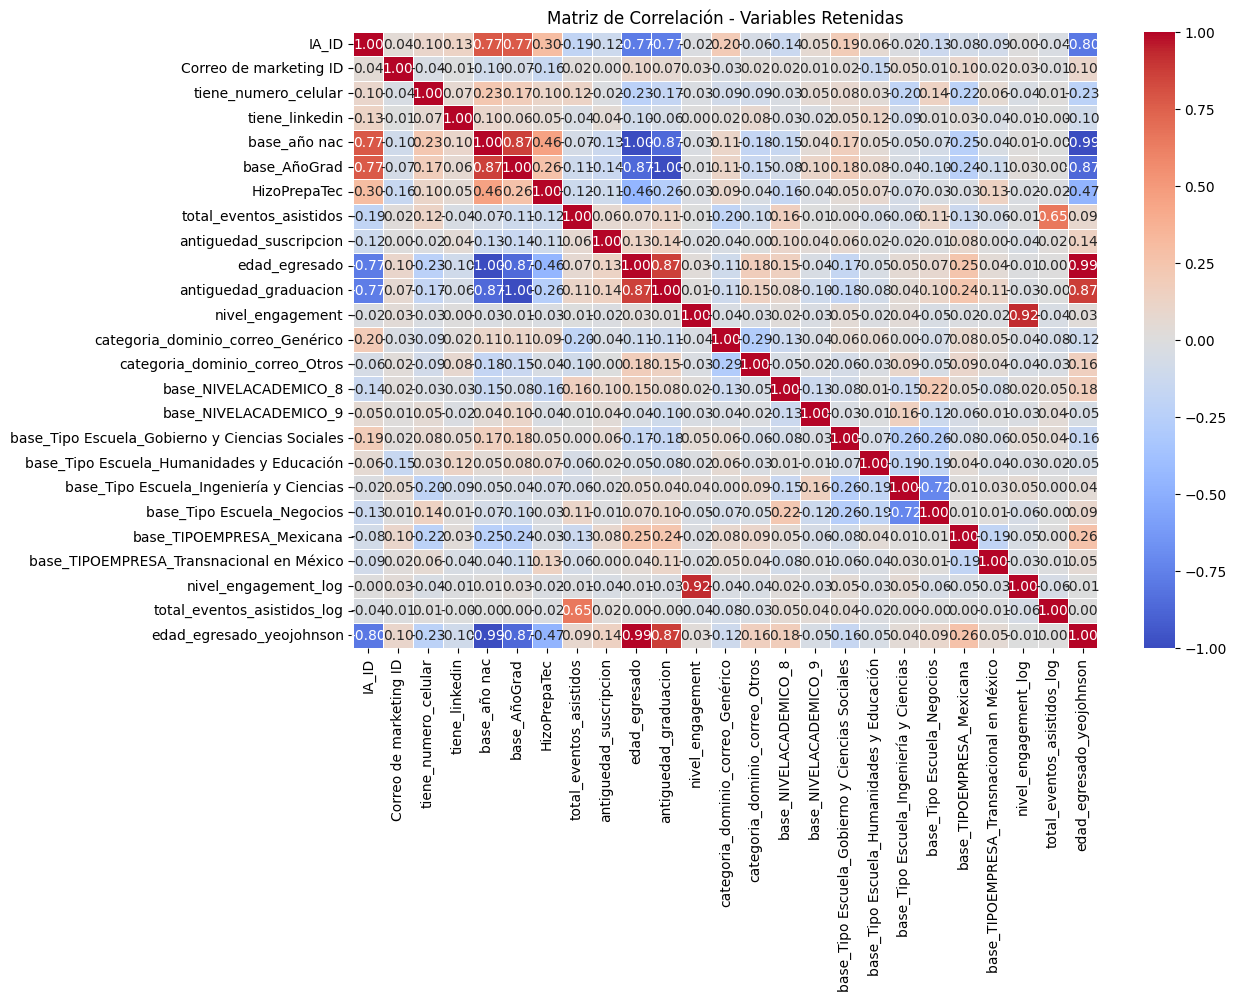

In [1219]:
# Verificar las columnas que sí están en el DataFrame
columns_retained_valid = [col for col in columns_retained if col in df_unido.columns]

# Calcular la matriz de correlación con las columnas válidas
correlation_matrix = df_unido[columns_retained_valid].corr()

# Visualizar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación - Variables Retenidas')
plt.show()


**Análisis del Mapa de Correlación**

Correlación Fuerte (cercana a ±1):

**IA_ID con base_año_nacimiento (-0.77):** Esto indica una fuerte correlación negativa. A medida que aumenta el año de nacimiento (egresados más jóvenes), el IA_ID decrece. Lo que podemos asumir que el ID fue ordenado por matrícula en orden descendente

Correlaciones Moderadas:

**antiguedad_graduacion con edad_egresado (0.87):** Sugiere que a mayor edad del egresado, mayor es la antigüedad de su graduación. Este tipo de correlación es esperable y valida los datos.

**nivel_engagement con opened (0.30):** Hay una correlación positiva moderada, lo que indica que un mayor engagement está vinculado a más correos abiertos, aunque no es determinante.


**Correlaciones Débiles (cercanas a 0):**
Muchas de las variables tienen correlaciones muy bajas entre sí, indicando que no están relacionadas de forma significativa. Esto es positivo porque permite mantener varias variables sin riesgo de redundancia.

**Acciones:**

**edad_egresado con base_año_nacimiento (-1.00):** Esta es una correlación perfecta negativa, lo que confirma la relación directa entre la edad y el año de nacimiento, por ello se eliminará pues la edad_egresado se calculó con base_año_nacimiento

**base_AñoGrad con antiguedad_graduacion (-0.77):** Esto es lógico, ya que cuanto más antiguo sea el año de graduación, mayor será la antigüedad en la graduación, se eliminará el base_añograd ya que genera redundancia

In [1220]:
display(df_unido.columns)

Index(['IA_ID', 'rol', 'opened', 'clicked', 'Correo de marketing ID',
       'Campaña ID', 'info_ESTADO_RESIDENCIA', 'info_PAIS_RESIDENCIA',
       'info_FECHA_MAIL_ACTIVO', 'info_POBLACION_ACTIVO',
       'info_MUNICIPIO_ACTIVO', 'info_ESTADO_ACTIVO', 'info_PAIS_ACTIVO',
       'info_FECHA_ACTIVO', 'info_FECHA_ACTIVO_NUM_CELULAR',
       'info_ESTADOCIVIL', 'tiene_numero_celular', 'tiene_linkedin',
       'base_SEXO', 'base_año nac', 'base_NACIONALIDAD',
       'base_ESTADONACIMIENTO', 'base_exatec personalizado',
       'base_ESTADO_RESIDENCIA', 'base_PAIS_RESIDENCIA', 'base_AñoGrad',
       'base_SIGLASDELPROGRAMA', 'base_IDCAMPUS', 'base_campusoperación',
       'base_NOMBREEMPRESA', 'base_GIROEMPRESA', 'base_AREAORGANIZACIONAL',
       'base_PUESTO', 'base_ESTATUSEMPLEO', 'base_CDEMPRESA',
       'base_EDOEMPRESA', 'base_PAISEMPRESA', 'base_Interesadocompartirtemas',
       'HizoPrepaTec', 'suscrito_FechaRegistro', 'giveaway_fecha',
       'evento_EventName', 'evento_Campus', 'eve

In [1221]:
display(df_unido['base_año nac'].head())

0    1942
1    1942
2    1942
3    1942
4    1942
Name: base_año nac, dtype: int64

In [1222]:
#Eliminación de variables
columnas_a_eliminar = ['base_año nac', 'base_AñoGrad']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)
df_unidoTalks = df_unidoTalks.drop(columns=columnas_a_eliminar)
df_unidoVoluntariado = df_unidoVoluntariado.drop(columns=columnas_a_eliminar)
df_unidoHistoriaExito = df_unidoHistoriaExito.drop(columns=columnas_a_eliminar)

display(df_unido.columns)

Index(['IA_ID', 'rol', 'opened', 'clicked', 'Correo de marketing ID',
       'Campaña ID', 'info_ESTADO_RESIDENCIA', 'info_PAIS_RESIDENCIA',
       'info_FECHA_MAIL_ACTIVO', 'info_POBLACION_ACTIVO',
       'info_MUNICIPIO_ACTIVO', 'info_ESTADO_ACTIVO', 'info_PAIS_ACTIVO',
       'info_FECHA_ACTIVO', 'info_FECHA_ACTIVO_NUM_CELULAR',
       'info_ESTADOCIVIL', 'tiene_numero_celular', 'tiene_linkedin',
       'base_SEXO', 'base_NACIONALIDAD', 'base_ESTADONACIMIENTO',
       'base_exatec personalizado', 'base_ESTADO_RESIDENCIA',
       'base_PAIS_RESIDENCIA', 'base_SIGLASDELPROGRAMA', 'base_IDCAMPUS',
       'base_campusoperación', 'base_NOMBREEMPRESA', 'base_GIROEMPRESA',
       'base_AREAORGANIZACIONAL', 'base_PUESTO', 'base_ESTATUSEMPLEO',
       'base_CDEMPRESA', 'base_EDOEMPRESA', 'base_PAISEMPRESA',
       'base_Interesadocompartirtemas', 'HizoPrepaTec',
       'suscrito_FechaRegistro', 'giveaway_fecha', 'evento_EventName',
       'evento_Campus', 'evento_Category', 'evento_CheckedIn

##Análisis para seleccionar las variables de mayor importancia

**Método 1: Chi-cuadrado**

**Uso:** Ideal para variables categóricas independientes que se utilizan para predecir una variable objetivo categórica.

**Ventajas:**

* Fácil de aplicar.
* Útil para preseleccionar variables categóricas.

**Limitación:**
* Solo funciona para datos categóricos, no aplicable a datos numéricos.

**Nuestro caso:** Este método no sería el más adecuado ya que nuestro enfoque se basa en variables numéricas o el objetivo no es categórico.



**Método 2: ANOVA (Análisis de Varianza)**

**Uso:**: Útil para evaluar si las medias de una variable numérica difieren significativamente entre diferentes categorías de una variable categórica.

**Ventajas:**
Ayuda a determinar qué variables categóricas influyen significativamente en las variables numéricas.

**Limitación:**
Solo permite analizar una variable numérica dependiente a la vez.

**Nuestro caso:** Podría ser útil al determinar variables categóricas (como nivel académico o tipo de empresa) influyen en una variable numérica como engagement o edad del egresado. Sin embargo, tiene limitaciones ya que nuestras variables son de mayor complejista



**Método 3: PCA (Análisis de Componentes Principales)**

**Uso:**
Reducción de dimensionalidad, transforma las variables originales en componentes principales no correlacionadas.
Ayuda a identificar combinaciones lineales de variables que explican la mayor variabilidad del conjunto de datos.

**Ventajas:**
* Muy útil ya que tenemos muchas variables numéricas con posible colinealidad.
* Facilita la interpretación y simplifica los modelos.

**Limitación:**
* Las componentes principales pueden perder interpretabilidad, ya que representan combinaciones de variables.
* No se puede aplicar directamente a variables categóricas sin preprocesamiento

**Nuestro caso:**
Dado que tenemos varias variables numéricas y podríamos enfrentar problemas de multicolinealidad, PCA lo vemos como un enfoque muy útil para reducir la complejidad y mantener la información relevante.



**Método 4: Análisis Factorial (FA)**
**Uso:**
Similar a PCA, pero se enfoca en descubrir los factores latentes entre las variables.

**Ventajas:**
* Útil al sospechar que varias variables miden aspectos similares de un fenómeno.
* Permite generar factores latentes que faciliten la interpretación del modelo.

**Limitación:**
* Es más interpretativo y subjetivo que el PCA.
* Requiere que las variables tengan cierta estructura de correlación.

**Nuestro caso:**
La matriz de correlación no representa que las variables posean aspectos diferentes del comportamiento de los egresados (por ejemplo, engagement, tipo de empresa, y nivel académico),


**Conclusión: Mejor Método para nuestro caso**

**PCA (Análisis de Componentes Principales)**

Es la opción más adecuada para nuestra situación, debido a los siguientes factores:
* **Colinealidad:** La matriz de correlación muestra algunas correlaciones moderadas y fuertes que podrían afectar los modelos predictivos si no se tratan.
* **Variables Numéricas:** Muchas de las variables importantes son numéricas (opened, clicked, engagement, edad, antigüedad).
* **Reducción de dimensionalidad:** PCA nos permitirá simplificar el conjunto de datos manteniendo la mayor parte de la información relevante, lo que facilitará la construcción de modelos más eficientes.

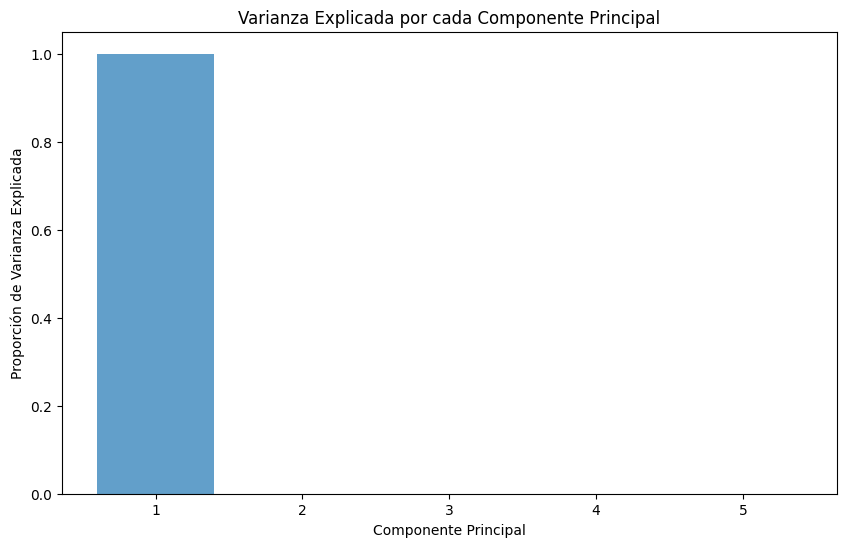

PC1            PC2         PC3          PC4        PC5
0  8.453184e+09 -157222.656113 -503.392143 -1348.112609  41.444384
1  8.453184e+09 -157222.656113 -503.392143 -1348.112609  41.444384
2  9.555184e+09 -157327.895850 -478.042511    17.574080  31.052299
3  9.555184e+09 -157327.895850 -478.042511    17.574080  31.052299
4  9.555184e+09 -157327.895850 -478.042511    17.574080  31.052299

In [1223]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Filtrar solo las columnas que existen en el DataFrame
columns_available = [col for col in columns_retained if col in df_unido.columns]

# Filtrar solo las variables numéricas del DataFrame
X = df_unido[columns_available].select_dtypes(include=['number'])

# Asegurarse de que no haya NaNs o infinitos
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Aplicar PCA y ajustar los datos
pca = PCA(n_components=min(5, X.shape[1]))  # Ajustar a menos componentes si hay pocas columnas
X_pca = pca.fit_transform(X)

# Visualizar la varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.ylabel('Proporción de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.title('Varianza Explicada por cada Componente Principal')
plt.show()

# Crear un DataFrame con las nuevas componentes principales
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Mostrar las primeras filas del DataFrame
display(df_pca.head())


#JUSTIFICAR POR QUÉ NO SE USÓ PCA

Análisis factorial

In [1224]:
!pip install factor_analyzer

In [1225]:
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import pandas as pd
import numpy as np

# 1. Filtrar solo las columnas numéricas
X_numerico = X.select_dtypes(include=[np.number])

# 2. Calcular la matriz de correlación
correlation_matrix = X_numerico.corr().abs()

# 3. Identificar pares de variables altamente correlacionadas
high_corr_var = np.where(correlation_matrix > 0.95)
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y])
                   for x, y in zip(*high_corr_var) if x != y]

# 4. Eliminar una variable de cada par altamente correlacionado
variables_a_eliminar = [var[1] for var in high_corr_pairs]
X_reducido = X_numerico.drop(columns=variables_a_eliminar)

# 5. Manejar NaNs e infinitos en los datos
X_reducido = X_reducido.replace([np.inf, -np.inf], np.nan)  # Reemplazar inf por NaN
X_reducido = X_reducido.dropna()  # Eliminar filas con NaNs

# Asegurarse de que no haya valores faltantes o infinitos
if np.any(np.isnan(X_reducido)) or np.any(np.isinf(X_reducido)):
    print("Error: Todavía existen NaNs o infinitos en los datos.")
else:
    # 6. Escalar las variables numéricas
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_reducido)

    # 7. Aplicar el análisis factorial con 5 factores y rotación varimax
    fa = FactorAnalyzer(n_factors=5, rotation='varimax')
    fa.fit(X_scaled)

    # 8. Crear un DataFrame con las cargas factoriales y mostrarlo
    cargas_factoriales = pd.DataFrame(
        fa.loadings_,
        index=X_reducido.columns,
        columns=[f'Factor_{i+1}' for i in range(fa.loadings_.shape[1])]
    )

    display(cargas_factoriales)

    # 9. Obtener y mostrar la varianza explicada por cada factor
    varianza_explicada = pd.DataFrame({
        'Varianza Explicada': fa.get_factor_variance()[1],
        'Varianza Acumulada': fa.get_factor_variance()[2]
    }, index=[f'Factor_{i+1}' for i in range(fa.loadings_.shape[1])])

    display("Varianza explicada por cada factor:")
    display(varianza_explicada)


Factor_1  Factor_2  Factor_3  \
IA_ID                                          -0.015337 -0.173188  0.724033   
Correo de marketing ID                          0.037731 -0.018021 -0.041615   
tiene_numero_celular                           -0.036322  0.136904  0.225976   
tiene_linkedin                                 -0.010041  0.032294  0.050822   
HizoPrepaTec                                   -0.041622 -0.029065  0.293611   
total_eventos_asistidos                         0.004675  0.074398 -0.025108   
antiguedad_suscripcion                         -0.019845  0.011877 -0.196008   
antiguedad_graduacion                           0.001991  0.146440 -0.878052   
nivel_engagement                                0.926787  0.018226  0.001689   
categoria_dominio_correo_Genérico              -0.041647 -0.069045  0.107764   
categoria_dominio_correo_Otros                 -0.028336 -0.052716 -0.147765   
base_NIVELACADEMICO_8                           0.029646  0.216887 -0.108382   
base_NIVELACADEMICO_9                          -0.033696 -0.166865  0.089963   
base_Tipo Escuela_Gobierno y Ciencias Sociales  0.061398 -0.052308  0.072166   
base_Tipo Escuela_Humanidades y Educación      -0.027948 -0.013170 -0.012846   
base_Tipo Escuela_Ingeniería y Ciencias         0.050895 -0.879920 -0.063886   
base_Tipo Escuela_Negocios                     -0.077498  0.945668  0.138517   
base_TIPOEMPRESA_Mexicana                      -0.027325  0.011730 -0.254114   
base_TIPOEMPRESA_Transnacional en México       -0.042022 -0.004550 -0.012558   
nivel_engagement_log                            0.992132  0.006002  0.040585   
total_eventos_asistidos_log                    -0.052216 -0.036789  0.028644   

                                                Factor_4  Factor_5  
IA_ID                                          -0.162480  0.270216  
Correo de marketing ID                          0.005162 -0.092673  
tiene_numero_celular                            0.122172  0.080467  
tiene_linkedin                                 -0.038802  0.158041  
HizoPrepaTec                                   -0.118168  0.140440  
total_eventos_asistidos                         1.004650 -0.039700  
antiguedad_suscripcion                          0.071836  0.062937  
antiguedad_graduacion                           0.051630 -0.245470  
nivel_engagement                               -0.011600 -0.003016  
categoria_dominio_correo_Genérico              -0.187232  0.150667  
categoria_dominio_correo_Otros                 -0.073134 -0.103209  
base_NIVELACADEMICO_8                           0.139424 -0.065092  
base_NIVELACADEMICO_9                           0.035144 -0.062823  
base_Tipo Escuela_Gobierno y Ciencias Sociales  0.047921  0.458728  
base_Tipo Escuela_Humanidades y Educación      -0.054834  0.281625  
base_Tipo Escuela_Ingeniería y Ciencias        -0.022829 -0.502836  
base_Tipo Escuela_Negocios                      0.029131 -0.337815  
base_TIPOEMPRESA_Mexicana                      -0.126651  0.006521  
base_TIPOEMPRESA_Transnacional en México       -0.046187 -0.092614  
nivel_engagement_log                           -0.014990 -0.017685  
total_eventos_asistidos_log                     0.613692  0.037155

'Varianza explicada por cada factor:'

Varianza Explicada  Varianza Acumulada
Factor_1            0.089116            0.089116
Factor_2            0.087326            0.176441
Factor_3            0.077379            0.253821
Factor_4            0.073184            0.327005
Factor_5            0.043197            0.370202

Durante la preparación de los datos, se aplicaron técnicas de ingeniería de características para asegurar la calidad del modelo. La selección de variables mediante umbral de varianza y análisis factorial simplificó el conjunto de datos. La normalización y transformación de datos aseguraron una mejor convergencia de los algoritmos. Estas decisiones alinean nuestra preparación de datos con la metodología CRISP-ML, asegurando que los datos estén listos para la fase de modelado y que respondan a las necesidades estratégicas del negocio.

In [1226]:
# Forzar la recolección de basura
gc.collect()

92810